# DESCRIPTIVE STATISTICS:

### This code will begin similar to the one for the main model, but will not feature a train test split or a model building; wrangling will continue until one step before model building and then will focus on the dataframe's descriptive statistics
### These steps as they are present here would induce data leakage if they were to feed a model

Data ingestion<br>

Data wrangling and feature engineering
- Outlier removal<br>
- Tokenization and cleanup of job titles<br>
- Creation of dummies for all categorical variables<br>
- Feature selection and database cleanup<br>
- Independent variable normalization<br>

### Data description
- Categorical entries' volumes<br>
- Dummies' impacts charts and tables<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from scipy.stats import boxcox, normaltest, kstest

In [2]:
sns.set() # makes all charts look better by default

## Data Ingestion

In [3]:
aijobs = pd.read_csv(r'https://ai-jobs.net/salaries/download/salaries.csv')
# Last accessed at 2024-03-23

In [4]:
aijobs # first look at the data

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14796       2020               SE              FT            Data Scientist   
14797       2021               MI              FT  Principal Data Scientist   
14798       2020               EN              FT            Data Scientist   
14799       2020               EN              CT     Business Data Analyst   
14800       2021               SE              FT      Data Science Manager   

        salary salary_currency  salary_in_usd employee_residence  \
0       120000             CHF         136363                 CH   
1       212000             USD         212000                 US   
2        93300             USD          93300                 US   
3       321830             USD         321830                 US   
4       124690             USD         124690                 US   
...        ...             ...            ...                ...   
14796   412000             USD         412000                 US   
14797   151000             USD         151000                 US   
14798   105000             USD         105000                 US   
14799   100000             USD         100000                 US   
14800  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
0                50               CH            L  
1                 0               US            M  
2                 0               US            M  
3                 0               US            M  
4                 0               US            M  
...             ...              ...          ...  
14796           100               US            L  
14797           100               US            L  
14798           100               US            S  
14799           100               US            L  
14800            50               IN            L  

[14801 rows x 11 columns]

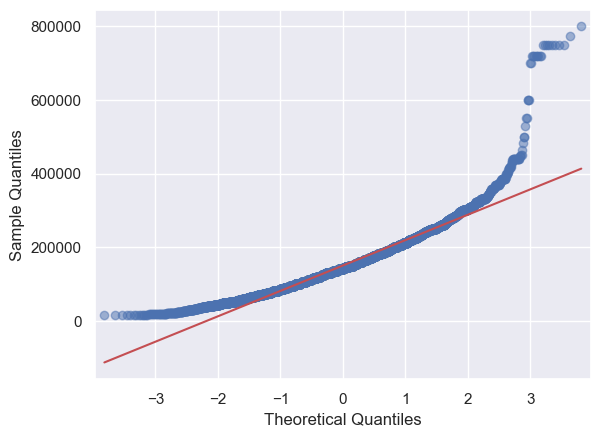

In [5]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

# Common data wrangling
These steps would be equally done for train and test bases with no population or sampled information, only individual ones, so no data leakage will occur if done now.

### Outlier removal

In [6]:
# The first outliers are extremely out of touch with the remainder of the database.
# They will skew the results too much and must be removed.
# According to Hair, from 2.5 to 4 standards deviations might be used to remove outliers.
# Visually, 4 deviations cover the worst cases.

mean = aijobs['salary_in_usd'].mean()
std = mean = aijobs['salary_in_usd'].std()
outmax = mean + 4 * std
print(outmax)
outliers = aijobs[aijobs['salary_in_usd'] > outmax].index
print(outliers)

aijobs.drop(outliers, inplace=True)
aijobs.reset_index(drop=True, inplace=True)
aijobs.sort_values('salary_in_usd', ascending=False).head()

345187.57544700877
Index([  153,   157,   320,   410,   428,   455,   457,   569,   593,   617,
       ...
       13095, 13438, 13453, 13632, 14526, 14531, 14583, 14728, 14793, 14796],
      dtype='int64', length=143)


work_year experience_level employment_type                  job_title  \
586         2024               SE              FT         Research Scientist   
9909        2023               SE              FT         Research Scientist   
11005       2023               SE              FT   Computer Vision Engineer   
2553        2024               SE              FT        Data Analytics Lead   
11103       2023               SE              FT  Machine Learning Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
586    345000             USD         345000                 US             0   
9909   345000             USD         345000                 US             0   
11005  342810             USD         342810                 US             0   
2553   342400             USD         342400                 US             0   
11103  342300             USD         342300                 US             0   

      company_location company_size  
586                 US            M  
9909                US            M  
11005               US            M  
2553                US            M  
11103               US            L

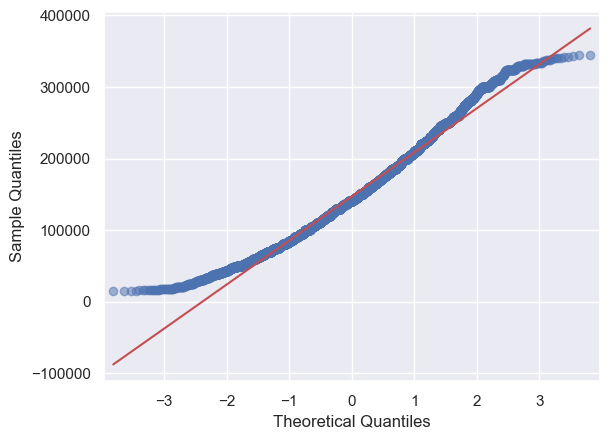

In [7]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

## Feature Engineering

In [8]:
# There is no value in local currency salaries as they're not scaled.
# Salary in USD conveys the same useful information in a scaled manner.
aijobs.drop('salary', axis=1, inplace=True)

In [9]:
# An interesting variable to research
aijobs['work_abroad'] = aijobs['employee_residence'] != aijobs['company_location']
aijobs['work_abroad'] = aijobs['work_abroad'].astype(int)
aijobs.tail(10)

work_year experience_level employment_type                  job_title  \
14648       2020               MI              FT              Data Engineer   
14649       2020               SE              FT  Machine Learning Engineer   
14650       2021               SE              FT   Director of Data Science   
14651       2021               MI              FT             Data Scientist   
14652       2021               MI              FT              Data Engineer   
14653       2021               SE              FT            Data Specialist   
14654       2021               MI              FT   Principal Data Scientist   
14655       2020               EN              FT             Data Scientist   
14656       2020               EN              CT      Business Data Analyst   
14657       2021               SE              FT       Data Science Manager   

      salary_currency  salary_in_usd employee_residence  remote_ratio  \
14648             USD         130800                 ES           100   
14649             EUR          45618                 HR           100   
14650             USD         168000                 JP             0   
14651             SGD         119059                 SG           100   
14652             EUR          28369                 MT            50   
14653             USD         165000                 US           100   
14654             USD         151000                 US           100   
14655             USD         105000                 US           100   
14656             USD         100000                 US           100   
14657             INR          94665                 IN            50   

      company_location company_size  work_abroad  
14648               US            M            1  
14649               HR            S            0  
14650               JP            S            0  
14651               IL            M            1  
14652               MT            L            0  
14653               US            L            0  
14654               US            L            0  
14655               US            S            0  
14656               US            L            0  
14657               IN            L            0

In [10]:
# remote_ratio is categorical; the correct way to interpret those numbers is:
#   0 == On Site (less than 20% remote)
#  50 == Partially remote/hybird
# 100 == Fully remote (more than 80% remote)
# therefore using it as numerical would be creating a spurious relationship.
# It has to be dummified and will be switched for easier interpretation.

aijobs.loc[aijobs['remote_ratio'] == 0, 'remote_ratio'] = 'On_Site'
aijobs.loc[aijobs['remote_ratio'] == 50, 'remote_ratio'] = 'Hybrid'
aijobs.loc[aijobs['remote_ratio'] == 100, 'remote_ratio'] = 'Remote'

aijobs['remote_ratio']

0         Hybrid
1        On_Site
2        On_Site
3        On_Site
4        On_Site
          ...   
14653     Remote
14654     Remote
14655     Remote
14656     Remote
14657     Hybrid
Name: remote_ratio, Length: 14658, dtype: object

In [11]:
# Categorical columns will receive appropriate treatment
categorical_columns = ['experience_level', 'employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 
                       'company_location', 'company_size']

In [12]:
# Quick look at job titles. This will receive a quick NLP method for processing.
print(len(aijobs.job_title.unique()), "different job titles \n")
print(aijobs.job_title.unique())

150 different job titles 

['Data Engineer' 'Data Architect' 'Data Product Owner' 'MLOps Engineer'
 'Data Specialist' 'Data Manager' 'Analytics Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Business Intelligence Engineer'
 'Data Scientist' 'Business Intelligence Analyst' 'Data Science'
 'Data Analytics Manager' 'Encounter Data Management Professional'
 'Machine Learning Engineer' 'Research Scientist' 'Research Engineer'
 'AI Engineer' 'Data Modeler' 'Research Analyst' 'ML Engineer'
 'Data Science Consultant' 'Applied Scientist' 'BI Analyst'
 'Data Integration Engineer' 'Data Integration Specialist'
 'Machine Learning Operations Engineer'
 'Machine Learning Infrastructure Engineer' 'Data Developer'
 'Business Intelligence' 'CRM Data Analyst' 'ETL Developer'
 'Business Intelligence Manager' 'Data Science Engineer' 'AI Architect'
 'Robotics Engineer' 'BI Developer' 'Head of Data' 'Data Science Manager'
 'Cloud Database Engineer' 'Data Operations Analyst'
 'Data Science Analyst' 

In [13]:
# Work on the terms contained in job titles.
terms = []
for title in aijobs.job_title.unique():
    for word in title.split():
        terms.append(word)
terms = sorted(set(terms))
print(len(terms), "different terms in these titles \n")
print(terms)

80 different terms in these titles 

['&', 'AI', 'AWS', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Autonomous', 'Azure', 'BI', 'Big', 'Biologist', 'Business', 'CRM', 'Cloud', 'Compliance', 'Computational', 'Computer', 'Consultant', 'Data', 'Database', 'Decision', 'Deep', 'DevOps', 'Developer', 'Director', 'ETL', 'Encounter', 'Engineer', 'Finance', 'Financial', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Intelligence', 'Lead', 'Learning', 'ML', 'MLOps', 'Machine', 'Management', 'Manager', 'Managing', 'Marketing', 'Modeler', 'Modeller', 'NLP', 'Operations', 'Ops', 'Owner', 'Pipeline', 'Power', 'Practitioner', 'Principal', 'Product', 'Professional', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Research', 'Researcher', 'Robotics', 'Sales', 'Science', 'Scientist', 'Software', 'Specialist', 'Staff', 'Strategist', 'Strategy', 'Technician', 'Vehicle', 'Vision', 'Visualization', 'of']


In [14]:
stop_words = ['&', 'of', 'Data', 'Learning', 'Computational', 'Computer', 'Autonomous', 'Technician', 'Professional']
# Justification: '&', 'of' and 'Data' are too generic for this project.
# 'Learning' has two contexts: Machine Learning and Deep Learning, yet both "Machine" and "Deep" are unique to them,
# so there's nothing to be gained from adding it.
# "Autonomous Vehicle Technician" is a job title whose words are all unique, so a single one is enough.
# "Computational Biologist" shares the same issue.
# "Encounter Data Management Professional" is the only to use "Encounter" and "Professional".
# "Computer Vision" is present in more than one job, but all of them use this same sequence, so it's the same situation.

In [15]:
synonym_terms = ['ML','Machine','MLOps', 'Operations','Business','BI','Intelligence','AWS','Cloud','Azure','Modeller','Modeler',
                 'Engineering','Engineer','Financial','Finance','Researcher','Research','Science','Scientist',
                 'Strategy','Strategist','Management','Manager', 'Managing']

In [16]:
# this uses the same pressupositions as above, but some words will mean the same thing.
synonyms = {'Machine': 'Machine|ML|MLOps',      # ML is short for Machine Learning
            'Operations':'MLOps|Operations',    # Ops is short for Operations
            'Intelligence':'Intelligence|BI',   # BI is short for Business Intelligence (Intelligence is exclusive to BI)
            'Business':'Business|BI',           # For consistency (Business is not exclusive to BI)
            'Cloud':'Cloud|AWS|Azure',          # There is a single instance for AWS and for Azure; both specific cloud tools
            'Modeler':'Modeler|Modeller',       # Typo
            'Engineer':'Engineer|Engineering',
            'Finance':'Finance|Financial',
            'Research':'Research|Researcher',
            'Scientist':'Scientist|Science',
            'Strategist':'Strategist|Strategy',
            'Manager':'Management|Manager|Managing'}

In [17]:
clean_terms = terms.copy()                                                   # copy method to keep the original list
[clean_terms.remove(term) for term in stop_words if term in clean_terms]     # remove stop words
[clean_terms.remove(term) for term in synonym_terms if term in clean_terms]  # synonyms will be processed differently
print(len(clean_terms), "terms after cleaning \n\n", clean_terms)

47 terms after cleaning 

 ['AI', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Big', 'Biologist', 'CRM', 'Compliance', 'Consultant', 'Database', 'Decision', 'Deep', 'DevOps', 'Developer', 'Director', 'ETL', 'Encounter', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Lead', 'Marketing', 'NLP', 'Ops', 'Owner', 'Pipeline', 'Power', 'Practitioner', 'Principal', 'Product', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Robotics', 'Sales', 'Software', 'Specialist', 'Staff', 'Vehicle', 'Vision', 'Visualization']


In [18]:
# dummization for all chosen job keywords
for job_string in clean_terms:
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(job_string, case=False).astype(int)
for job_string in synonyms.keys():
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(f'{synonyms[job_string]}', case=False).astype(int)
aijobs

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14653       2021               SE              FT           Data Specialist   
14654       2021               MI              FT  Principal Data Scientist   
14655       2020               EN              FT            Data Scientist   
14656       2020               EN              CT     Business Data Analyst   
14657       2021               SE              FT      Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 CHF         136363                 CH       Hybrid   
1                 USD         212000                 US      On_Site   
2                 USD          93300                 US      On_Site   
3                 USD         321830                 US      On_Site   
4                 USD         124690                 US      On_Site   
...               ...            ...                ...          ...   
14653             USD         165000                 US       Remote   
14654             USD         151000                 US       Remote   
14655             USD         105000                 US       Remote   
14656             USD         100000                 US       Remote   
14657             INR          94665                 IN       Hybrid   

      company_location company_size  ...  job_name_Intelligence  \
0                   CH            L  ...                      0   
1                   US            M  ...                      0   
2                   US            M  ...                      0   
3                   US            M  ...                      0   
4                   US            M  ...                      0   
...                ...          ...  ...                    ...   
14653               US            L  ...                      0   
14654               US            L  ...                      0   
14655               US            S  ...                      0   
14656               US            L  ...                      0   
14657               IN            L  ...                      0   

       job_name_Business  job_name_Cloud  job_name_Modeler  job_name_Engineer  \
0                      0               0                 0                  1   
1                      0               0                 0                  0   
2                      0               0                 0                  0   
3                      0               0                 0                  0   
4                      0               0                 0                  0   
...                  ...             ...               ...                ...   
14653                  0               0                 0                  0   
14654                  0               0                 0                  0   
14655                  0               0                 0                  0   
14656                  1               0                 0                  0   
14657                  0               0                 0                  0   

       job_name_Finance  job_name_Research  job_name_Scientist  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
...                

In [19]:
df_dummies = pd.get_dummies(aijobs[categorical_columns], dtype=int)
aijobs = pd.concat([aijobs, df_dummies], axis=1)

aijobs

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14653       2021               SE              FT           Data Specialist   
14654       2021               MI              FT  Principal Data Scientist   
14655       2020               EN              FT            Data Scientist   
14656       2020               EN              CT     Business Data Analyst   
14657       2021               SE              FT      Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 CHF         136363                 CH       Hybrid   
1                 USD         212000                 US      On_Site   
2                 USD          93300                 US      On_Site   
3                 USD         321830                 US      On_Site   
4                 USD         124690                 US      On_Site   
...               ...            ...                ...          ...   
14653             USD         165000                 US       Remote   
14654             USD         151000                 US       Remote   
14655             USD         105000                 US       Remote   
14656             USD         100000                 US       Remote   
14657             INR          94665                 IN       Hybrid   

      company_location company_size  ...  company_location_SI  \
0                   CH            L  ...                    0   
1                   US            M  ...                    0   
2                   US            M  ...                    0   
3                   US            M  ...                    0   
4                   US            M  ...                    0   
...                ...          ...  ...                  ...   
14653               US            L  ...                    0   
14654               US            L  ...                    0   
14655               US            S  ...                    0   
14656               US            L  ...                    0   
14657               IN            L  ...                    0   

       company_location_TH  company_location_TR  company_location_UA  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14653                    0                    0                    0   
14654                    0                    0                    0   
14655                    0                    0                    0   
14656                    0                    0                    0   
14657                    0                    0                    0   

       company_location_US  company_location_VN  company_location_ZA  \
0                        0                    0                    0   
1                        1                    0                    0   
2                        1                    0                    0   
3                        1                    0                    0   
4                        1                    0                    0   
...                    ...                  ...                  ...   
14653                    1                 

In [20]:
aijobs[categorical_columns].describe().loc['unique']

experience_level       4
employment_type        4
salary_currency       22
employee_residence    87
remote_ratio           3
company_location      77
company_size           3
Name: unique, dtype: object

In [21]:
# To establish the features, categorical columns that are not dummies will need to be removed. Target variable too.
# NOTE: COMPREHENSIVE DUMMIES WILL NOT HAVE AN INSTANCE REMOVED FOR STATISTICAL ANALYSIS
# AS THIS IS NOT FOR MODEL BUILDING, THERE IS NO INTERCEPT IMPLIED STANDARD FOR DUMMY VARIABLES

X_vars = aijobs.columns.tolist()
[X_vars.remove(col) for col in categorical_columns if col in X_vars]
X_vars.remove('job_title')
X_vars.remove('salary_in_usd')
X_vars

['work_year',
 'work_abroad',
 'job_name_AI',
 'job_name_Admin',
 'job_name_Analyst',
 'job_name_Analytics',
 'job_name_Applied',
 'job_name_Architect',
 'job_name_Associate',
 'job_name_Big',
 'job_name_Biologist',
 'job_name_CRM',
 'job_name_Compliance',
 'job_name_Consultant',
 'job_name_Database',
 'job_name_Decision',
 'job_name_Deep',
 'job_name_DevOps',
 'job_name_Developer',
 'job_name_Director',
 'job_name_ETL',
 'job_name_Encounter',
 'job_name_Head',
 'job_name_Infrastructure',
 'job_name_Insight',
 'job_name_Integration',
 'job_name_Lead',
 'job_name_Marketing',
 'job_name_NLP',
 'job_name_Ops',
 'job_name_Owner',
 'job_name_Pipeline',
 'job_name_Power',
 'job_name_Practitioner',
 'job_name_Principal',
 'job_name_Product',
 'job_name_Programmer',
 'job_name_Prompt',
 'job_name_Quality',
 'job_name_Quantitative',
 'job_name_Reporting',
 'job_name_Robotics',
 'job_name_Sales',
 'job_name_Software',
 'job_name_Specialist',
 'job_name_Staff',
 'job_name_Vehicle',
 'job_name_Vis

In [22]:
# Hair says 5 entries is a minimum threshold; any dummy with less than 5 examples is too prone to overfitting.
# They would be excluded from any model anyway, so they will not be part of the statistical analysis.
# This was adapted from a function created for the built models.

def del_vars(X_train, printing=False):
    """
    This function deletes all columns in training base that have too few instances and will result in overfitting
    It also deletes every row that had an instance in such columns in order to prevent assumptions implied in the intecept
    """
    
    if printing == True:
        print("Before:", X_train.shape)
    deletions = 1 #just to enter the loop
    train_dropped = []
    while deletions > 0:
        deletions = X_train.shape[0] # store the dataframe size for later comparison
        X_sum = X_train.sum()
        exclusion_list = X_sum[X_sum < 5].index # create the exclusion column list

        # deleting all rows with any positive value in those variables
        X_delete = X_train[exclusion_list].sum(axis=1)
        rows_to_delete = X_delete[X_delete != 0]
        X_train.drop(rows_to_delete.index, inplace=True)
        
        [train_dropped.append(item) for item in rows_to_delete.index] # list all deleted rows for later consistency wity y array
        deletions = deletions - X_train.shape[0] # difference from previous dataframe size
        if printing == True:
            print('Rows deleted:', deletions) # deleted rows in this loop
            print('Columns dropped:', len(exclusion_list)) # cumulative columns to be deleted
        # loop until there are no more deleted rows
        
    X_train.drop(exclusion_list, axis=1, inplace=True) # dropping columns from train base now
    
    if printing == True:
        print("After:", X_train.shape)

In [23]:
new_X = aijobs[X_vars + ['salary_in_usd']].copy()

In [24]:
del_vars(new_X, printing=True)

Before: (14658, 262)
Rows deleted: 155
Columns dropped: 113
Rows deleted: 31
Columns dropped: 129
Rows deleted: 8
Columns dropped: 132
Rows deleted: 0
Columns dropped: 132
After: (14464, 130)


In [25]:
new_X

work_year  work_abroad  job_name_AI  job_name_Analyst  \
0           2024            0            0                 0   
1           2024            0            0                 0   
2           2024            0            0                 0   
3           2024            0            0                 0   
4           2024            0            0                 0   
...          ...          ...          ...               ...   
14653       2021            0            0                 0   
14654       2021            0            0                 0   
14655       2020            0            0                 0   
14656       2020            0            0                 1   
14657       2021            0            0                 0   

       job_name_Analytics  job_name_Applied  job_name_Architect  \
0                       0                 0                   0   
1                       0                 0                   1   
2                       0                 0                   1   
3                       0                 0                   0   
4                       0                 0                   0   
...                   ...               ...                 ...   
14653                   0                 0                   0   
14654                   0                 0                   0   
14655                   0                 0                   0   
14656                   0                 0                   0   
14657                   0                 0                   0   

       job_name_Associate  job_name_Big  job_name_Consultant  ...  \
0                       0             0                    0  ...   
1                       0             0                    0  ...   
2                       0             0                    0  ...   
3                       0             0                    0  ...   
4                       0             0                    0  ...   
...                   ...           ...                  ...  ...   
14653                   0             0                    0  ...   
14654                   0             0                    0  ...   
14655                   0             0                    0  ...   
14656                   0             0                    0  ...   
14657                   0             0                    0  ...   

       company_location_PL  company_location_PT  company_location_SI  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14653                    0                    0                    0   
14654                    0                    0                    0   
14655                    0                    0                    0   
14656                    0                    0                    0   
14657                    0                    0                    0   

       company_location_UA  company_location_US  company_location_ZA  \
0                        0                    0                    0   
1                        0                    1                    0   
2                        0                    1                    0   
3                        0                    1                    0   
4                        0                    1                    0   
...                    ...                  ...                  ...   
14653                    0                    1                    0   
14654                    0                    1                    0   
14655                    0                    1                    0   
14656              

## Box-Cox transformation

Best Lambda Value: 0.5351


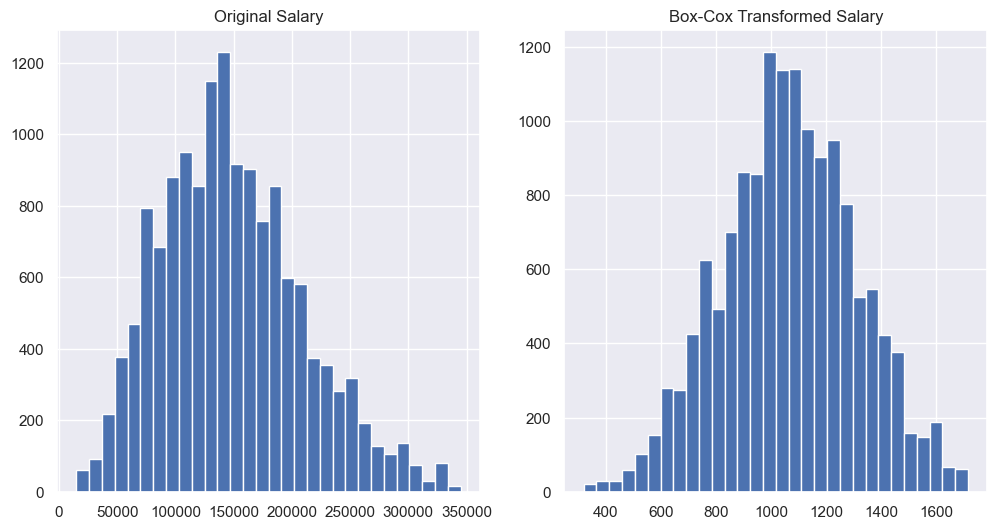

Normal test: NormaltestResult(statistic=45.456187102239795, pvalue=1.3468349775448386e-10)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=319.02005571002593, statistic_sign=-1)


In [26]:
# fit the lambda and transform the train dependent variable
new_X['transformed_salary'], lmbda = boxcox(new_X['salary_in_usd'])
print(f'Best Lambda Value: {lmbda:.4f}')

# plot

plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.hist(new_X['salary_in_usd'], bins=30)
plt.title('Original Salary')

# Transformed
plt.subplot(1, 2, 2)
plt.hist(new_X['transformed_salary'], bins=30)
plt.title('Box-Cox Transformed Salary')

plt.show()

print('Normal test:', normaltest(new_X['transformed_salary']))
print('Kolmogorov-Smirnov test:', kstest(new_X['transformed_salary'], "norm"))

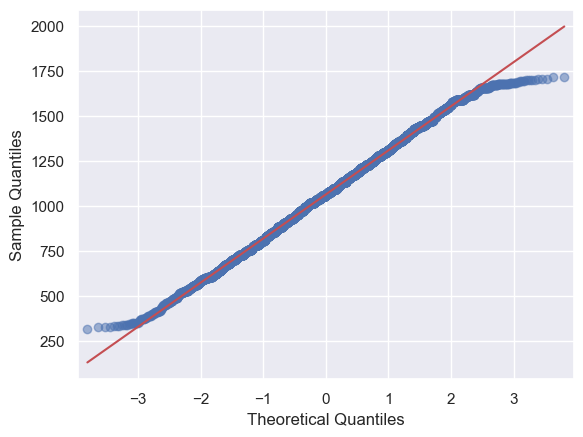

In [27]:
qqplot(new_X['transformed_salary'], line='s', alpha=0.5)
plt.show()

# DATA DESCRIPTION

In [28]:
pd.set_option('display.max_rows', None)

work_year
2023    8458
2024    4266
2022    1645
2021     216
2020      73
Name: count, dtype: int64


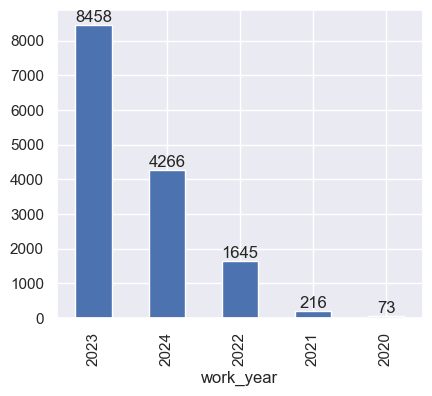

experience_level
SE    9579
MI    3506
EN    1144
EX     429
Name: count, dtype: int64


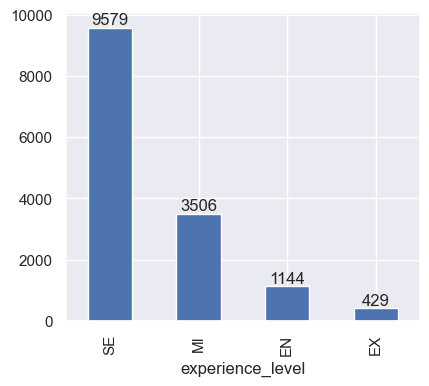

employment_type
FT    14593
PT       27
CT       25
FL       13
Name: count, dtype: int64


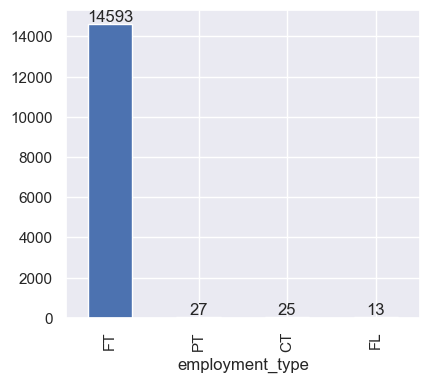

salary_currency
USD    13512
GBP      559
EUR      423
INR       53
CAD       51
AUD       12
CHF        8
PLN        7
SGD        6
JPY        4
BRL        4
DKK        3
HUF        3
TRY        3
NOK        2
THB        2
ZAR        1
HKD        1
PHP        1
NZD        1
MXN        1
CLP        1
Name: count, dtype: int64


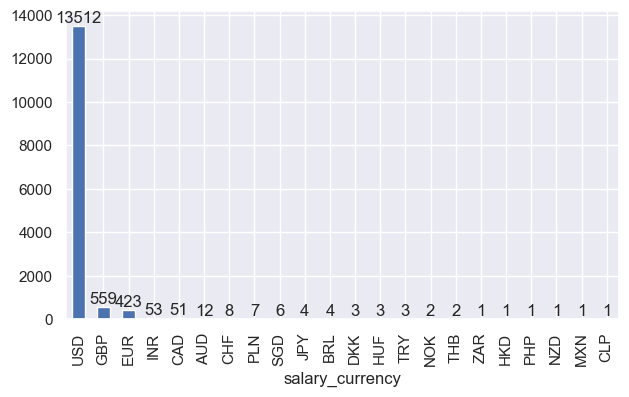

employee_residence
US    12762
GB      639
CA      385
ES      131
DE       90
IN       74
FR       65
AU       50
PT       30
NL       28
BR       23
IT       21
GR       17
LT       16
CO       16
PL       15
ZA       15
LV       14
EG       14
MX       13
IE       12
NG       12
UA       11
EE       11
AR       11
AT       10
PH        9
JP        8
CH        8
TR        8
BE        6
VN        6
RU        6
PK        6
NZ        6
SI        6
AE        5
HR        5
RO        5
PR        5
SG        5
GH        4
TH        4
HU        4
UZ        3
FI        3
SA        3
DK        3
MT        3
BA        2
CL        2
HK        2
CF        2
SE        2
BO        2
NO        2
MD        2
AM        2
KE        2
CZ        2
KR        2
LB        2
TN        2
JE        1
BG        1
RS        1
IQ        1
DZ        1
HN        1
MY        1
ID        1
DO        1
OM        1
PE        1
CR        1
UG        1
EC        1
CN        1
AS        1
IR        1
CY        1
KW       

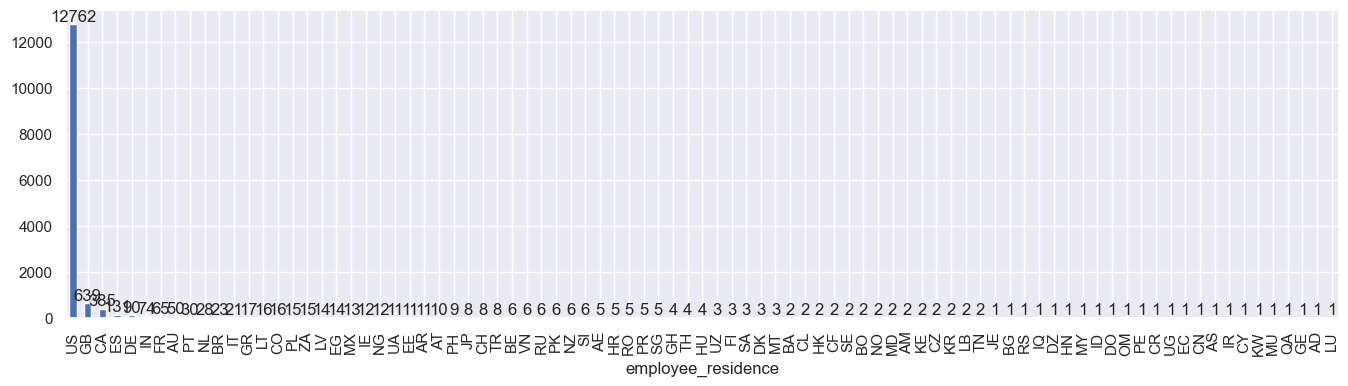

remote_ratio
On_Site    9707
Remote     4706
Hybrid      245
Name: count, dtype: int64


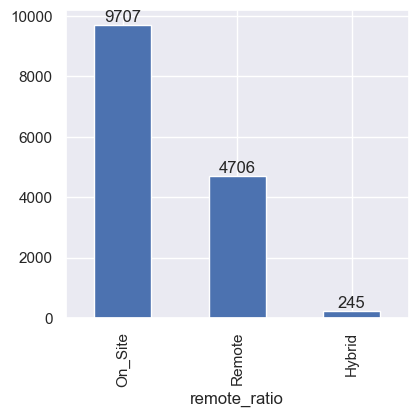

company_location
US    12811
GB      647
CA      387
ES      127
DE       97
FR       61
IN       59
AU       53
NL       28
PT       28
BR       21
CO       16
LT       16
ZA       15
PL       14
LV       14
GR       14
IT       14
MX       14
EG       13
EE       12
IE       12
UA       10
AT       10
CH        9
NG        9
JP        8
AR        7
RU        7
PH        6
TR        6
SI        6
NZ        6
DK        5
AE        5
SG        5
BE        4
VN        4
PR        4
HU        4
FI        4
RO        4
CZ        3
TH        3
SE        3
HR        3
GH        3
MT        3
AS        3
SA        3
LU        3
NO        2
ID        2
PK        2
LB        2
CF        2
KR        2
IL        2
BA        2
KE        2
GI        1
OM        1
CL        1
CN        1
IQ        1
DZ        1
HN        1
MY        1
MU        1
HK        1
BS        1
IR        1
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, dtype: int64


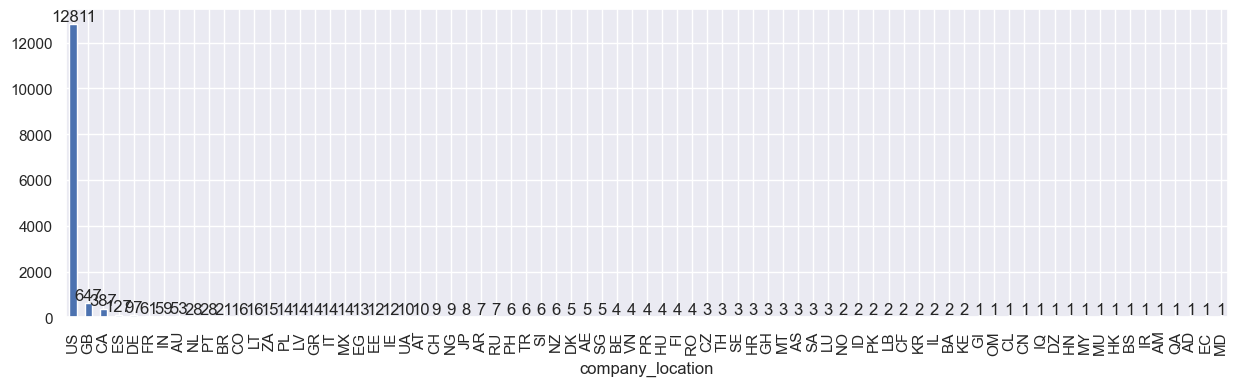

company_size
M    13505
L      974
S      179
Name: count, dtype: int64


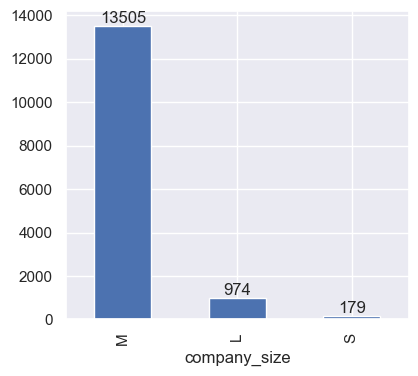

In [29]:
# Quick chart view of the raw base counts for all categorical columns. They're not present in the "new_X" dataframe.
for col in ['work_year'] + categorical_columns:
    group = aijobs[col].value_counts()
    print(group)
    ax = group.plot(kind='bar', figsize=(len(group)/7+4, 4))
    ax.bar_label(ax.containers[0])
    plt.show()

mean           std  count
work_year                                    
2023       151899.424568  61224.401227   8458
2024       146008.619550  62086.911604   4266
2022       133358.030395  55530.060875   1645
2021        96963.018519  59846.032207    216
2020        93244.041096  62758.863741     73

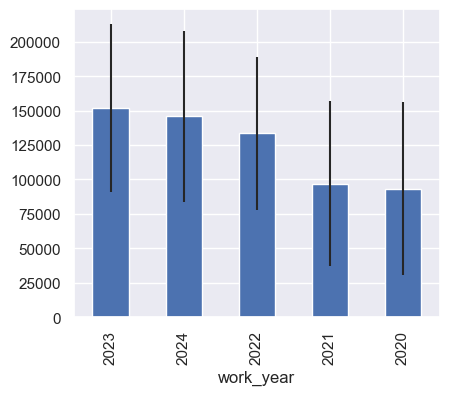

mean           std  count
experience_level                                    
SE                161196.081846  58172.812558   9579
MI                121391.059897  53899.463222   3506
EN                 90856.157343  47619.381895   1144
EX                189112.174825  63862.354765    429

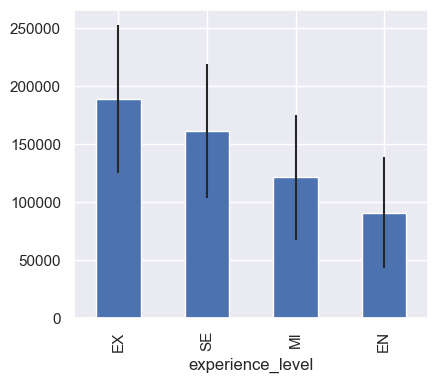

mean           std  count
employment_type                                    
FT               147312.697937  61385.705842  14593
PT                69608.037037  49895.031732     27
CT                99847.800000  73737.839580     25
FL                50236.769231  25715.401964     13

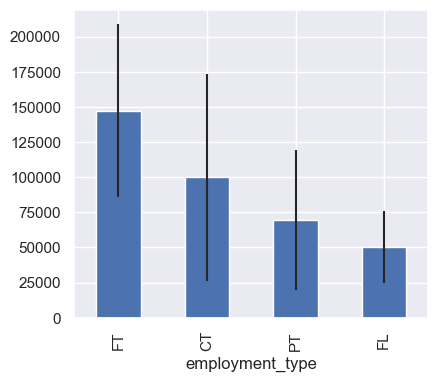

mean           std  count
salary_currency                                    
USD              153407.760731  58871.859315  13512
GBP               77653.026834  34476.323212    559
EUR               64242.827423  32825.973036    423
INR               34166.132075  19328.497632     53
CAD              110108.313725  52623.225644     51
AUD               78660.000000  26425.228393     12
CHF              137187.500000  79146.017766      8
PLN               36099.428571  10611.082962      7
SGD               81724.333333  20167.539718      6
BRL               26168.750000   8958.935330      4
JPY               56143.250000  17530.802765      4
DKK               31192.666667  13596.868475      3
TRY               22189.333333   5124.798370      3
HUF               29892.666667  10576.261170      3
NOK               88462.000000  16905.508925      2
THB               26957.000000   3314.916590      2
CLP               40038.000000           NaN      1
MXN               33511.000000           NaN      1
ZAR               34482.000000           NaN      1
HKD               65058.000000           NaN      1
NZD              125000.000000           NaN      1
PHP               15680.000000           NaN      1

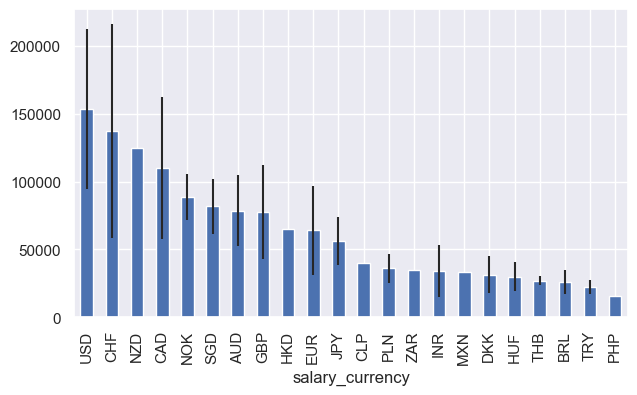

mean           std  count
employee_residence                                    
US                  154719.939351  58105.004215  12762
GB                   92828.679186  49904.359588    639
CA                  144087.462338  58338.666430    385
ES                   58715.763359  36634.980531    131
DE                   97797.688889  54469.243446     90
IN                   46953.837838  38285.993687     74
FR                   86244.538462  60449.184456     65
AU                  132666.760000  73636.422115     50
PT                   53920.966667  28464.722688     30
NL                   76752.964286  28581.497743     28
BR                   62594.565217  34877.168094     23
IT                   54867.666667  30538.948314     21
GR                   53866.235294  22454.590518     17
CO                   79115.250000  30019.544539     16
LT                   68553.062500  29287.497475     16
PL                   78104.266667  52873.394511     15
ZA                   55786.533333  23999.345401     15
LV                   54734.928571  19875.978577     14
EG                  135807.142857  70464.027531     14
MX                   84969.923077  71459.023786     13
IE                  104694.916667  33896.783252     12
NG                   52416.666667  49059.256069     12
EE                   43941.818182   8749.139716     11
AR                   62272.727273  18504.544896     11
UA                   98272.727273  71246.180121     11
AT                   68378.800000  15101.187082     10
PH                   53667.555556  31534.961452      9
CH                  137187.500000  79146.017766      8
TR                   34186.500000  27133.474781      8
JP                   95821.625000  78354.482667      8
VN                   56733.333333  17381.215915      6
PK                   38536.166667  15523.822602      6
SI                   56186.333333  28245.696958      6
BE                   95565.833333  61330.620765      6
RU                   79242.500000  77355.703329      6
NZ                  147681.666667  33334.636225      6
HR                   65702.200000  29349.702131      5
RO                   44338.000000  21513.207420      5
PR                  166000.000000  32672.618505      5
SG                   83092.600000  22234.453452      5
AE                   86000.000000  33800.887562      5
HU                   33169.500000  10840.760136      4
TH                   32228.500000  19447.737838      4
GH                   34250.000000  16977.926846      4
FI                   71900.000000   7808.233411      3
SA                  139999.333333  45824.884084      3
MT                   50423.000000  25803.230166      3
DK                   31192.666667  13596.868475      3
UZ                   82000.000000  36496.575182      3
CL                   72519.000000  45935.070719      2
KR                   47000.000000   9899.494937      2
CF                   49216.000000   8700.241836      2
SE                  105000.000000  35355.339059      2
TN                   90234.500000  84521.180662      2
NO                   88462.000000  16905.508925      2
CZ                   59999.500000  14141.428517      2
KE                   65000.000000  21213.203436      2
HK                   65540.000000    681.650937      2
AM                   33500.000000  23334.523779      2
BO                   75000.000000      0.000000      2
BA                   75000.000000  63639.610307      2
LB                   71750.000000  18738.329701      2
MD                   66500.000000  68589.357775      2
UG                   36000.000000           NaN      1
PE                   27000.000000           NaN      1
RS                   25532.000000           NaN      1
CR                   20000.000000           NaN      1
HN                   20000.000000           NaN      1
EC                   16000.000000           NaN      1
AS                   45555.000000           NaN      1
QA                  300000.000000           NaN      1
OM            

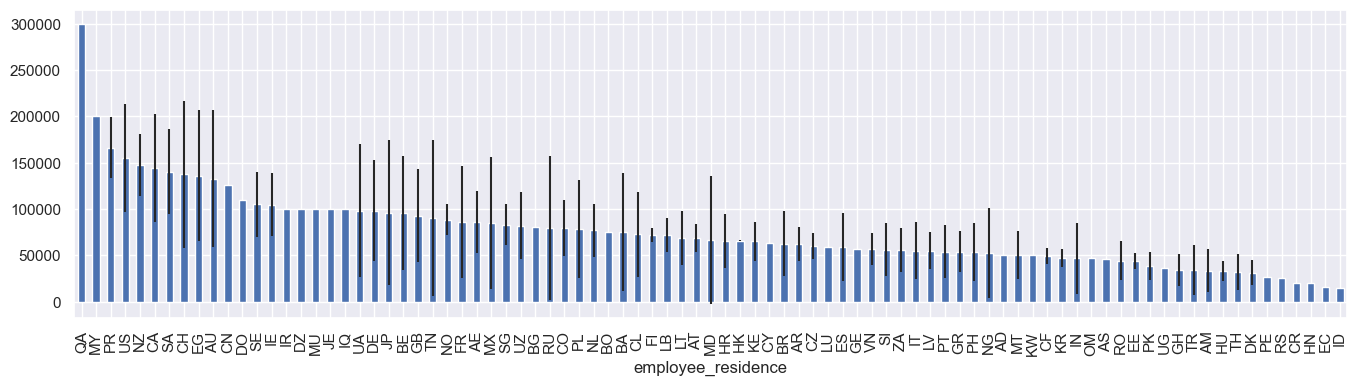

mean           std  count
remote_ratio                                    
On_Site       150409.990934  62231.833571   9707
Remote        143504.644496  58317.498684   4706
Hybrid         79184.702041  51269.185728    245

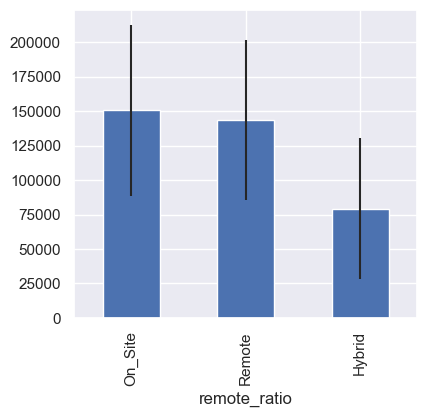

mean           std  count
company_location                                    
US                154435.825072  58279.735245  12811
GB                 92529.446677  49745.102747    647
CA                143609.547804  59092.327932    387
ES                 56817.149606  34411.411212    127
DE                 92426.824742  54676.325682     97
FR                 86310.508197  54807.149935     61
IN                 41995.423729  33807.618394     59
AU                130126.471698  73633.728412     53
PT                 50253.892857  22858.564127     28
NL                 76171.821429  30171.183921     28
BR                 56175.000000  27394.121950     21
CO                 79115.250000  30019.544539     16
LT                 68553.062500  29287.497475     16
ZA                 55786.533333  23999.345401     15
PL                 83083.357143  56366.124953     14
MX                 83186.357143  68979.186671     14
GR                 52260.857143  21279.818413     14
IT                 49600.428571  18169.006051     14
LV                 54734.928571  19875.978577     14
EG                140869.230769  70642.071796     13
EE                 45588.416667  10105.643270     12
IE                104694.916667  33896.783252     12
AT                 68479.300000  15045.888756     10
UA                105600.000000  70596.191273     10
CH                124646.888889  83045.065811      9
NG                 60444.444444  54127.421680      9
JP                110821.625000  77624.356154      8
RU                 78207.857143  74889.345696      7
AR                 69571.428571  17299.876135      7
PH                 49046.666667  29893.040439      6
SI                 56186.333333  28245.696958      6
TR                 23094.666667   4085.214495      6
NZ                147681.666667  33334.636225      6
AE                 86000.000000  33800.887562      5
SG                 62783.000000  27029.838836      5
DK                 49402.600000  28025.534202      5
VN                 63000.000000  18000.000000      4
HU                 39938.000000  18882.157310      4
RO                 44713.000000  15318.661865      4
PR                167500.000000  37527.767497      4
FI                 70833.750000   6722.590938      4
BE                 76864.750000  16763.859488      4
AS                 31684.333333  16480.592718      3
SE                 98791.333333  27214.750143      3
SA                139999.333333  45824.884084      3
LU                 47609.333333  23115.488516      3
TH                 22971.333333   7290.469967      3
GH                 27000.000000  10816.653826      3
MT                 50423.000000  25803.230166      3
HR                 76726.000000  32655.852217      3
CZ                 69478.666667  38752.120075      3
NO                 88462.000000  16905.508925      2
ID                 34208.000000  27164.214106      2
KE                 65000.000000  21213.203436      2
PK                 30000.000000  14142.135624      2
CF                 49216.000000   8700.241836      2
IL                117029.500000   2870.146425      2
LB                 71750.000000  18738.329701      2
KR                 47000.000000   9899.494937      2
BA                 75000.000000  63639.610307      2
HN                 20000.000000           NaN      1
MD                 18000.000000           NaN      1
MY                 40000.000000           NaN      1
CL                 40038.000000           NaN      1
QA                300000.000000           NaN      1
BS                 45555.000000           NaN      1
OM                 46848.000000           NaN      1
AM                 50000.000000           NaN      1
AD                 50745.000000           NaN      1
HK                 65058.000000           NaN      1
GI                 79976.000000           NaN      1
IQ                100000.000000           NaN      1
CN                100000.000000           NaN      1
IR                100000.000000           NaN      1

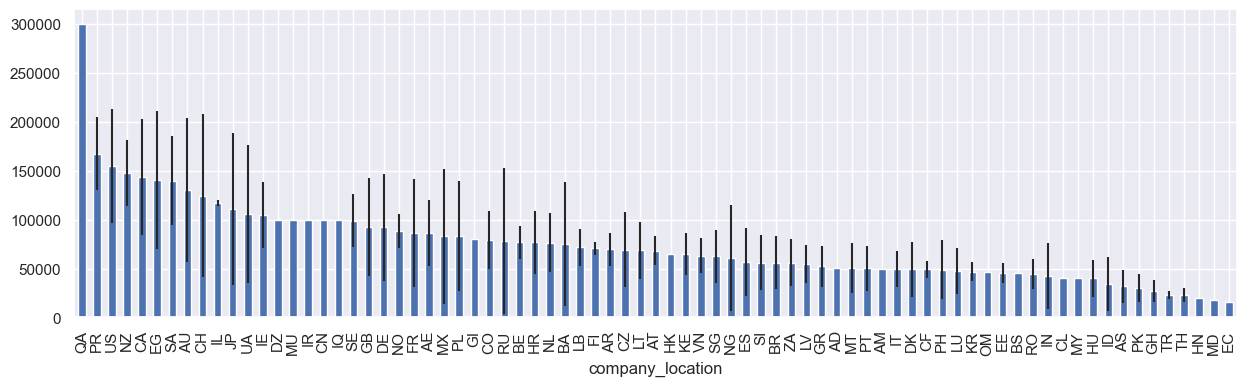

mean           std  count
company_size                                    
M             148530.686264  60486.993199  13505
L             137229.365503  70241.319924    974
S              84885.871508  53349.543180    179

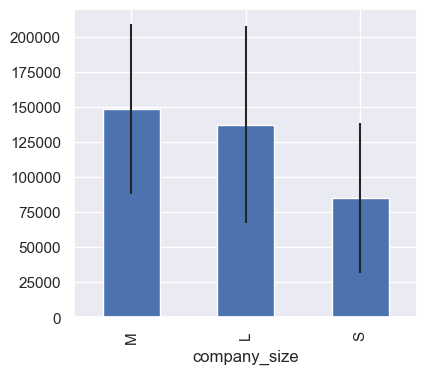

In [30]:
# Quick chart view of the salary range for all categorical columns.
for col in ['work_year'] + categorical_columns:
    group = aijobs.groupby(col)['salary_in_usd'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
    display(group.sort_values('count', ascending=False))
    group['mean'].sort_values(ascending=False).plot(kind='bar', yerr=group['std'], figsize=(len(group)/7+4, 4))
    plt.show()

#### Dummy detail comparison charts

In [31]:
# definition for plotting all post treatment dummies' counts, averages and deviation of target variable

def plotting(var):
    usd = new_X.groupby(var)['salary_in_usd']
    box = new_X.groupby(var)['transformed_salary']

    fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))
    ax.remove()

    ax1 = plt.subplot(1, 2, 1)
    rects = ax1.bar(1, usd.mean()[1].astype(int), 0.8, yerr=usd.std()[1].astype(int), color='mediumturquoise')
    ax1.bar_label(rects, label_type='center')
    rects = ax1.bar(2, usd.mean()[0].astype(int), 0.8, yerr=usd.std()[0].astype(int), color='salmon')
    ax1.bar_label(rects, label_type='center')
    ax1.set_xticks([1, 2], [var, 'not ' + var])
    ax1.set_title('Salary in USD')

    ax2 = plt.subplot(1, 2, 2)
    rects = ax2.bar(1, box.mean()[1].astype(int), 0.8, yerr=box.std()[1].astype(int), color='mediumaquamarine')
    ax2.bar_label(rects, label_type='center')
    rects = ax2.bar(2, box.mean()[0].astype(int), 0.8, yerr=box.std()[0].astype(int), color='lightcoral')
    ax2.bar_label(rects, label_type='center')
    ax2.set_xticks([1, 2], [var, 'not ' + var])
    ax2.set_title('Transformed Salary')

    plt.show()

In [32]:
avg = new_X[['transformed_salary']].mean()[0]
avg

1066.307618249042

salary_in_usd              transformed_salary     
                   mean    std count               mean  std
work_year                                                   
2020              97864  62428    60                834  279
2021             103935  60429   177                863  282
2022             134732  54849  1606               1013  236
2023             152665  60811  8381               1085  240
2024             146343  61954  4240               1059  246

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
work_abroad                                                    
0                  148289  60921  14401               1067  243
1                   81138  57509     63                748  273

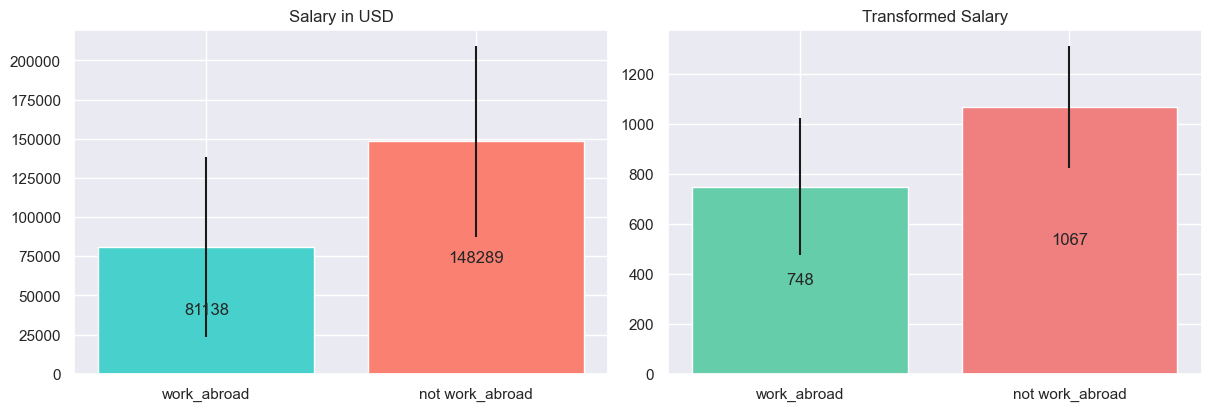

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
job_name_AI                                                    
0                  147860  60913  14302               1065  244
1                  160046  72498    162               1103  294

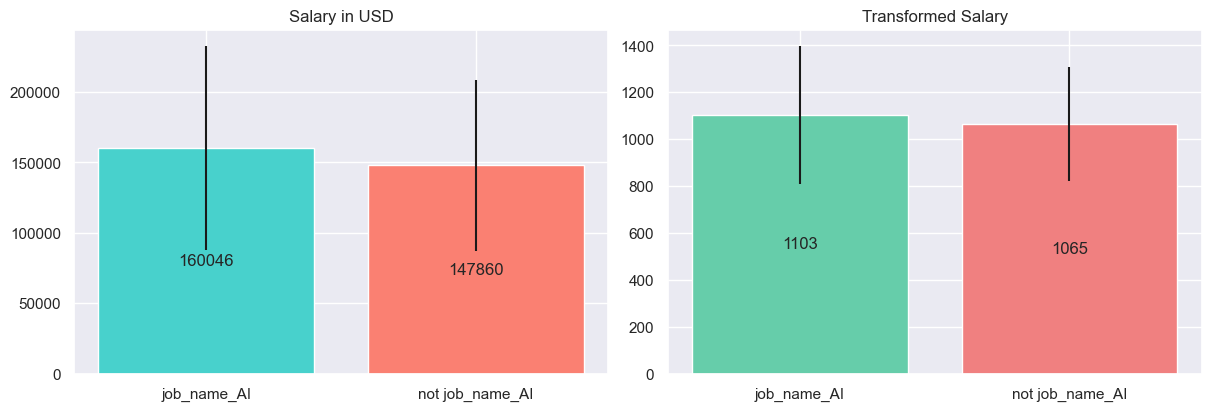

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Analyst                                                    
0                       157063  60785  11864               1103  239
1                       106625  42411   2600                896  194

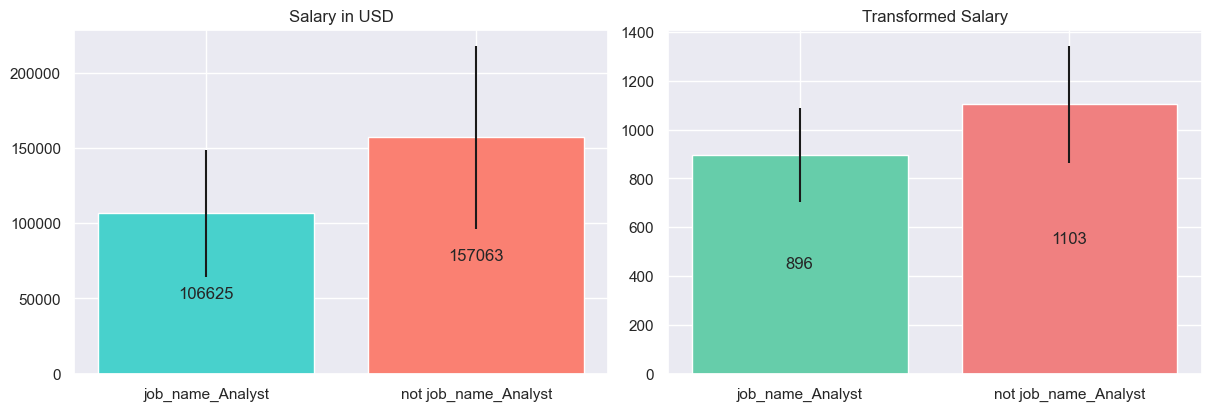

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Analytics                                                    
0                         147980  61410  13986               1065  246
1                         148493  50007    478               1077  196

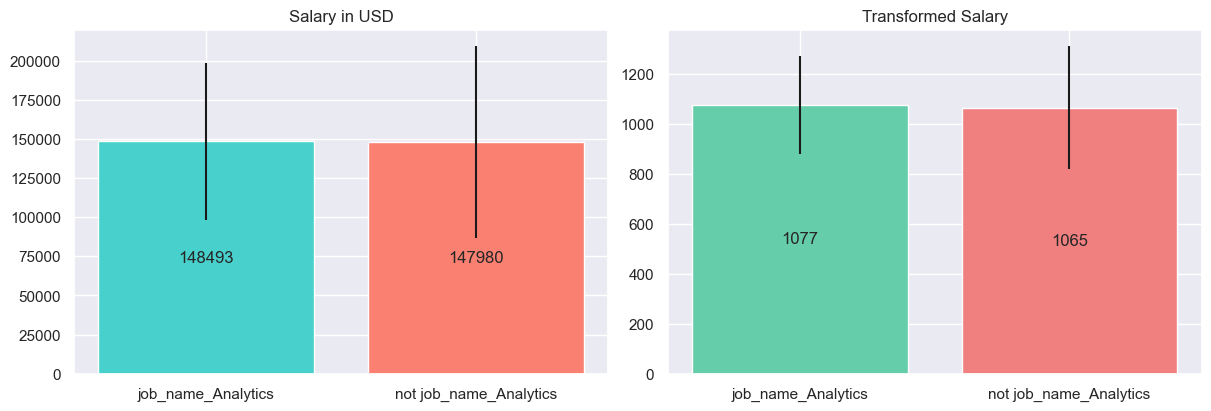

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Applied                                                    
0                       146960  60906  14062               1062  244
1                       184271  55358    402               1210  212

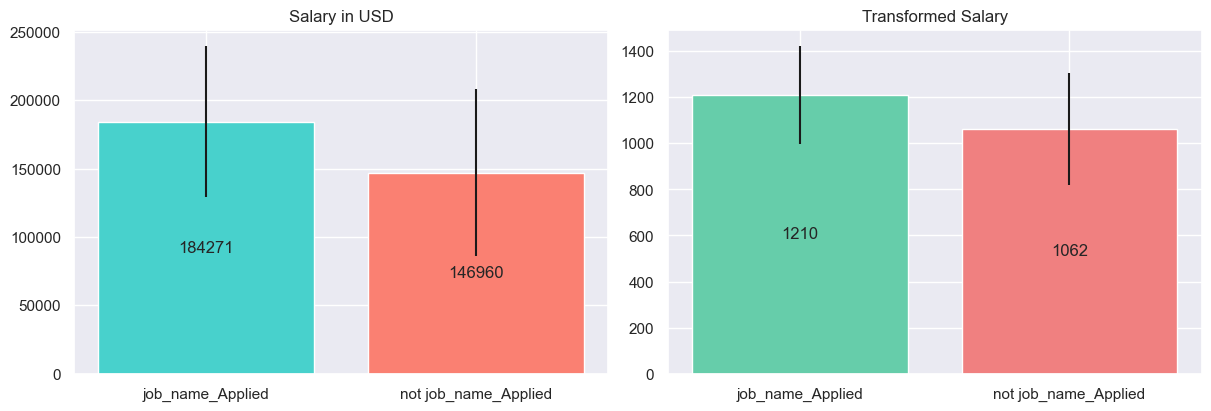

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Architect                                                    
0                         147555  61143  14072               1064  245
1                         163843  56020    392               1134  210

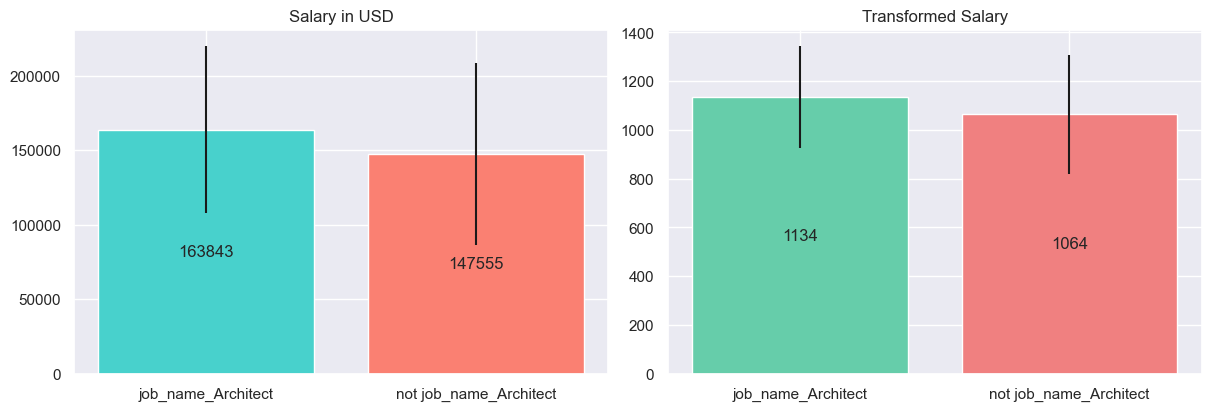

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Associate                                                    
0                         148025  61057  14459               1066  244
1                          67319  15618      5                711   87

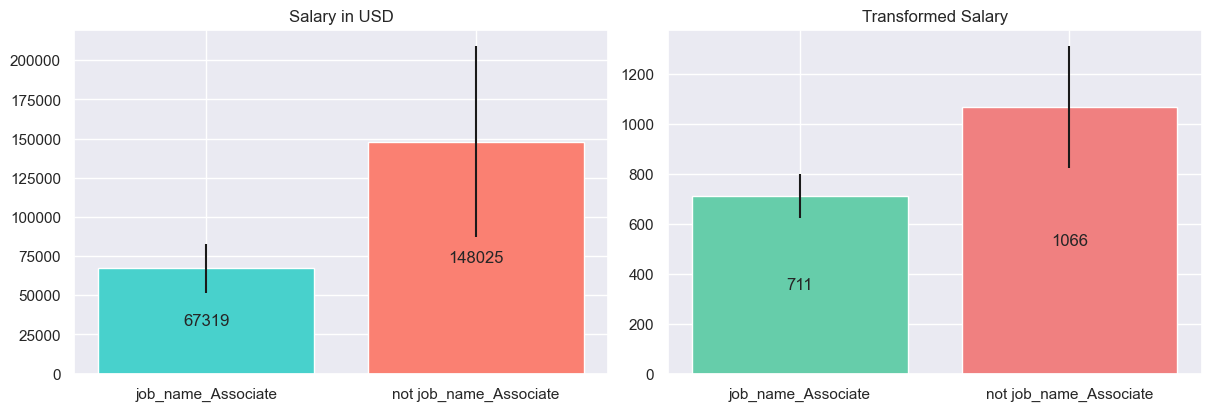

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Big                                                    
0                   148053  61042  14452               1066  244
1                    79793  53002     12                735  300

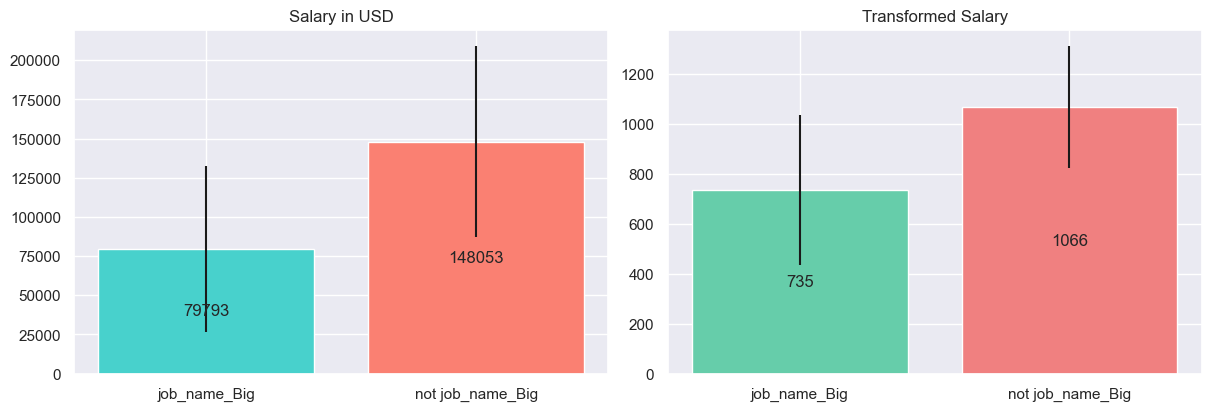

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Consultant                                                    
0                          148247  61118  14377               1067  245
1                          106602  30892     87                904  149

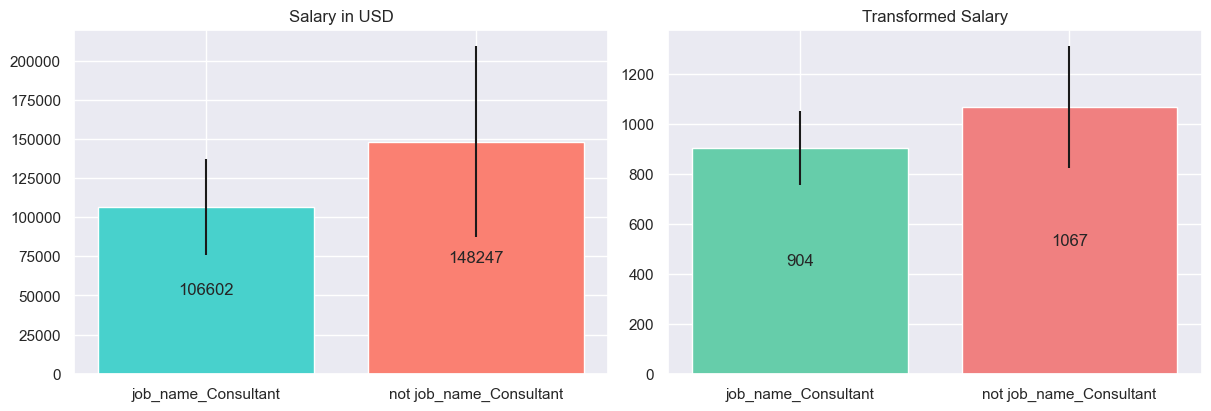

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Database                                                    
0                        148001  61083  14451               1066  245
1                        143538  37756     13               1063  154

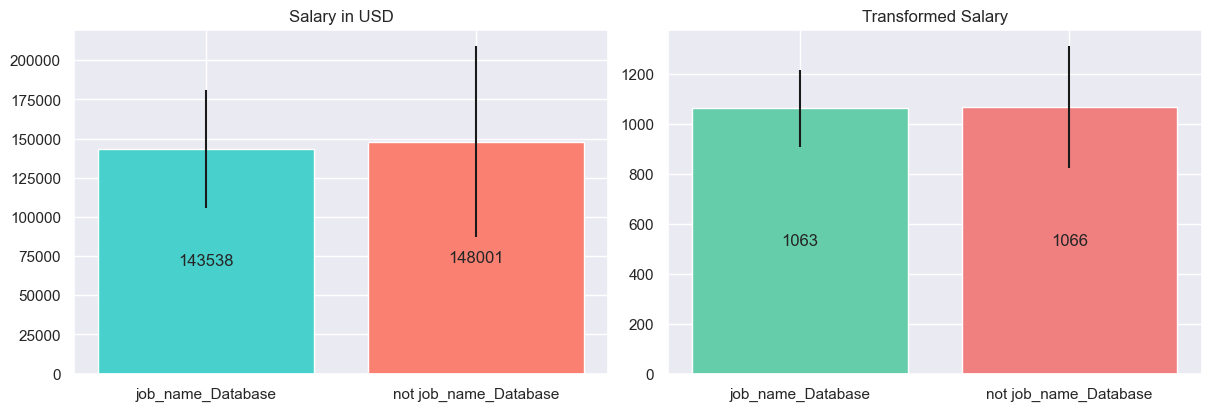

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Decision                                                    
0                        147949  61117  14426               1066  245
1                        166094  31969     38               1154  119

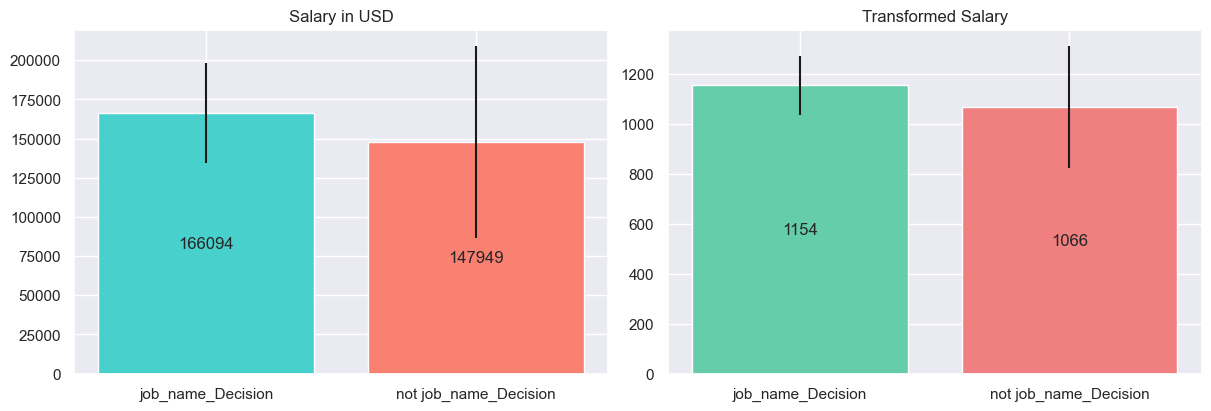

salary_in_usd                transformed_salary     
                       mean     std  count               mean  std
job_name_Deep                                                     
0                    147963   61009  14451               1066  244
1                    185681  103900     13               1185  373

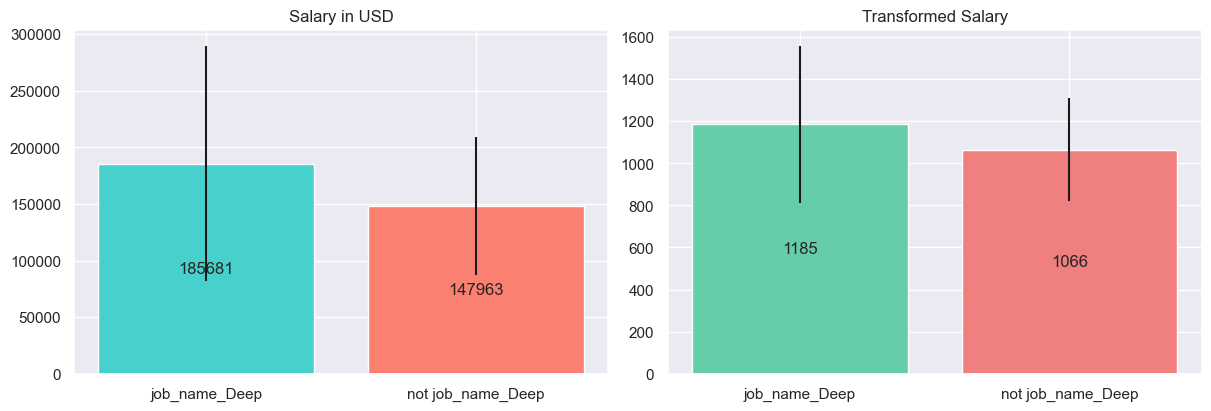

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Developer                                                    
0                         148573  61090  14249               1068  244
1                         109832  45410    215                910  200

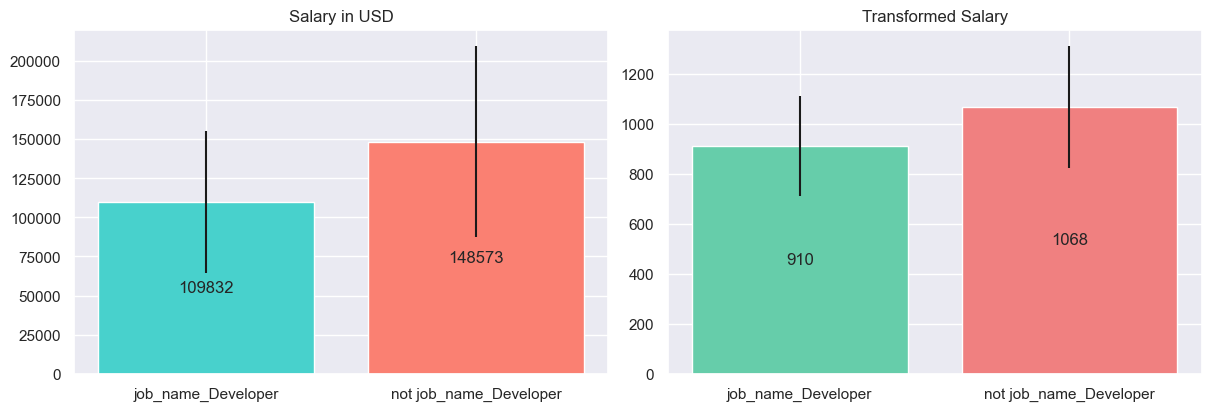

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Director                                                    
0                        147846  61003  14425               1065  244
1                        203820  59463     39               1279  212

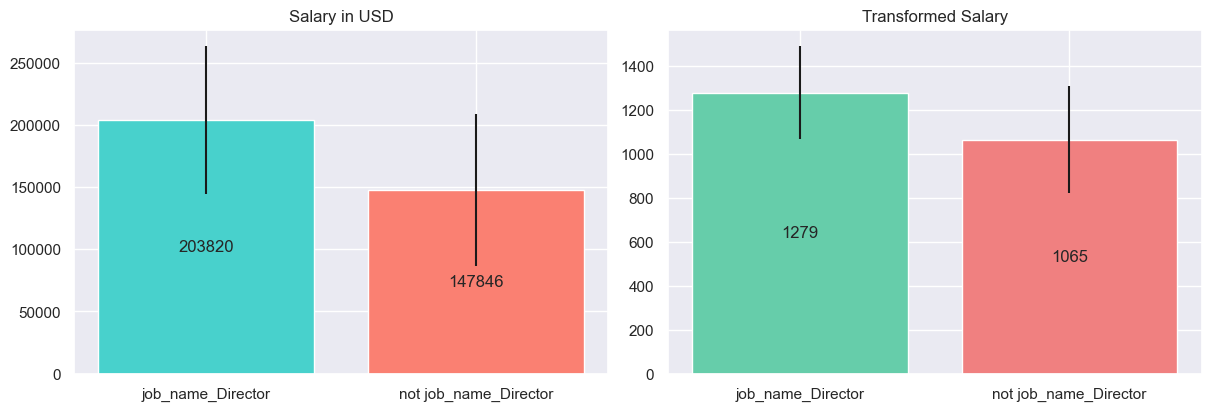

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_ETL                                                    
0                   148057  61058  14433               1066  244
1                   119922  58809     31                947  248

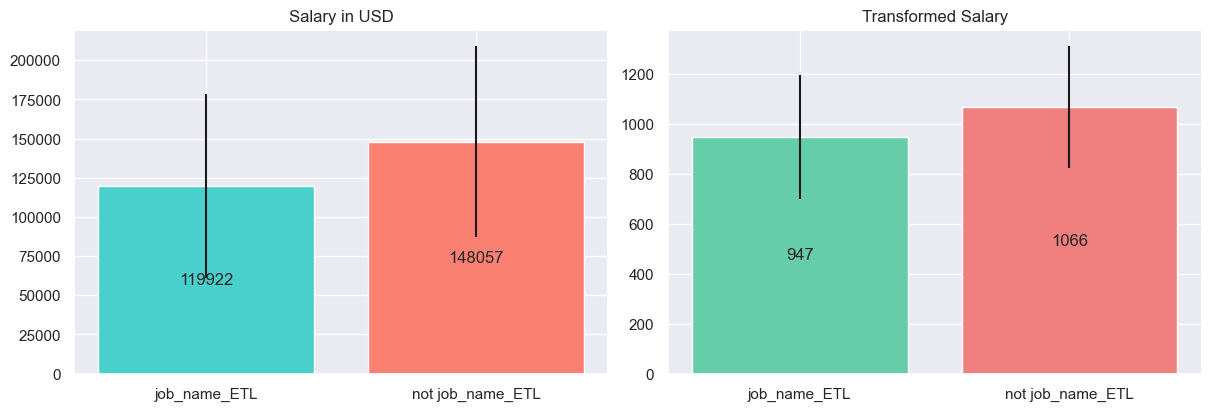

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Head                                                    
0                    147748  60879  14402               1065  244
1                    205735  75855     62               1275  276

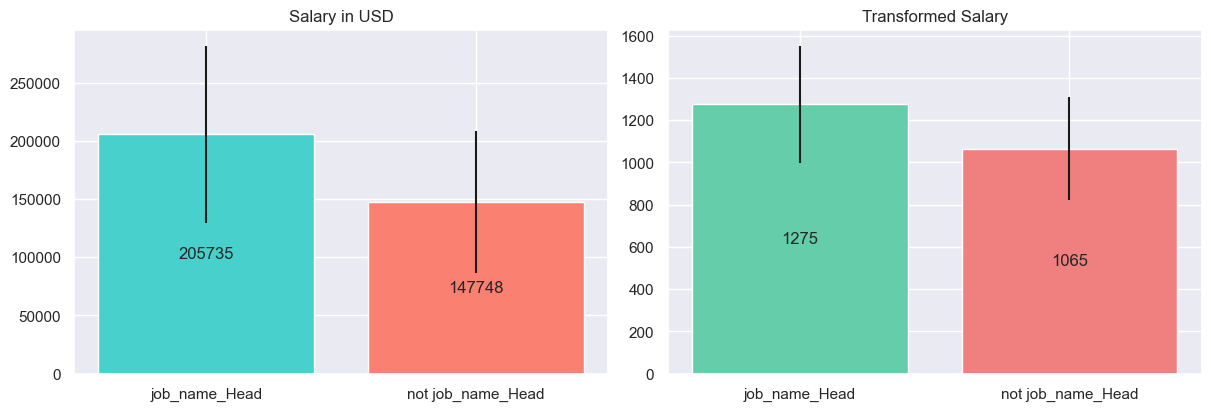

salary_in_usd               transformed_salary     
                                 mean    std  count               mean  std
job_name_Infrastructure                                                    
0                              147919  61075  14417               1065  245
1                              171731  53570     47               1165  206

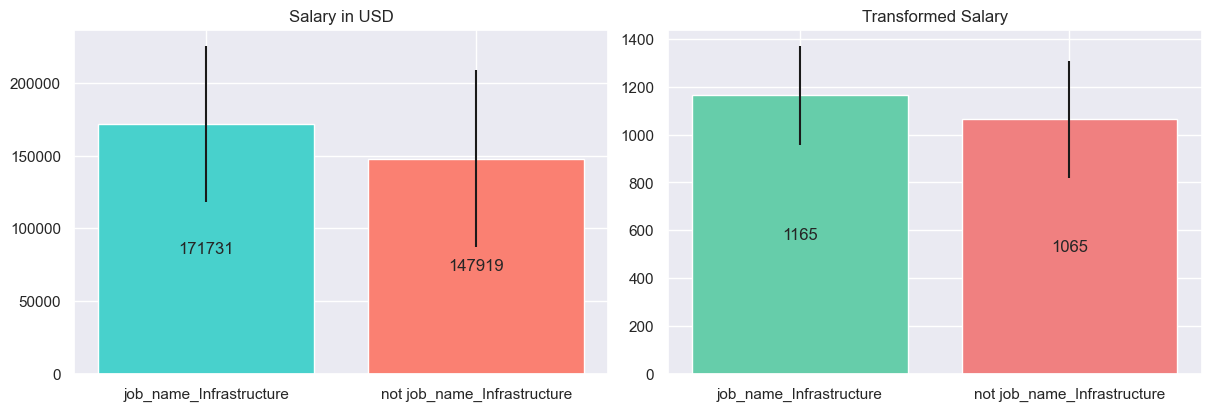

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Insight                                                    
0                       148081  61020  14452               1066  244
1                        46459   7158     12                584   50

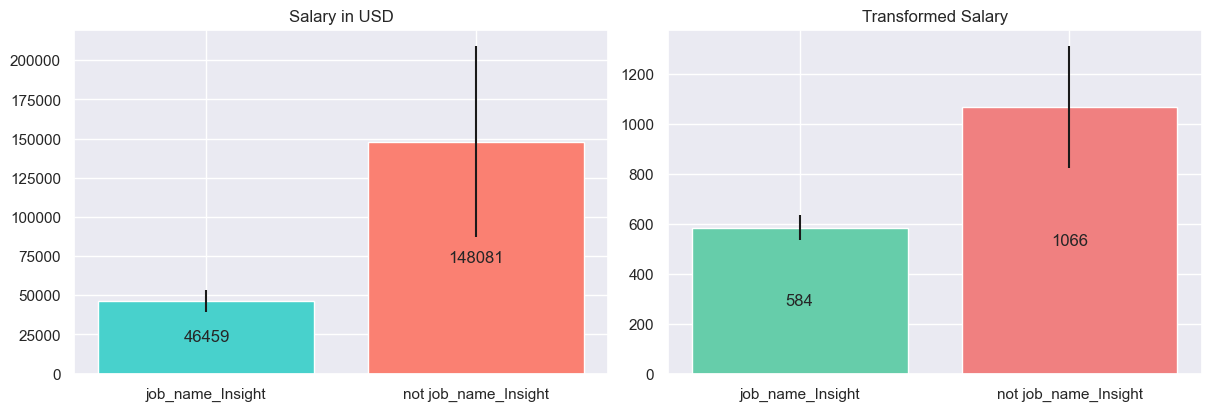

salary_in_usd               transformed_salary     
                              mean    std  count               mean  std
job_name_Integration                                                    
0                           148117  61071  14419               1066  244
1                           109595  45416     45                909  201

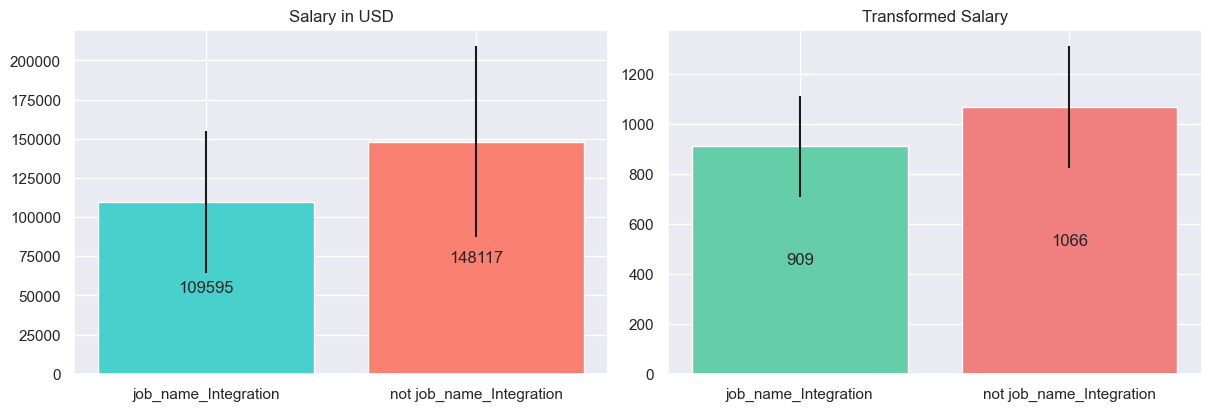

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Lead                                                    
0                    148025  61029  14372               1066  244
1                    143628  66687     92               1039  285

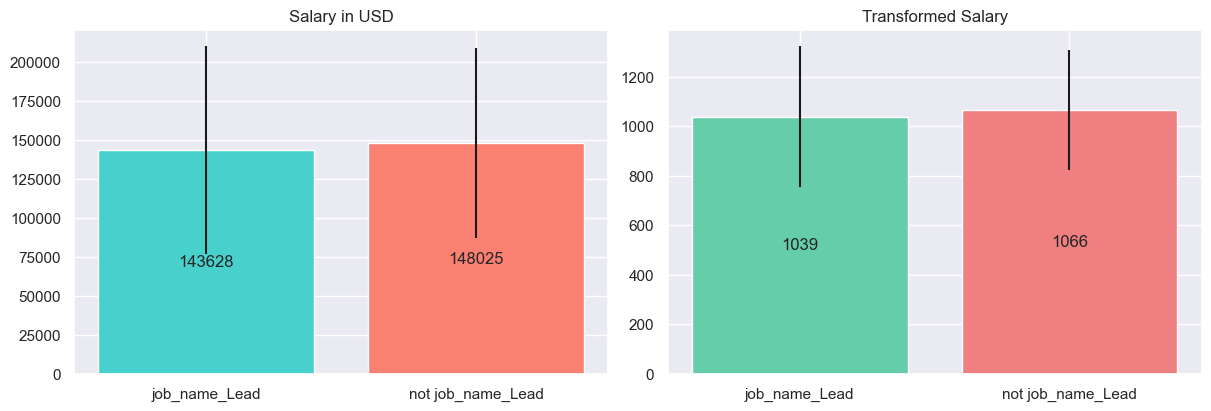

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_NLP                                                    
0                   148015  61047  14449               1066  244
1                   130002  77349     15                972  331

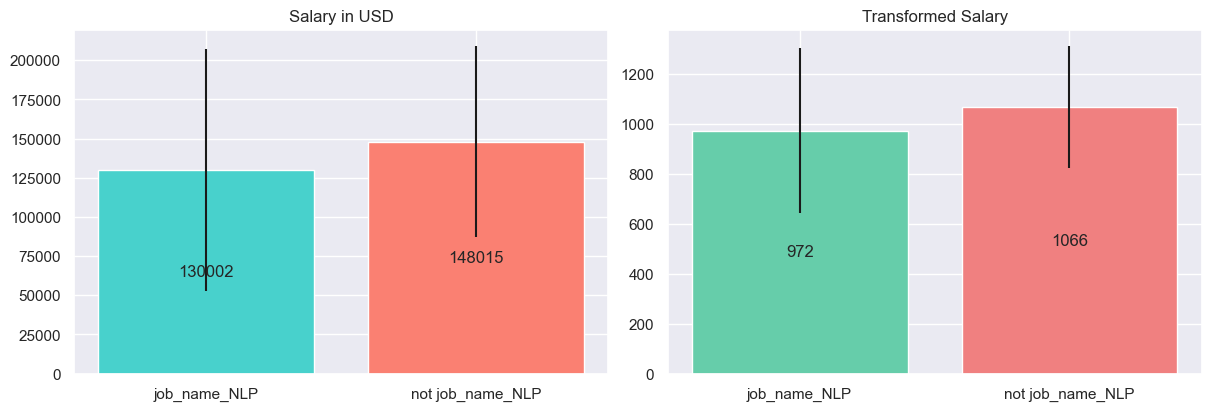

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Ops                                                    
0                   147993  61079  14442               1066  245
1                   150122  52601     22               1083  204

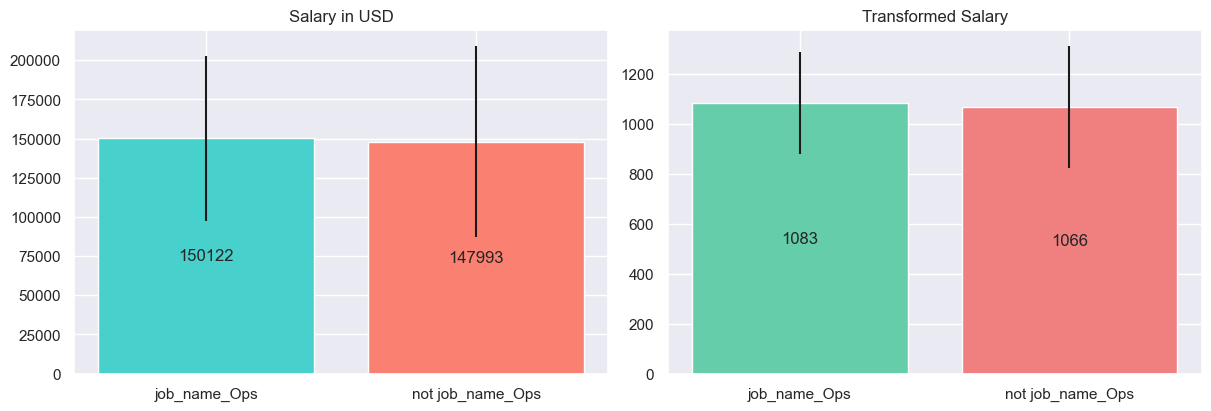

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Owner                                                    
0                     148005  61050  14458               1066  244
1                     127830  97991      6                961  359

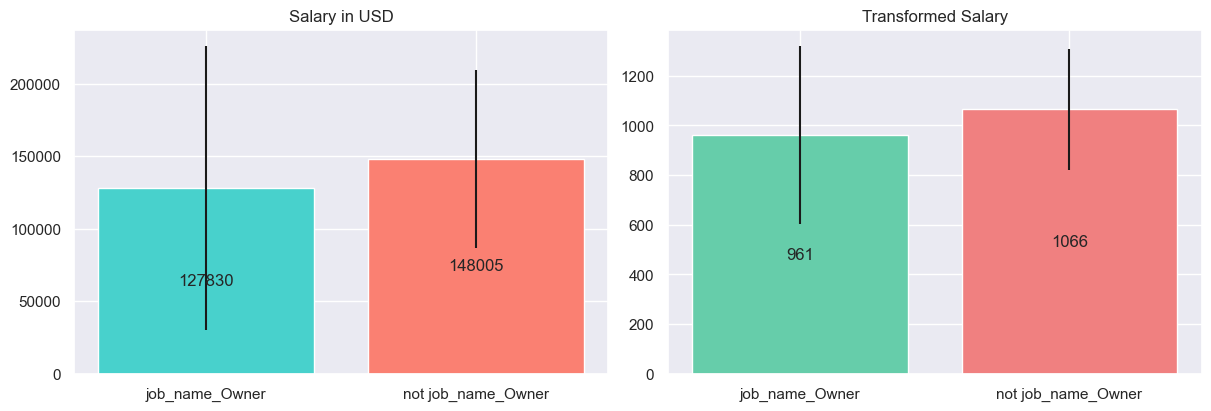

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Practitioner                                                    
0                            148013  61080  14448               1066  245
1                            133650  45759     16               1017  191

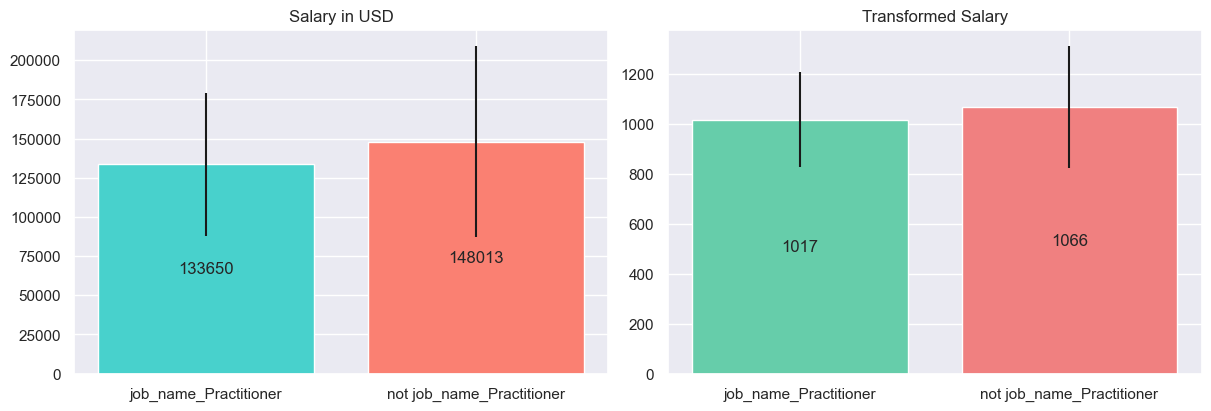

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Principal                                                    
0                         147989  61075  14447               1066  245
1                         154989  53516     17               1097  231

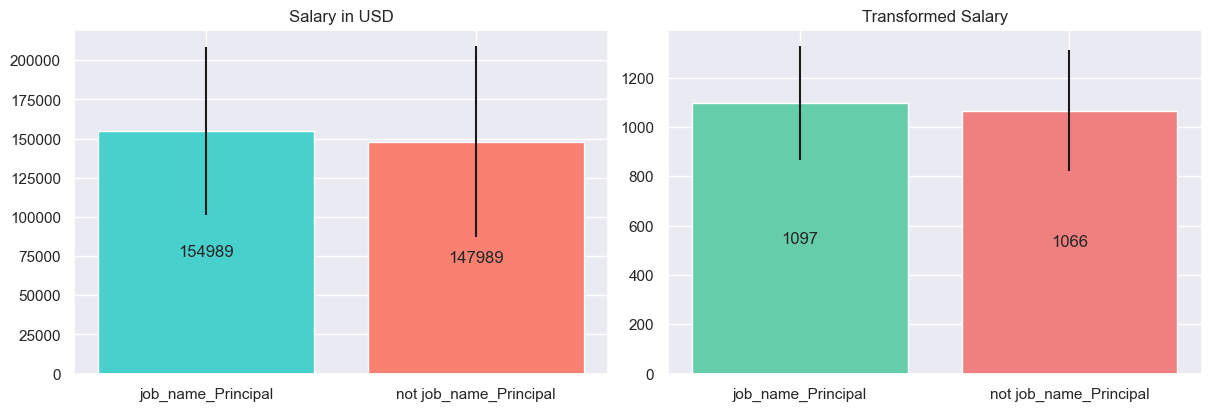

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Product                                                    
0                       148000  61080  14421               1066  245
1                       146925  56465     43               1064  233

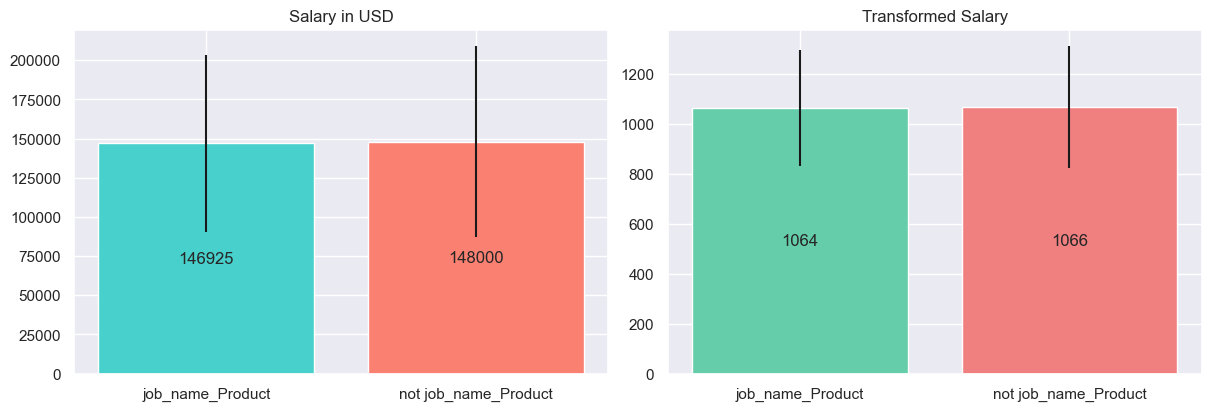

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Prompt                                                    
0                      147968  61063  14450               1066  244
1                      177937  58683     14               1186  226

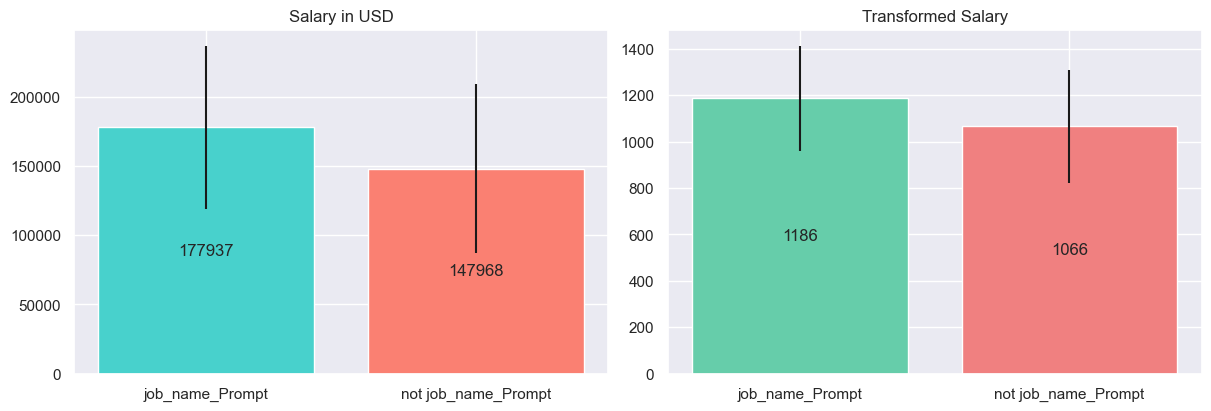

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Quality                                                    
0                       148122  61038  14435               1066  244
1                        85532  39020     29                792  196

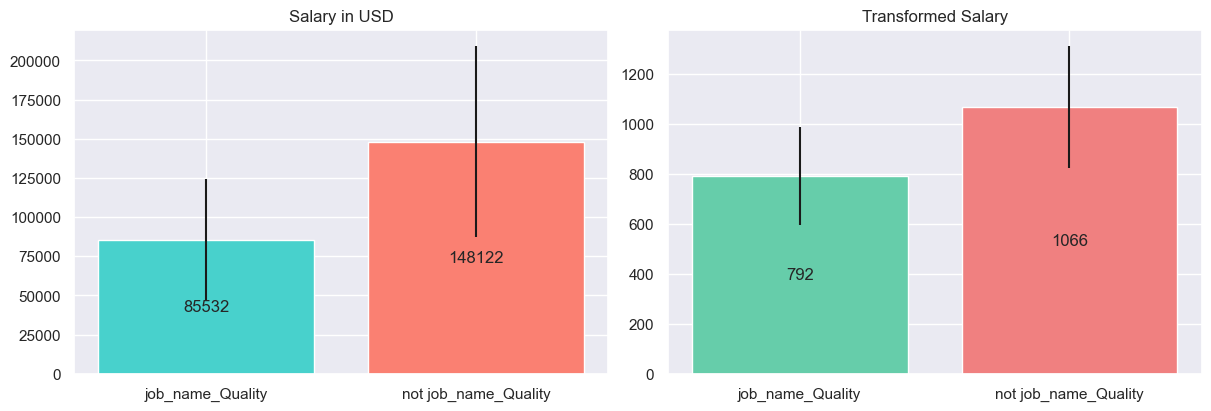

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Robotics                                                    
0                        147980  61067  14450               1066  245
1                        165071  59157     14               1137  229

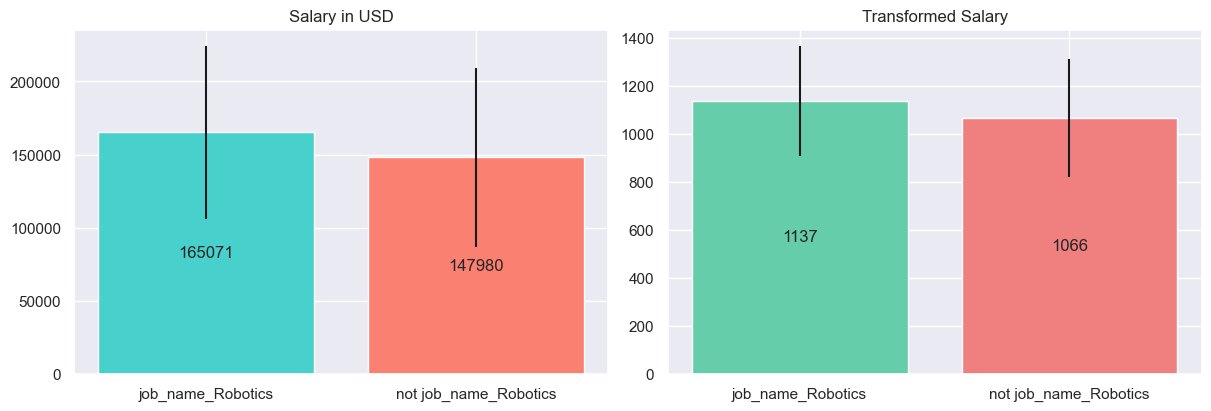

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Software                                                    
0                        147950  61036  14435               1066  244
1                        171312  71746     29               1147  294

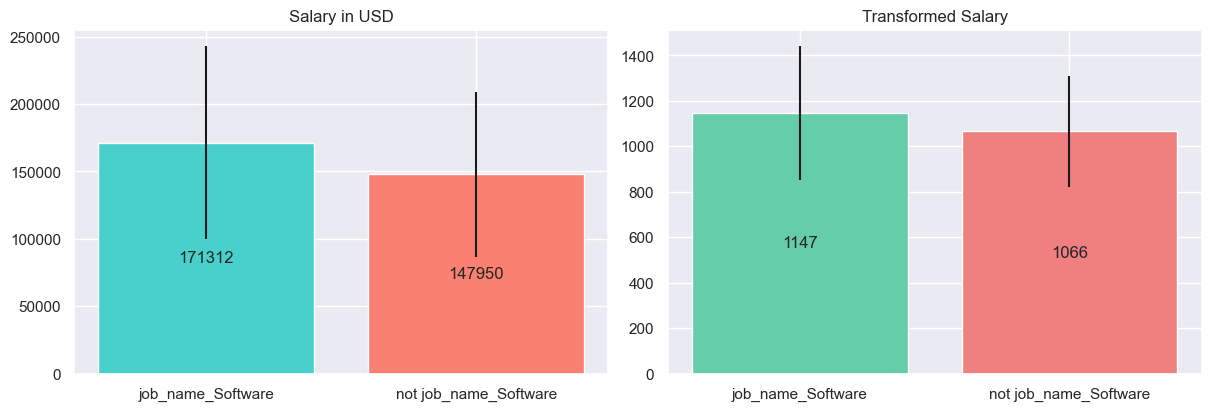

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Specialist                                                    
0                          148495  60995  14325               1068  244
1                           96693  44472    139                848  196

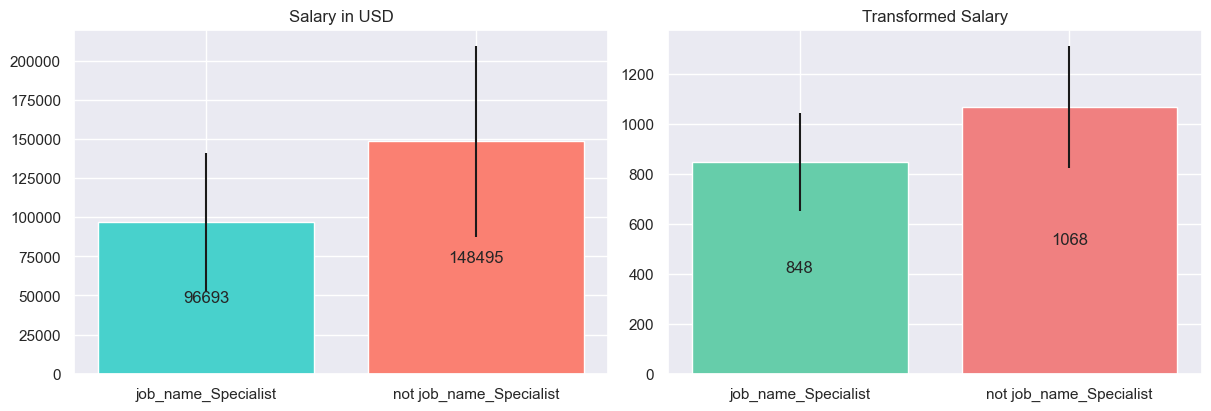

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Staff                                                    
0                     148012  61058  14459               1066  244
1                     102750  73459      5                836  385

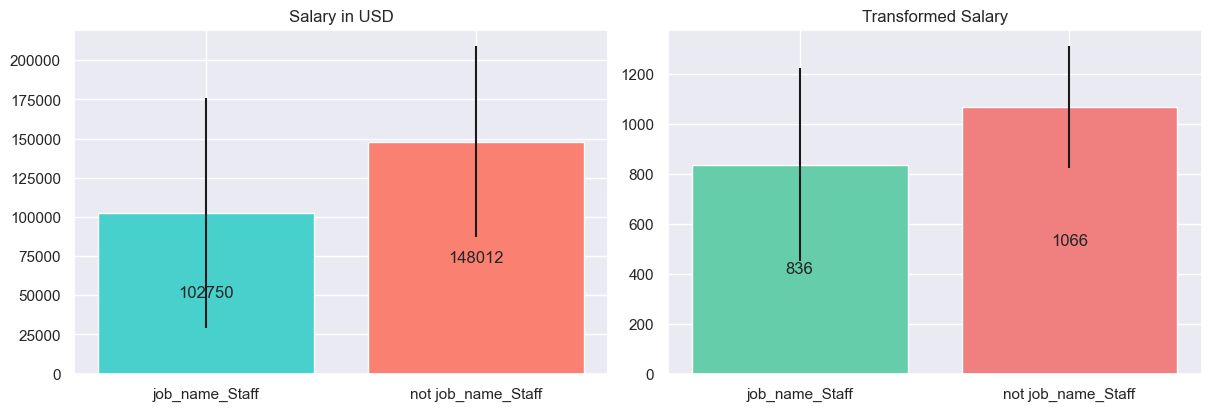

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Vision                                                    
0                      147948  61018  14432               1066  244
1                      169902  77681     32               1134  326

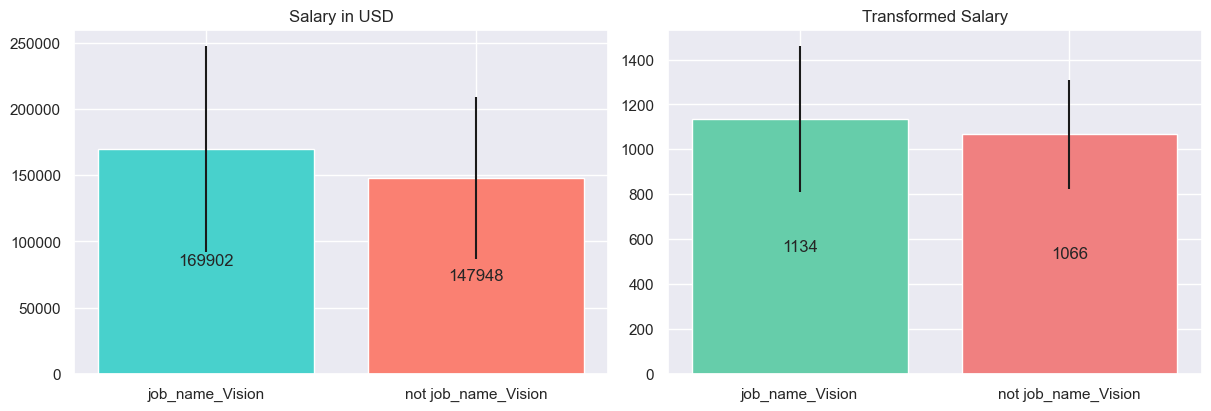

salary_in_usd               transformed_salary     
                                mean    std  count               mean  std
job_name_Visualization                                                    
0                             148033  61078  14446               1066  245
1                             119144  42584     18                955  188

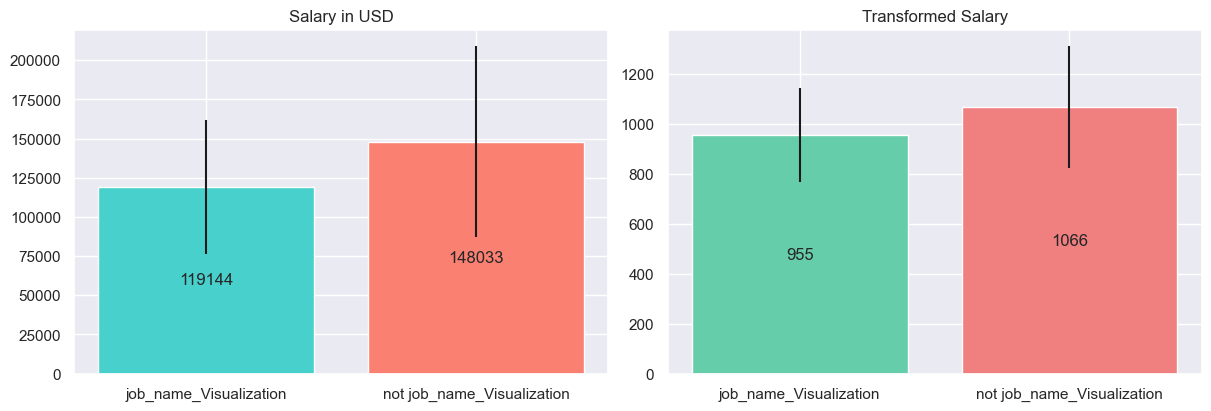

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Machine                                                    
0                       142544  59044  12551               1045  239
1                       183769  62043   1913               1205  231

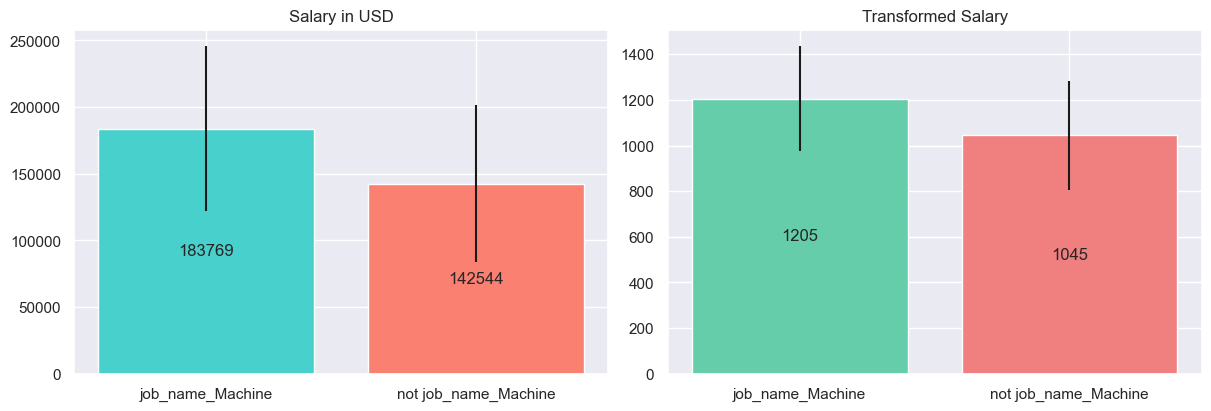

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Operations                                                    
0                          148163  61055  14384               1066  244
1                          118177  55701     80                941  234

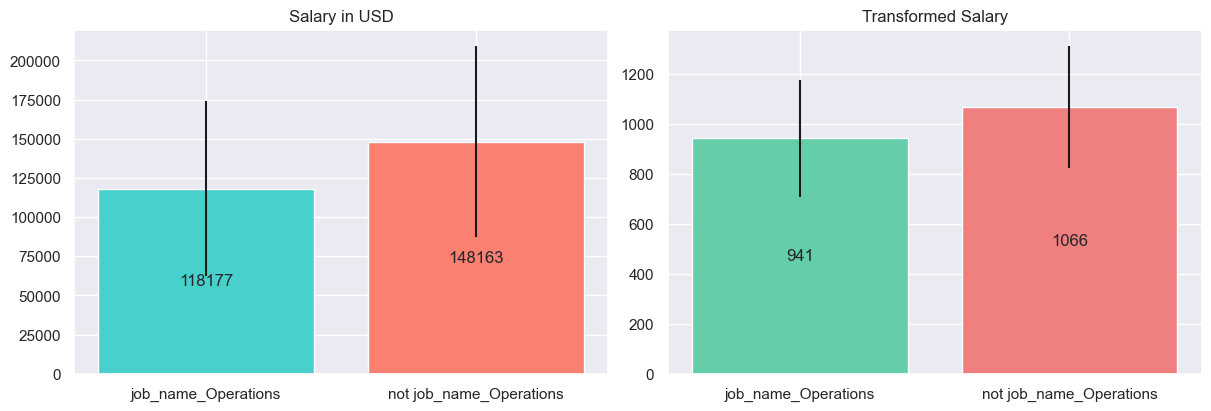

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Intelligence                                                    
0                            149136  61280  13816               1070  245
1                            123704  50560    648                969  219

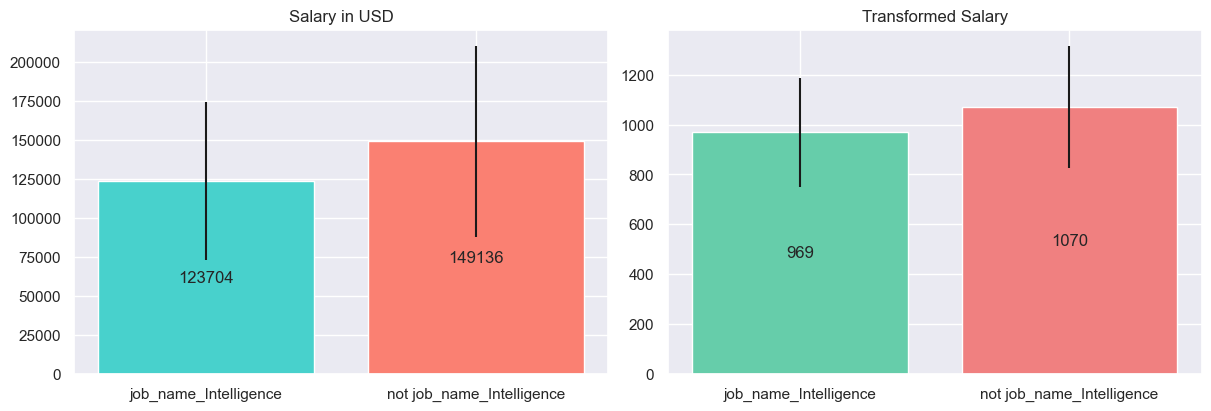

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Business                                                    
0                        149208  61254  13801               1071  244
1                        122785  50853    663                964  222

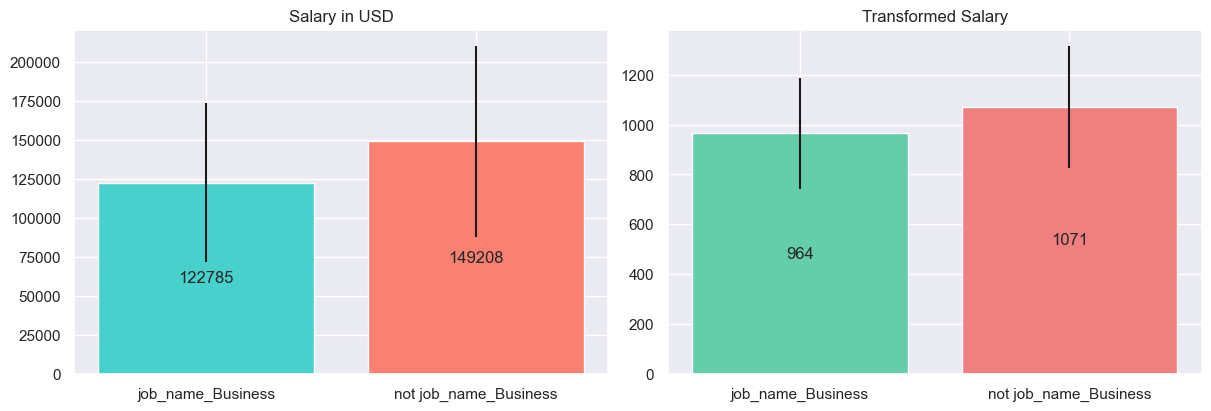

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Cloud                                                    
0                     147990  61080  14445               1066  245
1                     153219  49975     19               1097  192

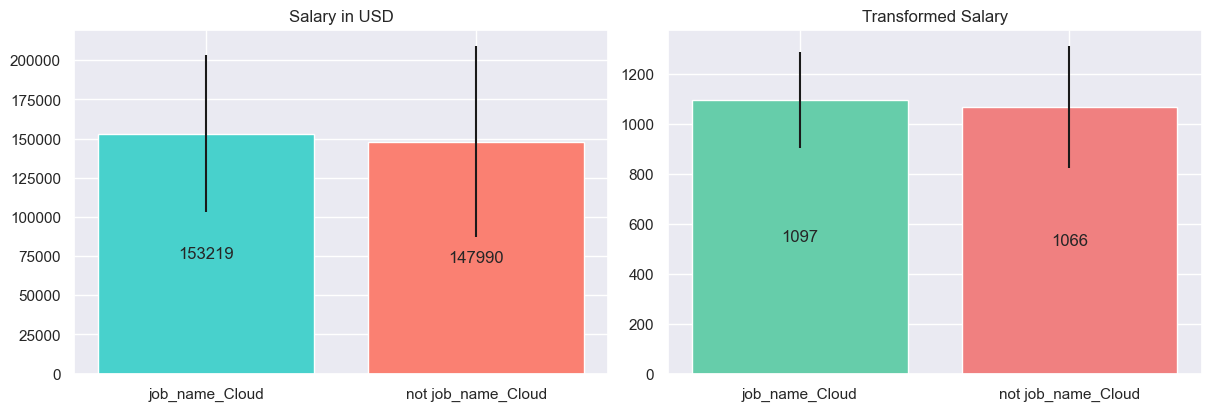

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Modeler                                                    
0                       148062  61114  14414               1066  245
1                       129084  41364     50               1000  173

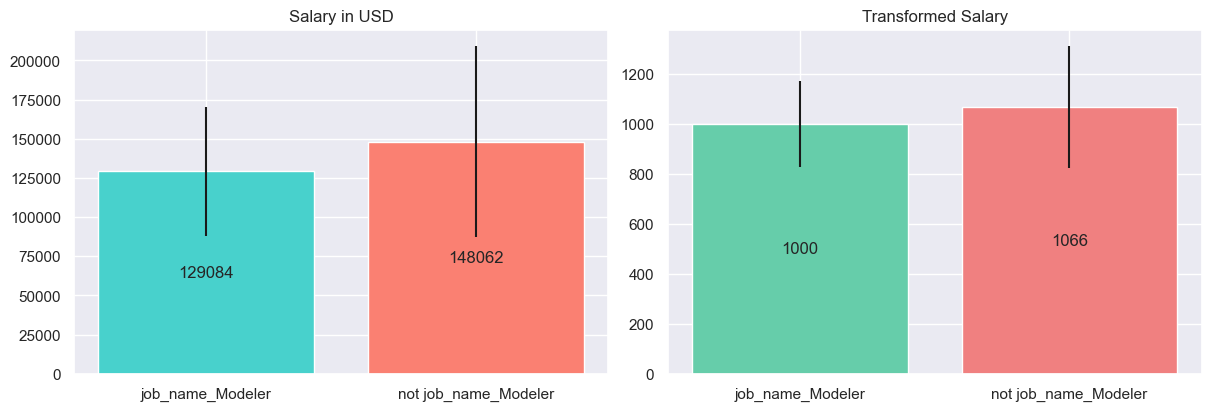

salary_in_usd              transformed_salary     
                           mean    std count               mean  std
job_name_Engineer                                                   
0                        140016  59871  8388               1033  244
1                        159015  60989  6076               1111  238

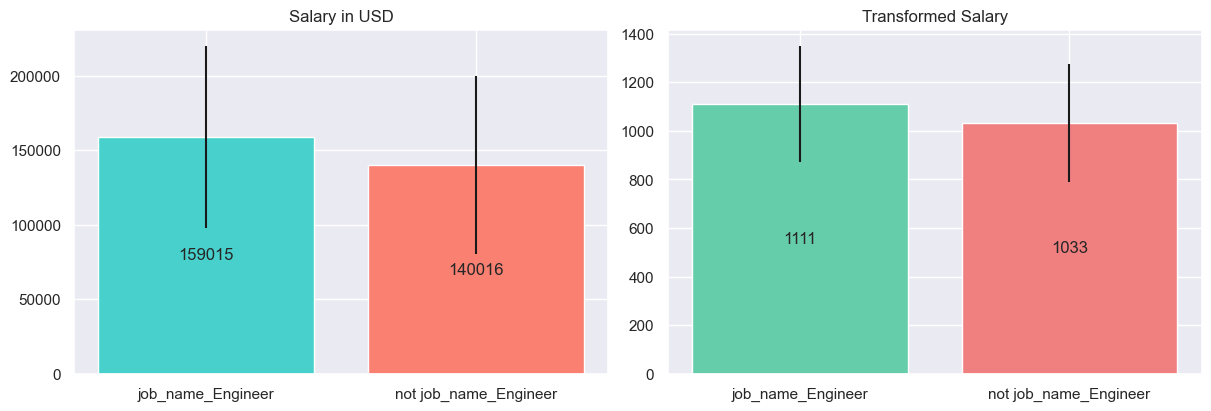

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Finance                                                    
0                       148014  61043  14457               1066  244
1                       112471  97906      7                884  375

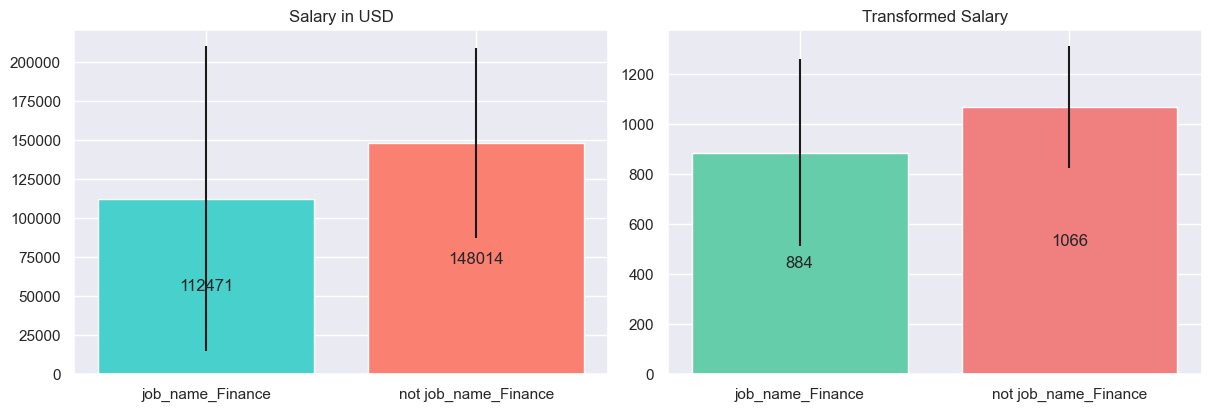

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Research                                                    
0                        146714  60315  13620               1061  242
1                        168689  68923    844               1143  265

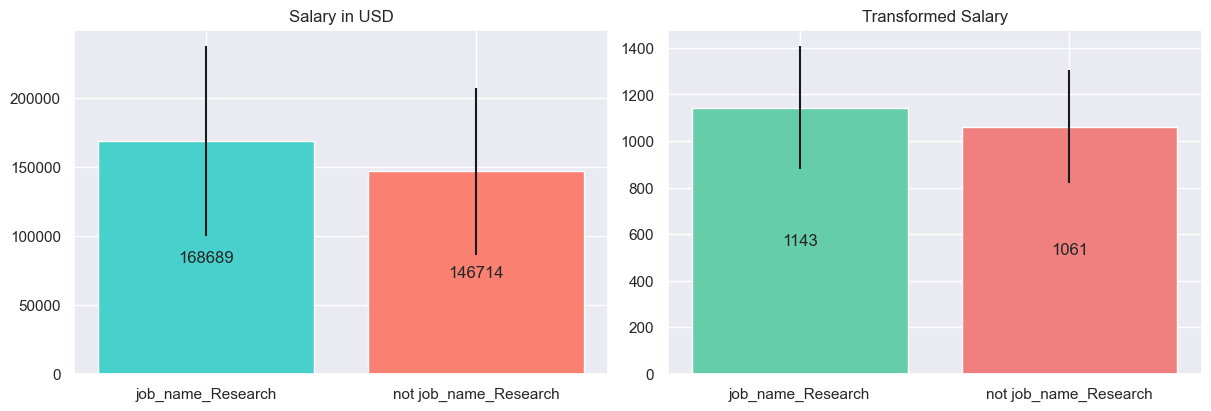

salary_in_usd              transformed_salary     
                            mean    std count               mean  std
job_name_Scientist                                                   
0                         142255  60686  9954               1042  245
1                         160669  59987  4510               1118  236

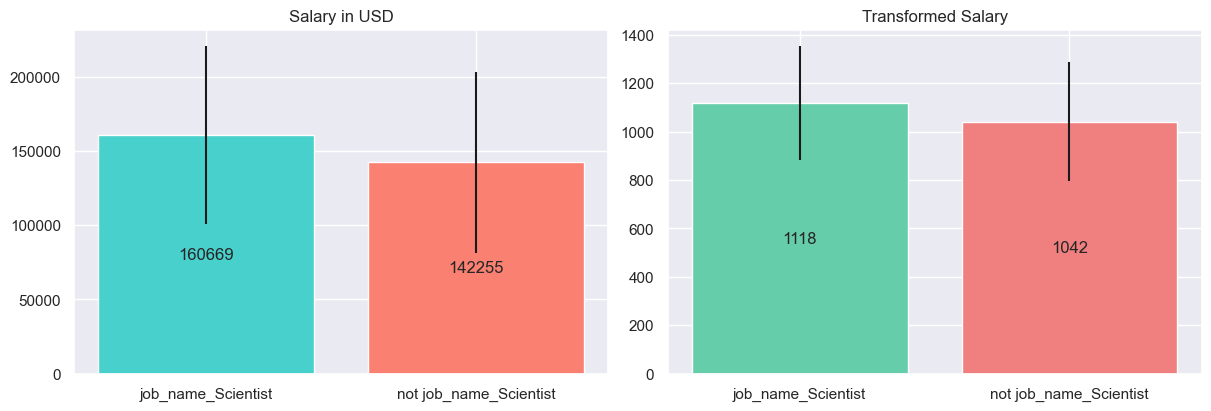

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Strategist                                                    
0                          148075  61067  14436               1066  244
1                          107593  45466     28                903  183

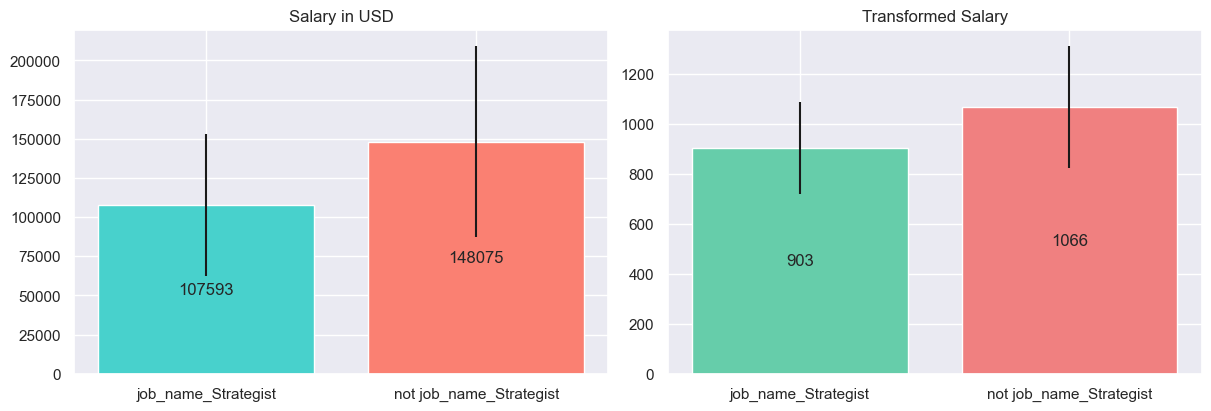

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Manager                                                    
0                       148318  61066  14018               1067  245
1                       137900  60259    446               1026  239

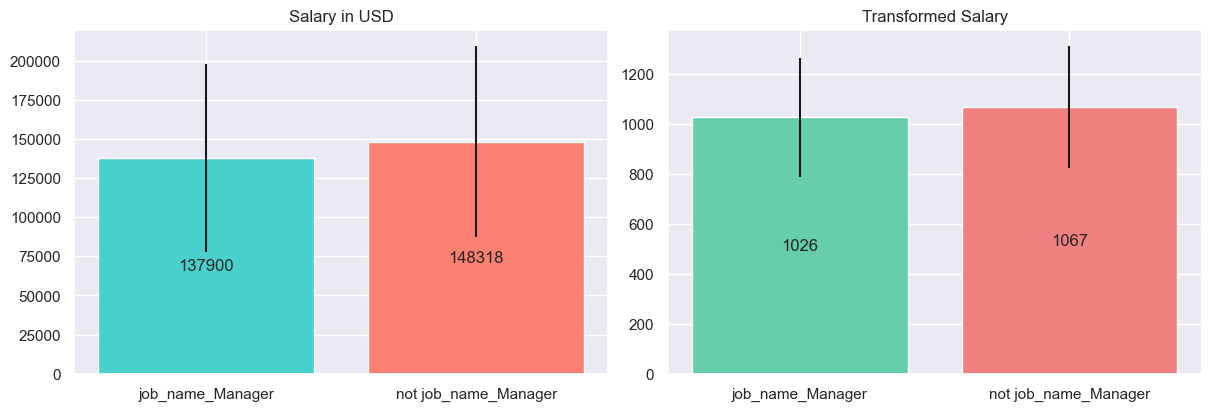

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EN                                                    
0                          152427  59868  13385               1085  235
1                           93041  47583   1079                824  225

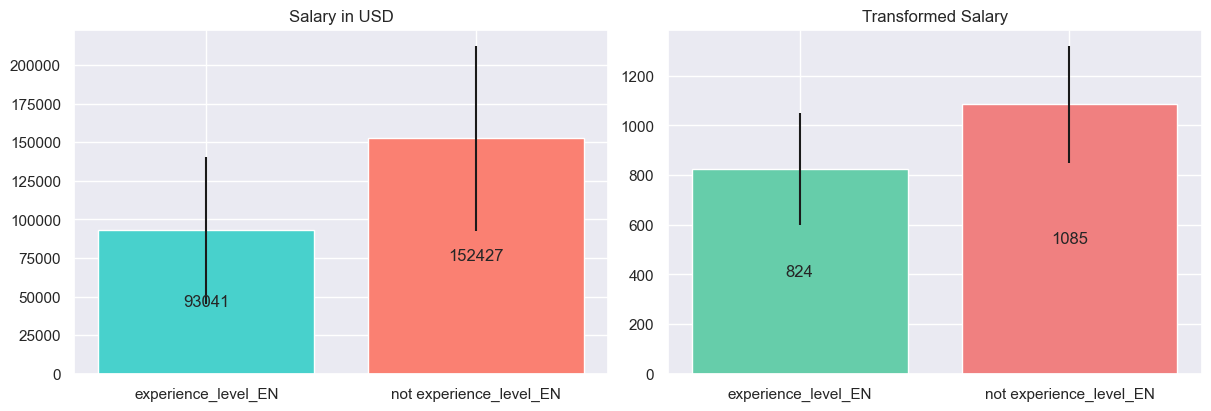

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EX                                                    
0                          146740  60543  14040               1061  243
1                          189603  63719    424               1226  231

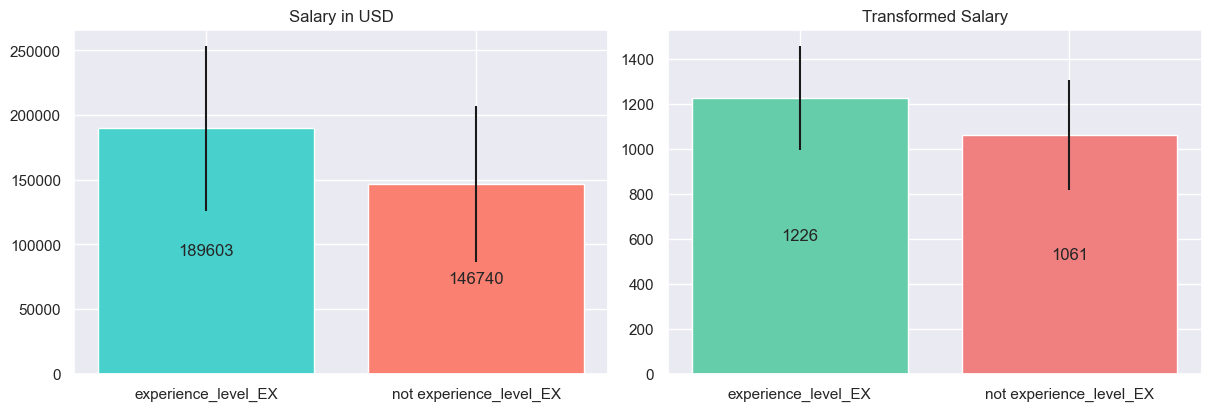

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_MI                                                    
0                          155921  61136  11027               1098  240
1                          122572  53425   3437                962  228

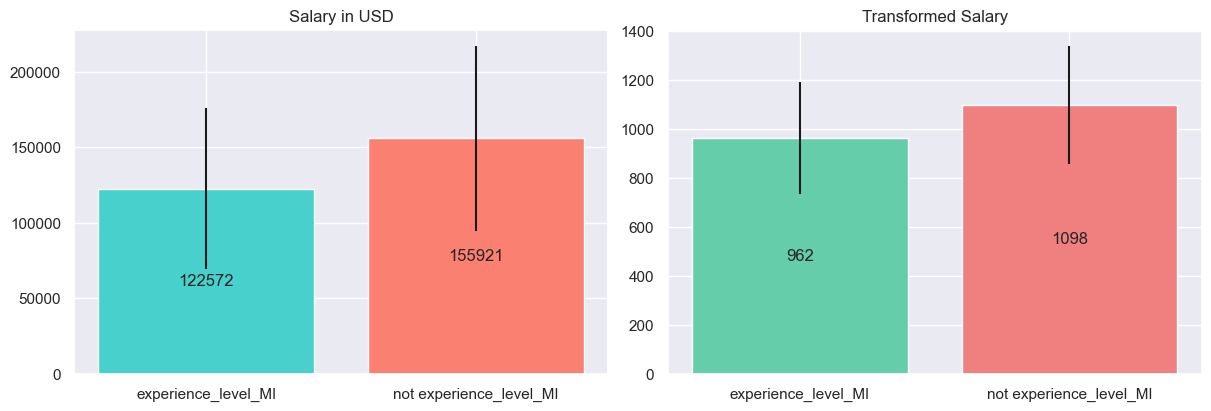

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
experience_level_SE                                                   
0                          121875  58338  4940                954  249
1                          161546  57972  9524               1124  221

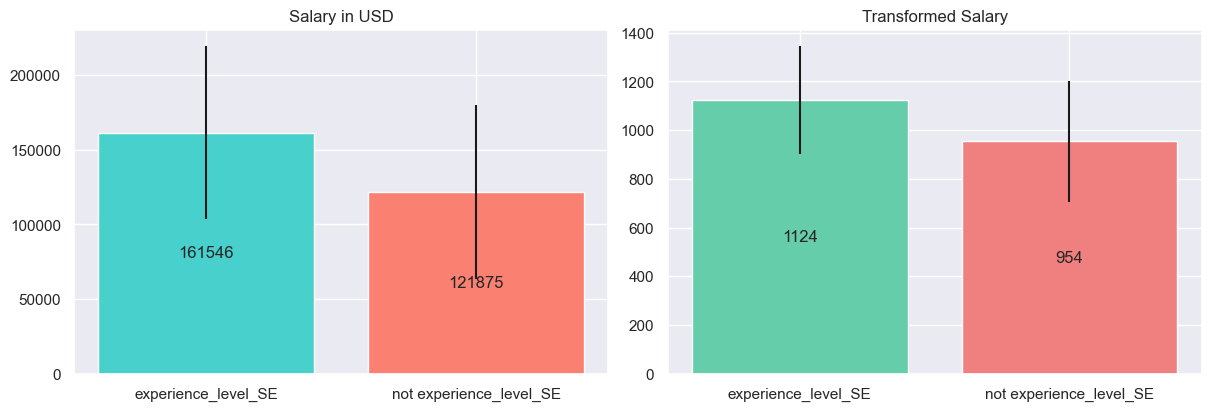

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_CT                                                    
0                         148052  61023  14444               1066  244
1                         108369  78870     20                872  331

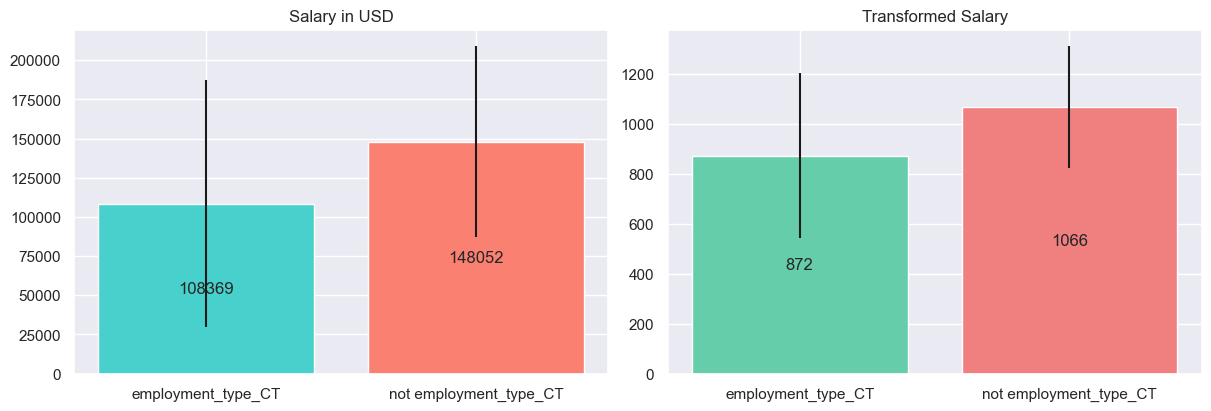

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FL                                                    
0                         148045  61039  14457               1066  244
1                          48646  26666      7                582  169

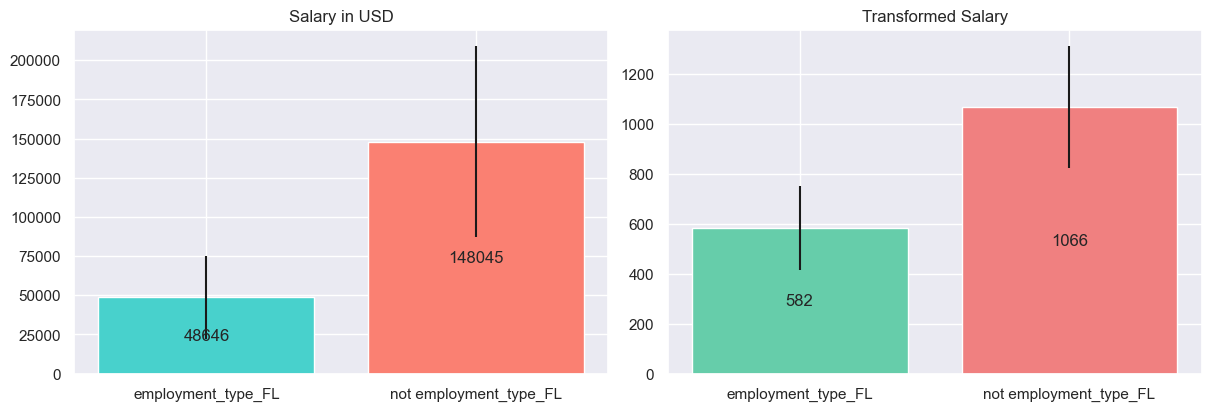

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FT                                                    
0                          83154  66056     47                748  308
1                         148208  60938  14417               1067  244

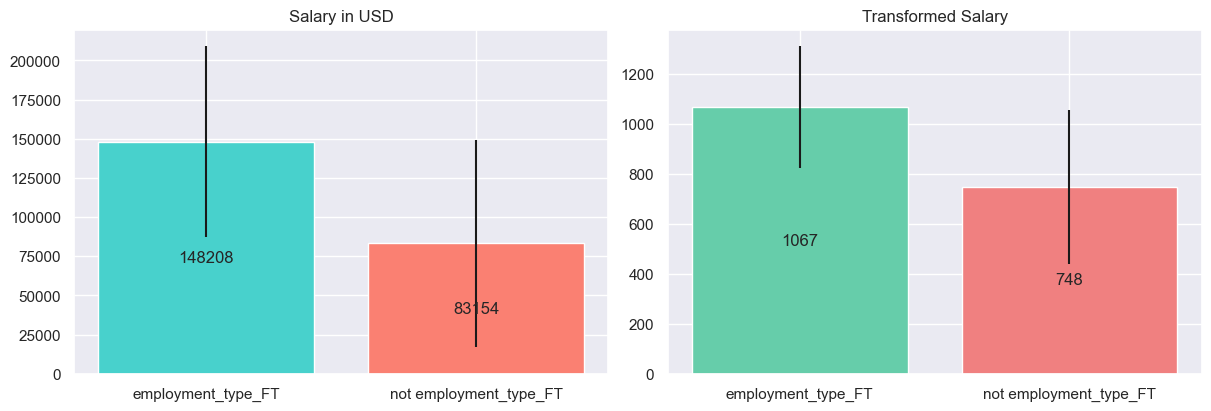

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_PT                                                    
0                         148105  61008  14444               1066  244
1                          70016  53192     20                683  283

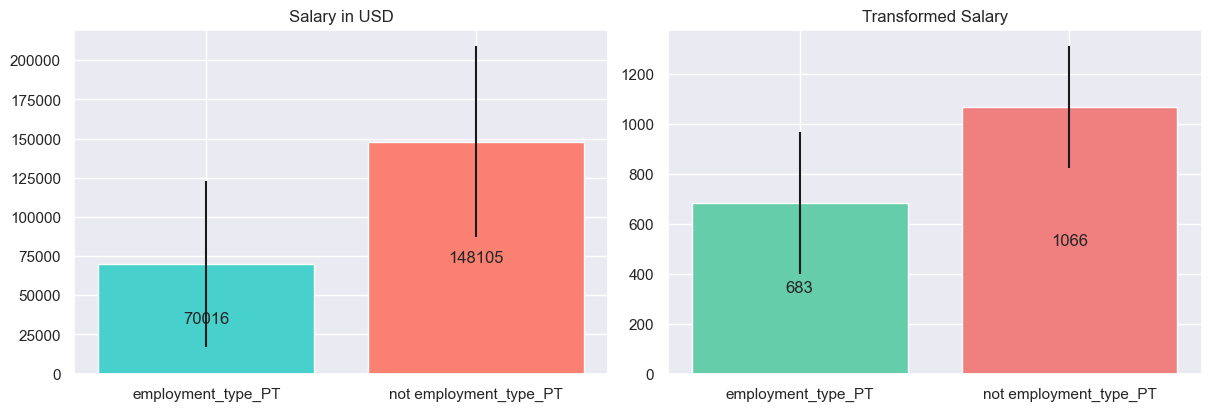

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_AUD                                                    
0                          148049  61055  14453               1066  244
1                           79662  27474     11                771  144

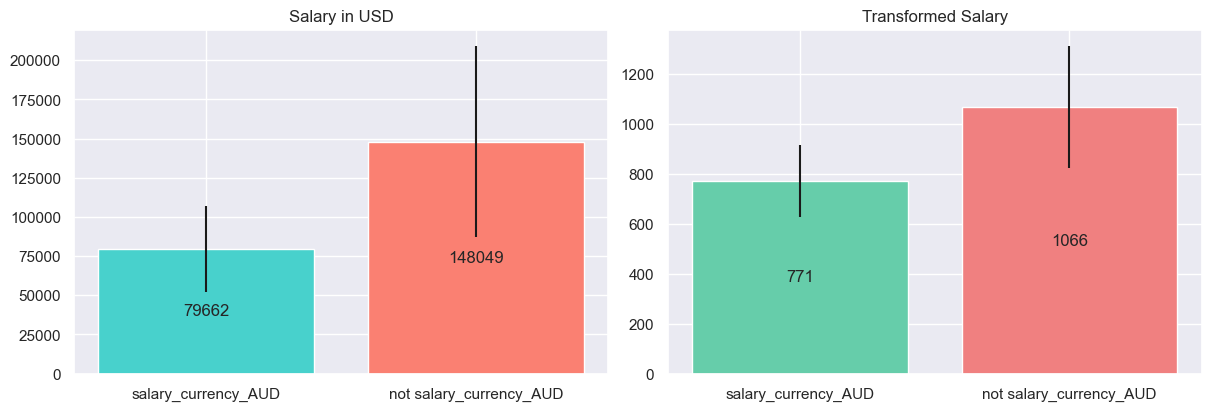

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CAD                                                    
0                          148130  61051  14416               1066  244
1                          108122  52213     48                898  223

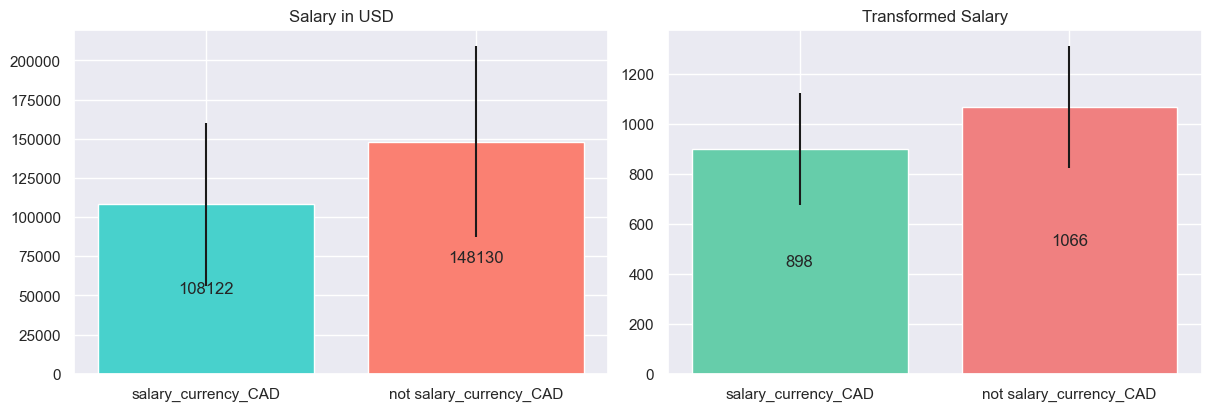

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CHF                                                    
0                          148003  61057  14456               1066  244
1                          137187  79146      8               1017  286

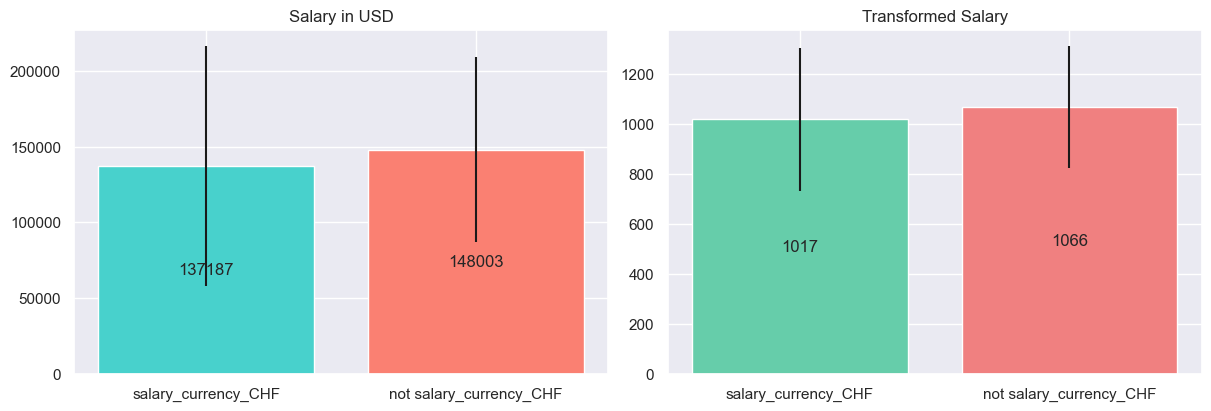

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_EUR                                                    
0                          150331  60019  14072               1077  237
1                           64213  32615    392                678  170

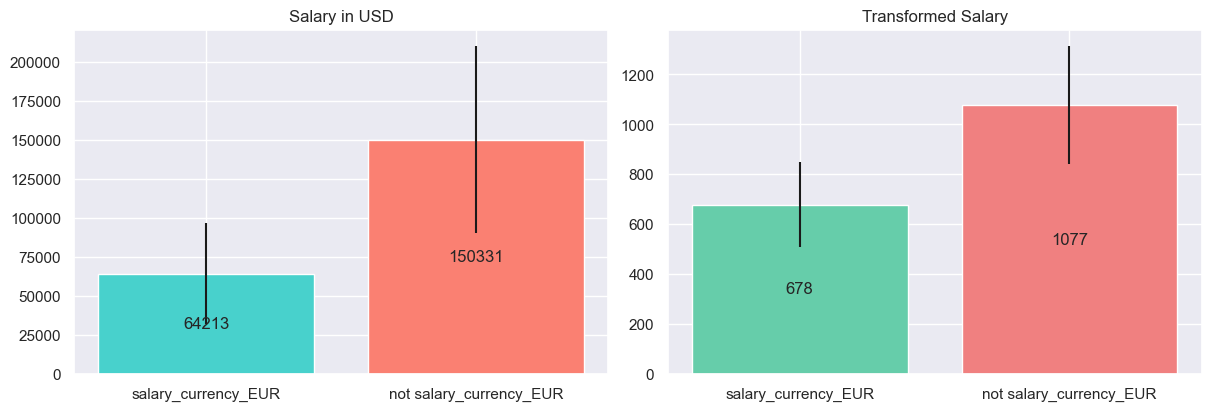

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_GBP                                                    
0                          150790  60213  13911               1078  239
1                           77719  34586    553                755  172

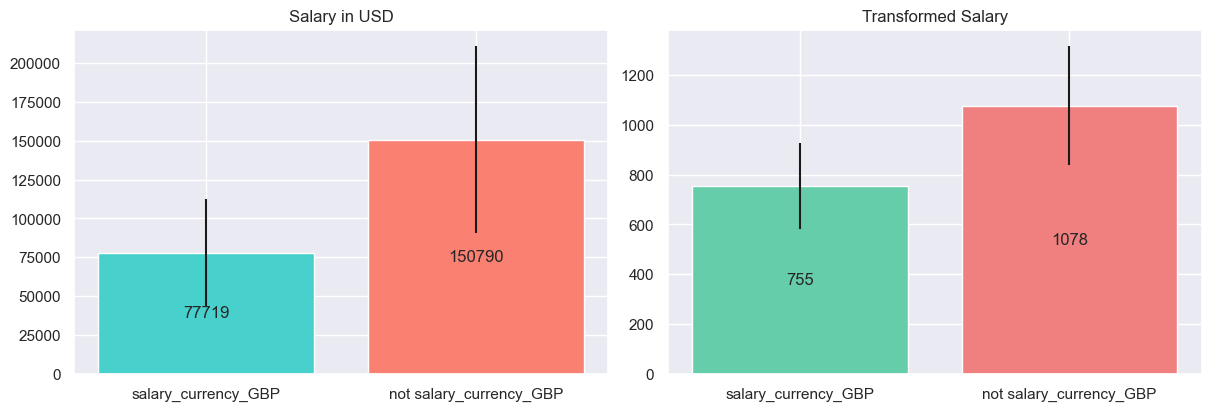

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_INR                                                    
0                          148385  60795  14415               1068  242
1                           33910  19277     49                478  136

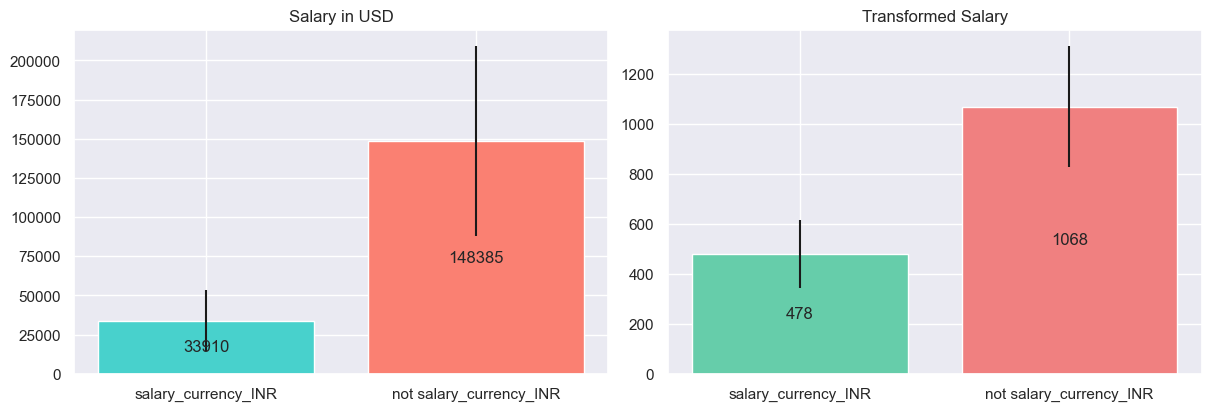

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_PLN                                                    
0                          148043  61035  14458               1066  244
1                           36295  11609      6                506   93

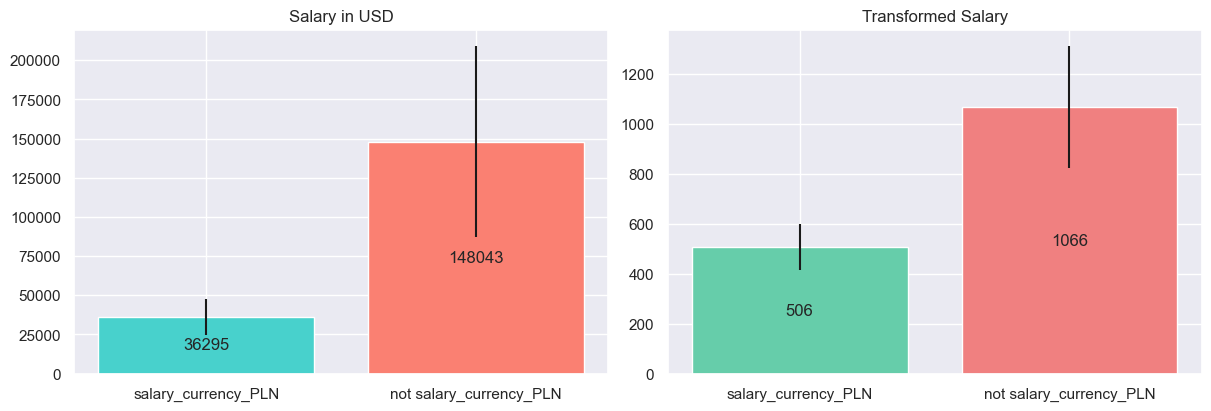

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_USD                                                    
0                           72346  37411   1067                721  189
1                          154022  58502  13397               1093  227

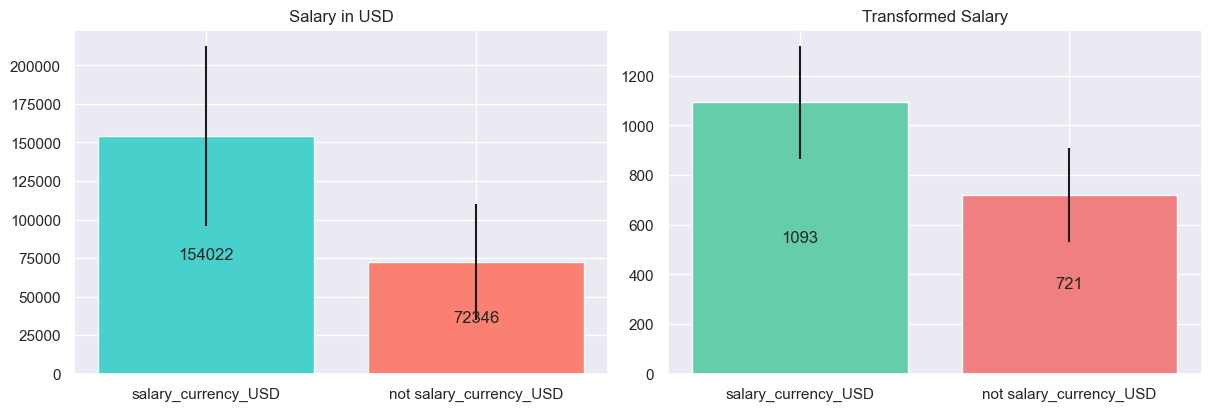

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AR                                                    
0                            148062  61041  14453               1066  244
1                             62272  18504     11                678  111

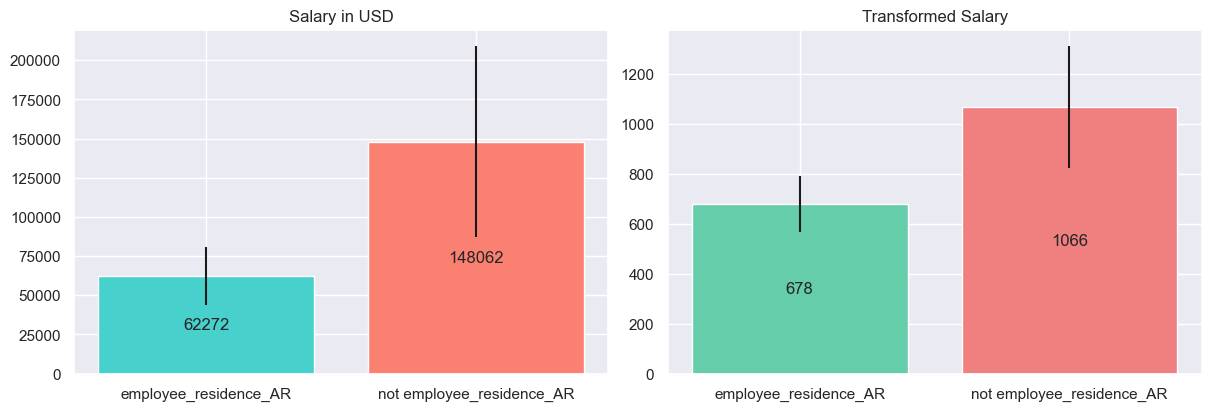

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AT                                                    
0                            148052  61049  14454               1066  244
1                             68378  15101     10                716   85

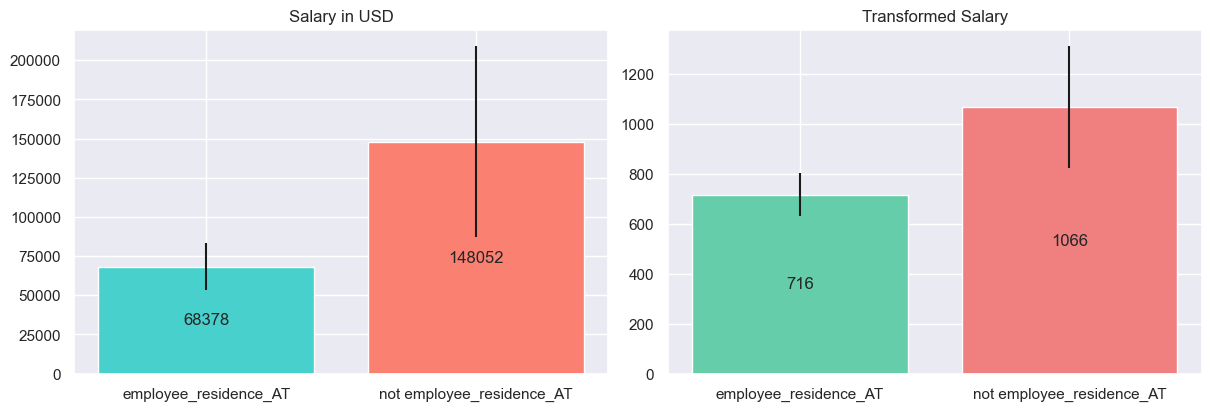

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AU                                                    
0                            148037  61020  14416               1066  244
1                            135952  73275     48               1006  293

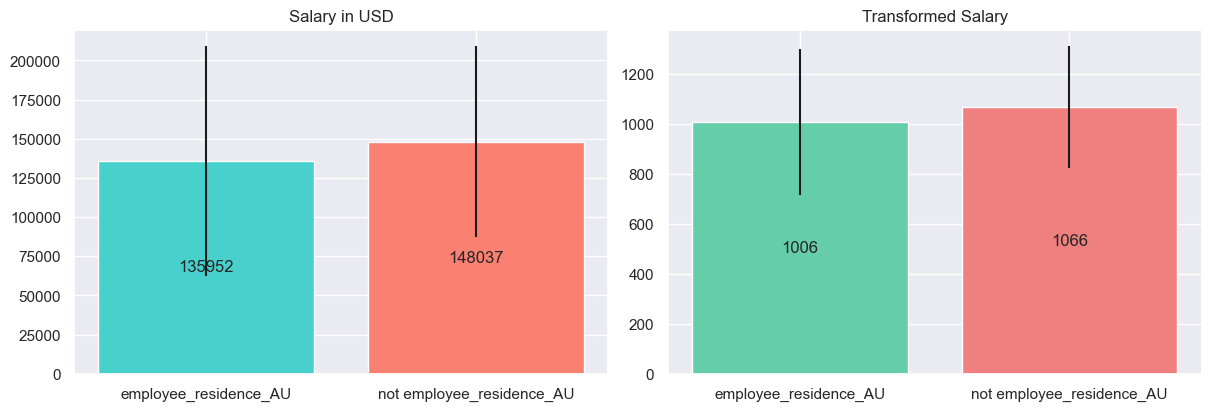

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_BR                                                    
0                            148099  61029  14445               1066  244
1                             70263  33412     19                712  180

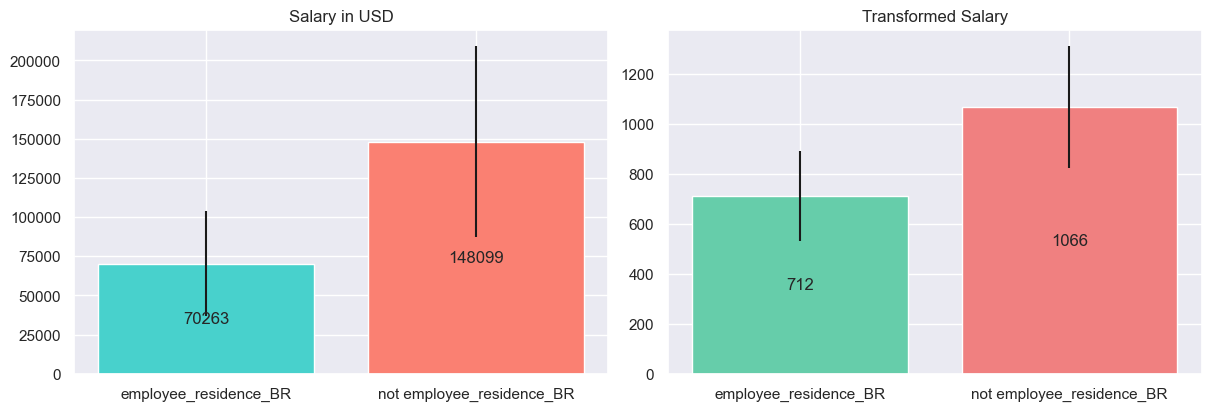

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CA                                                    
0                            148100  61133  14083               1066  245
1                            144168  58471    381               1053  230

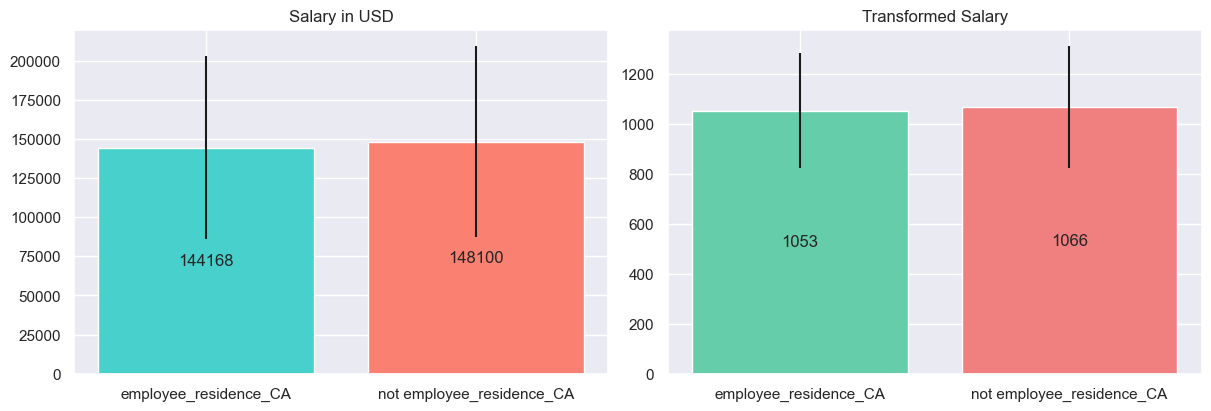

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CH                                                    
0                            148003  61057  14456               1066  244
1                            137187  79146      8               1017  286

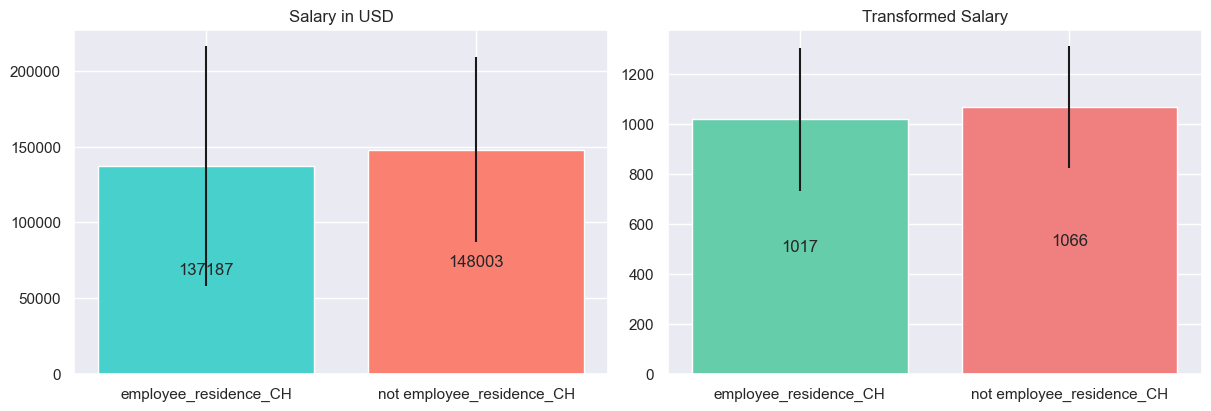

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CO                                                    
0                            148073  61049  14448               1066  244
1                             79115  30019     16                765  163

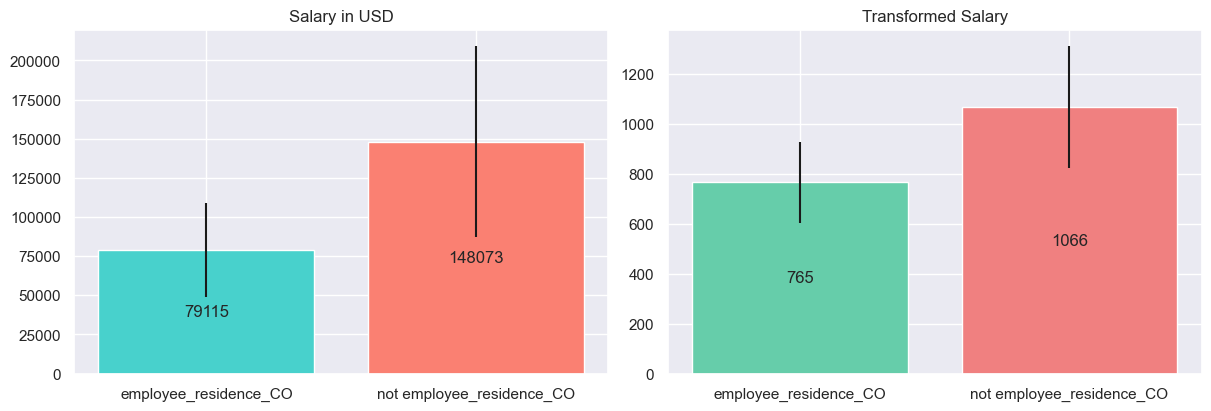

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_DE                                                    
0                            148296  60979  14377               1067  244
1                             98510  55151     87                846  245

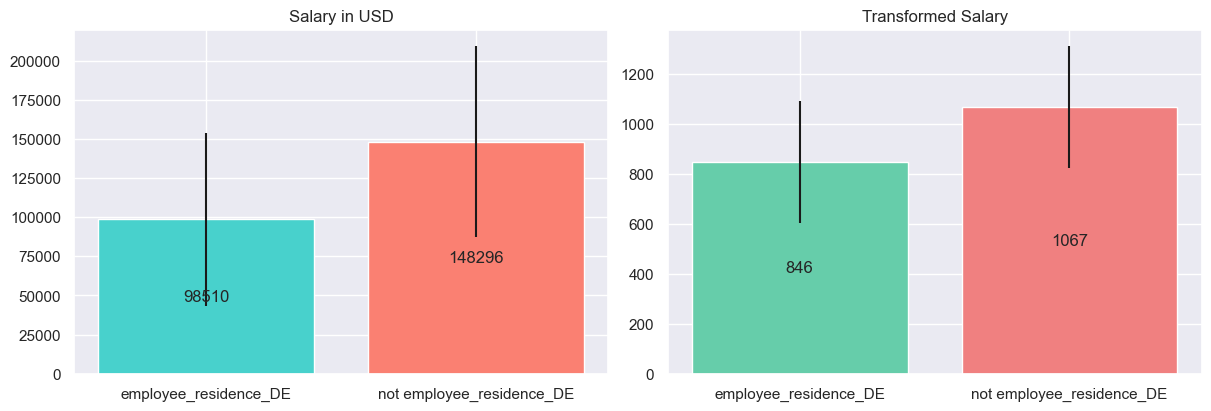

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EE                                                    
0                            148076  61021  14453               1066  244
1                             43941   8749     11                565   60

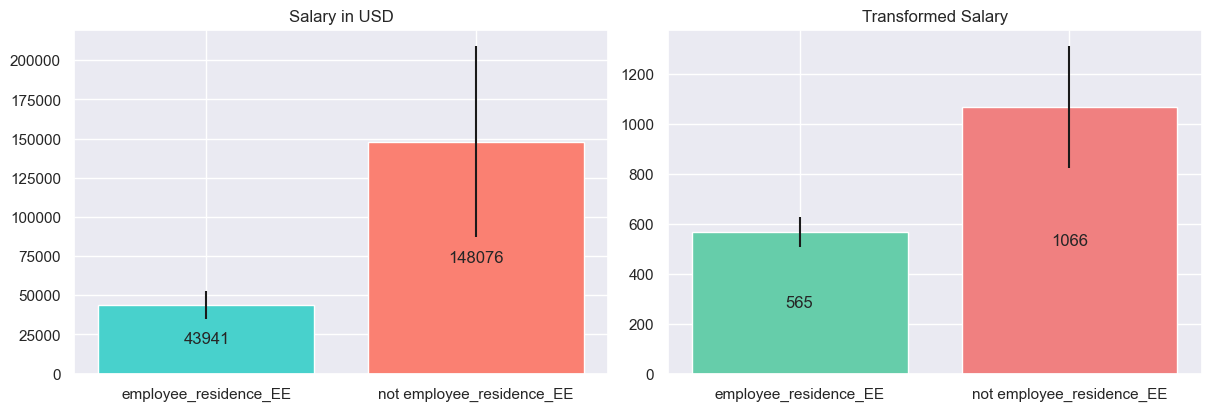

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EG                                                    
0                            148009  61057  14450               1066  244
1                            135807  70464     14               1004  305

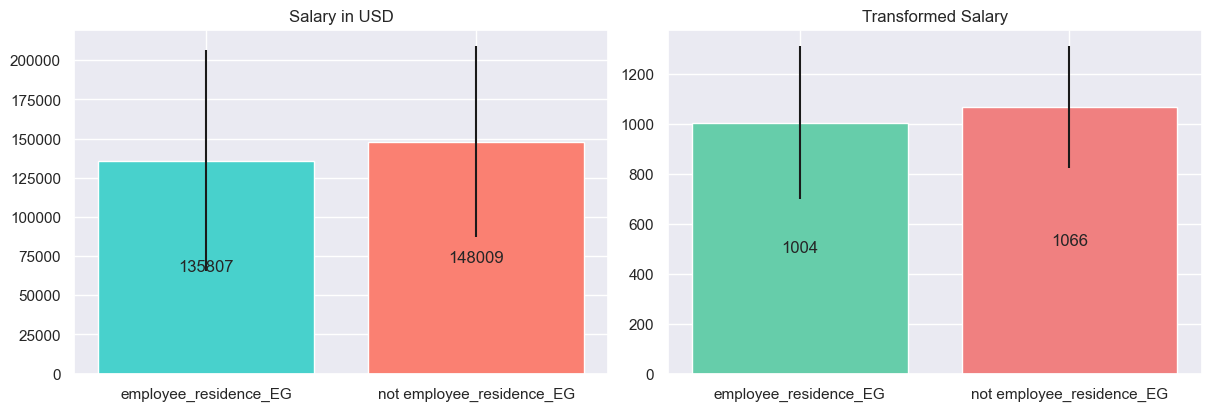

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ES                                                    
0                            148794  60649  14336               1070  242
1                             58668  36987    128                643  179

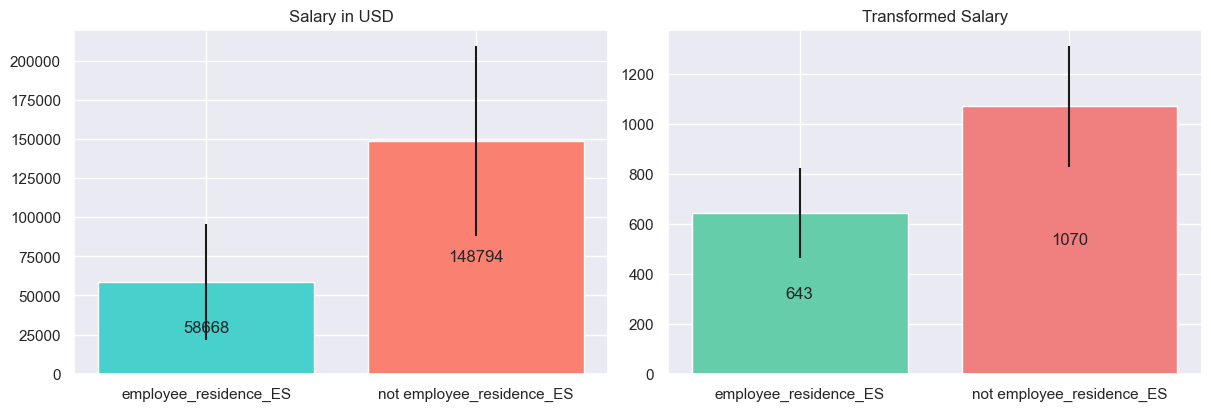

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_FR                                                    
0                            148263  60934  14401               1067  244
1                             87129  61200     63                783  266

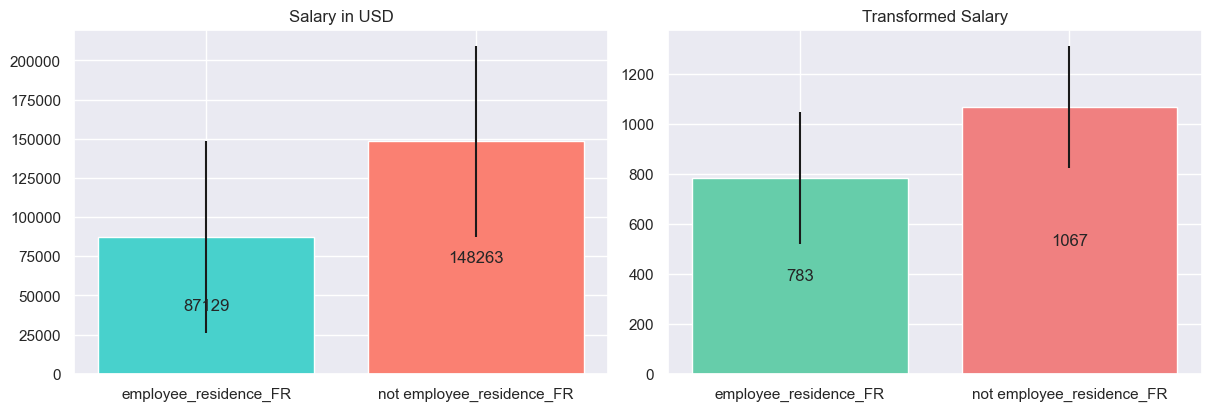

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GB                                                    
0                            150548  60324  13827               1077  239
1                             92617  49789    637                821  226

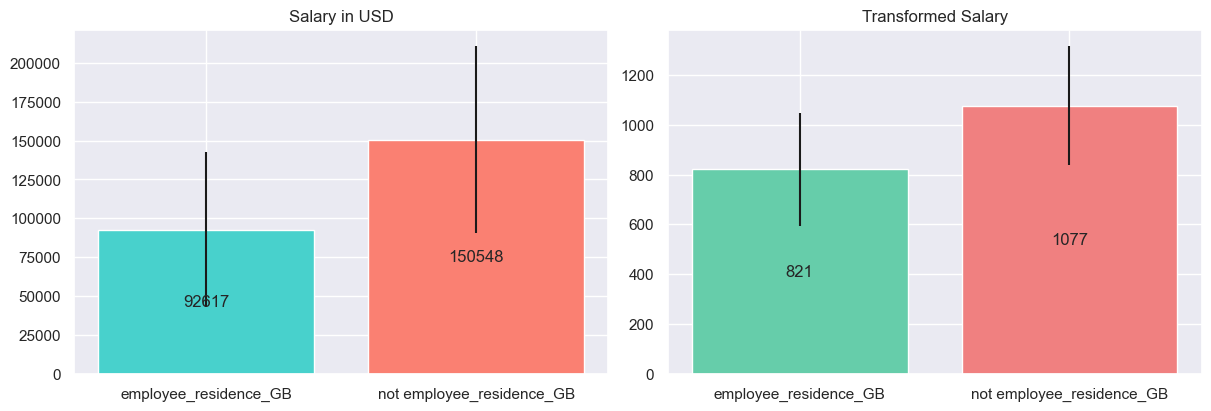

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GR                                                    
0                            148103  61011  14448               1066  244
1                             51692  21262     16                606  142

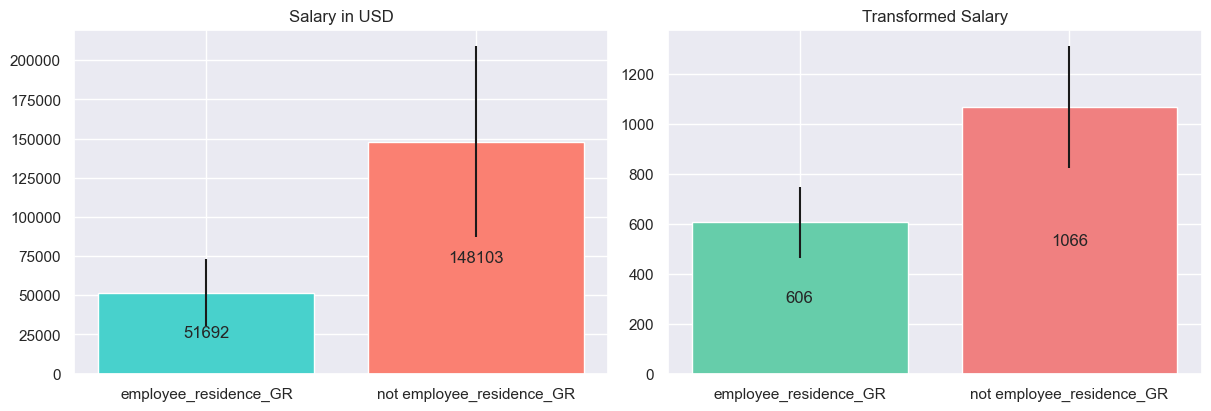

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IE                                                    
0                            148033  61071  14452               1066  245
1                            104694  33896     12                896  147

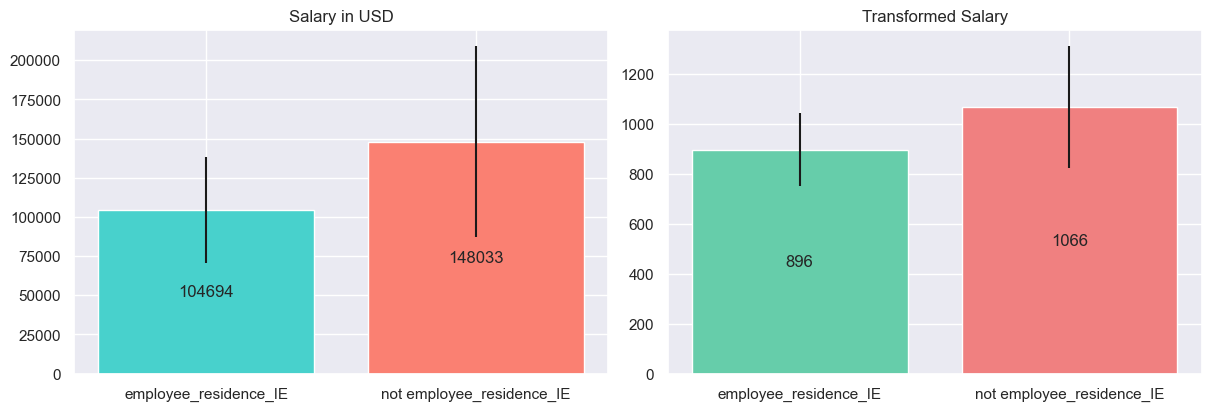

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IN                                                    
0                            148459  60763  14398               1068  242
1                             47248  39994     66                553  227

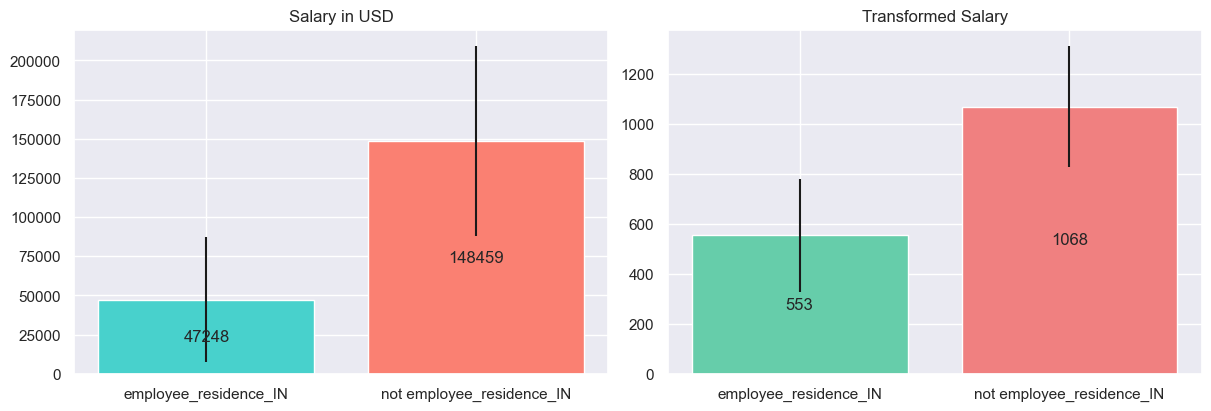

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IT                                                    
0                            148132  60996  14443               1066  244
1                             54867  30538     21                620  177

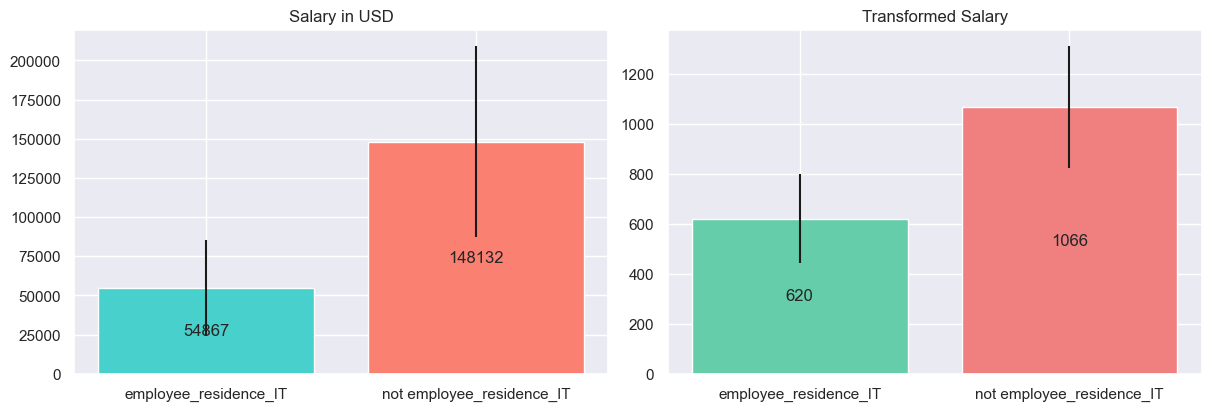

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LT                                                    
0                            148085  61035  14448               1066  244
1                             68553  29287     16                707  160

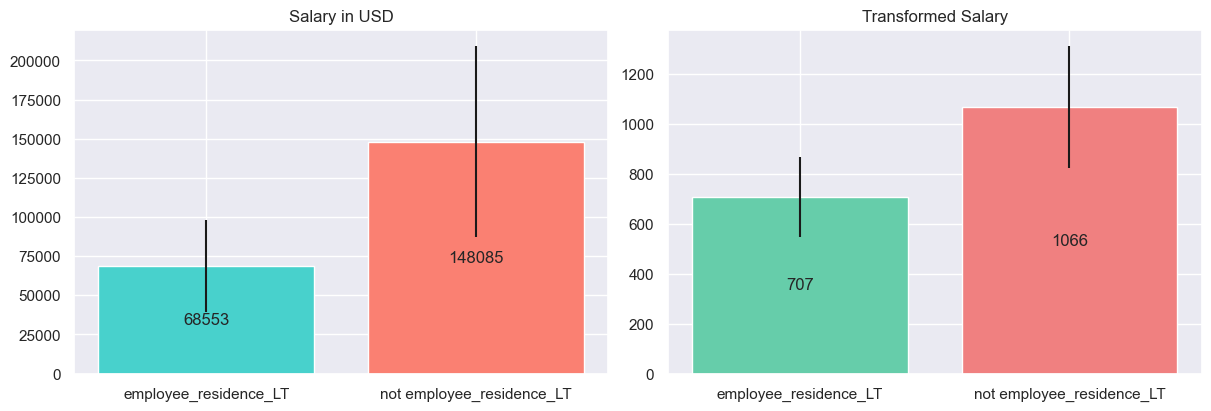

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LV                                                    
0                            148087  61023  14450               1066  244
1                             54734  19875     14                630  121

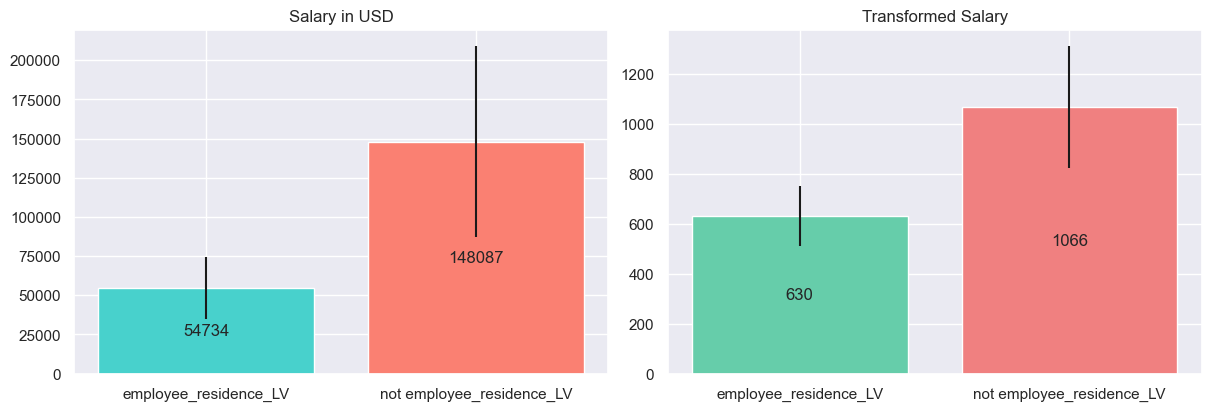

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_MX                                                    
0                            148046  61034  14452               1066  244
1                             89258  72868     12                771  347

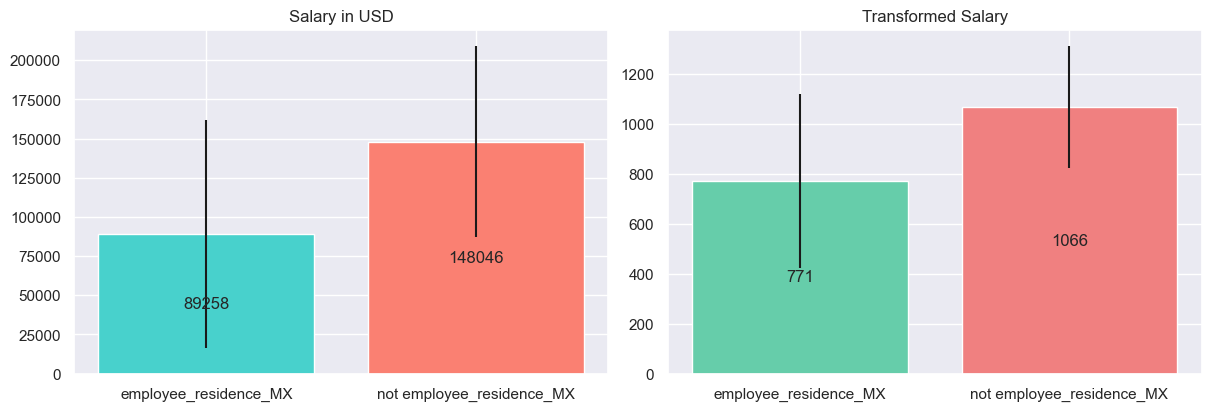

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NG                                                    
0                            148062  61022  14454               1066  244
1                             53900  53637     10                587  273

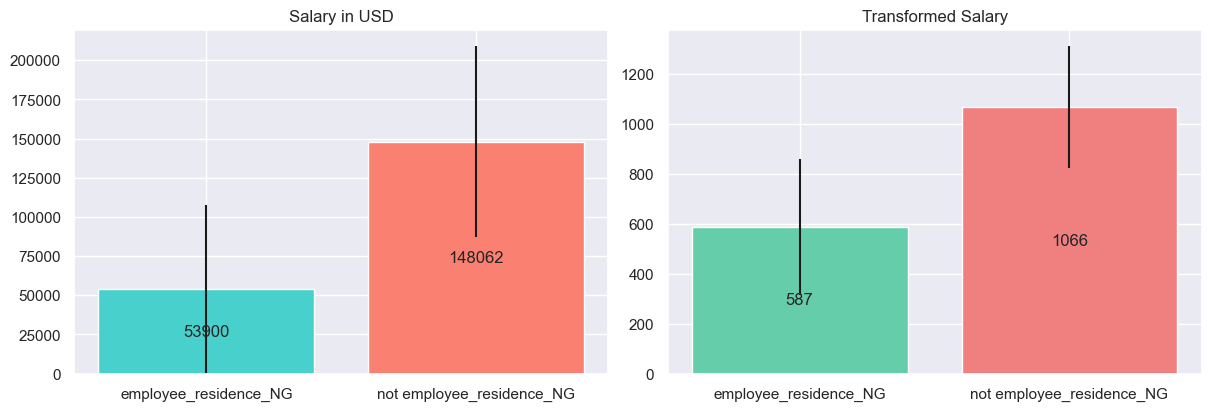

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NL                                                    
0                            148128  61035  14437               1066  244
1                             77820  28550     27                760  151

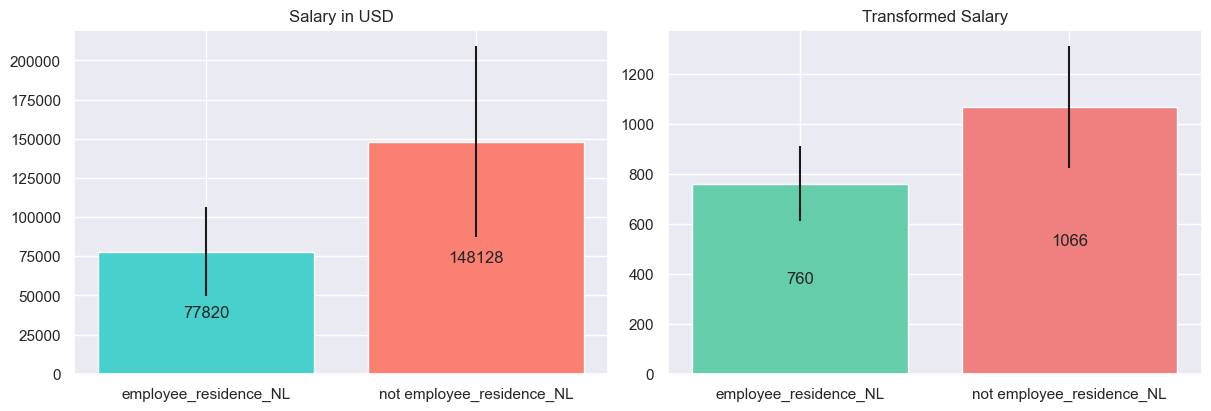

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NZ                                                    
0                            147995  61073  14459               1066  245
1                            152218  35137      5               1101  133

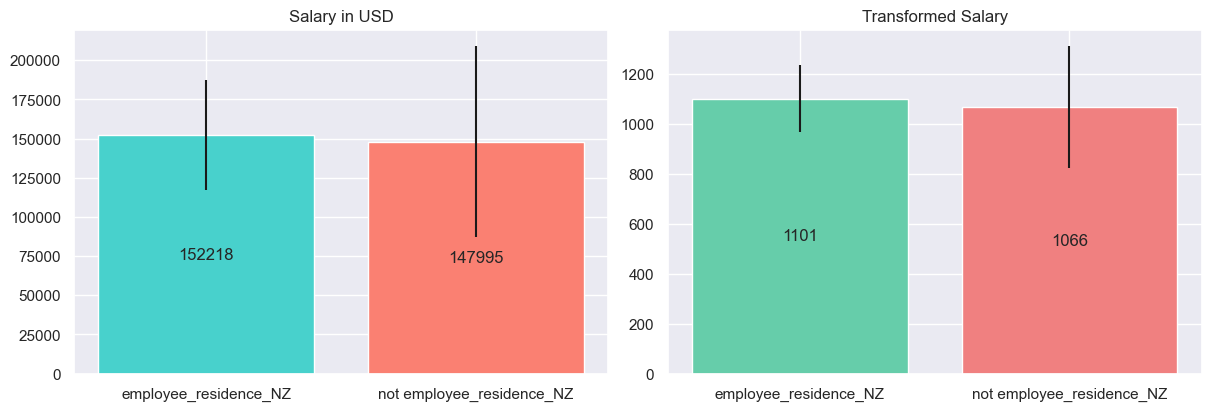

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PH                                                    
0                            148044  61041  14457               1066  244
1                             51337  24241      7                603  153

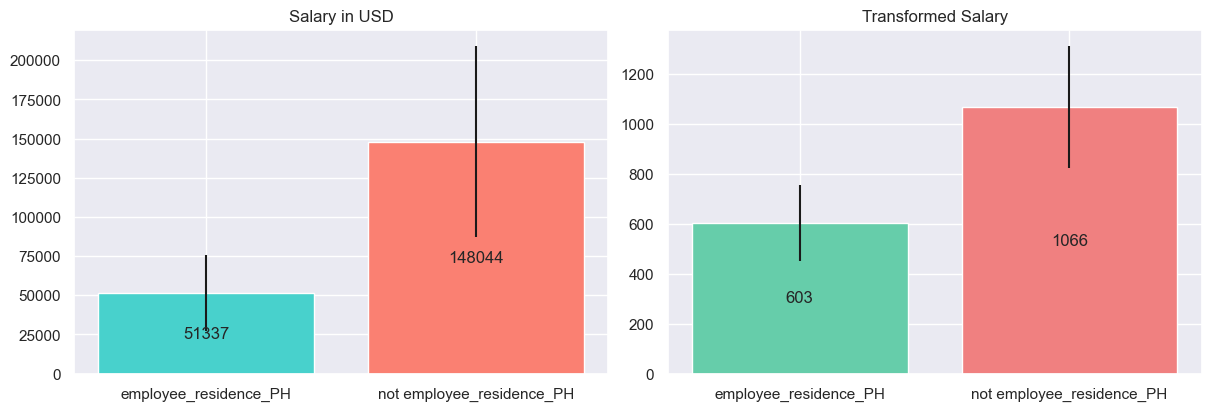

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PL                                                    
0                            148064  61035  14450               1066  244
1                             79055  54735     14                738  276

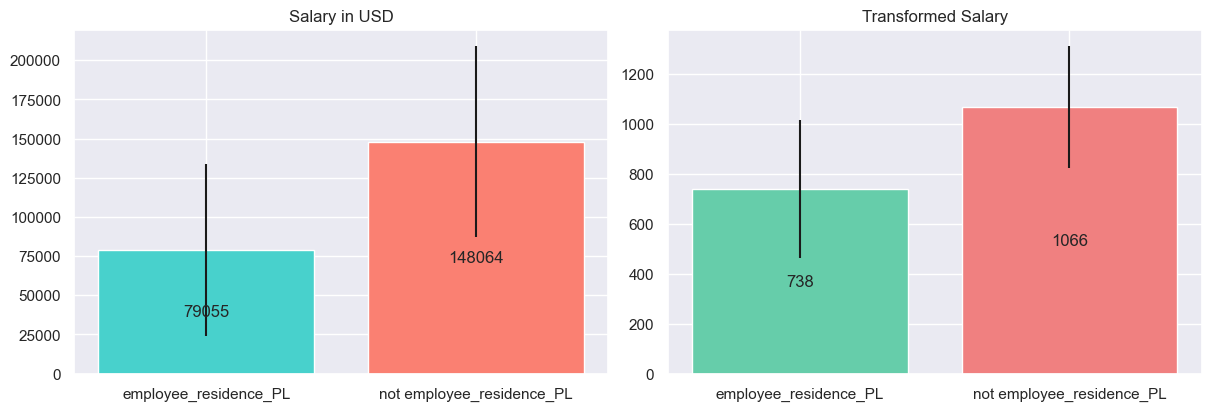

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PT                                                    
0                            148192  60965  14434               1067  244
1                             53920  28464     30                615  168

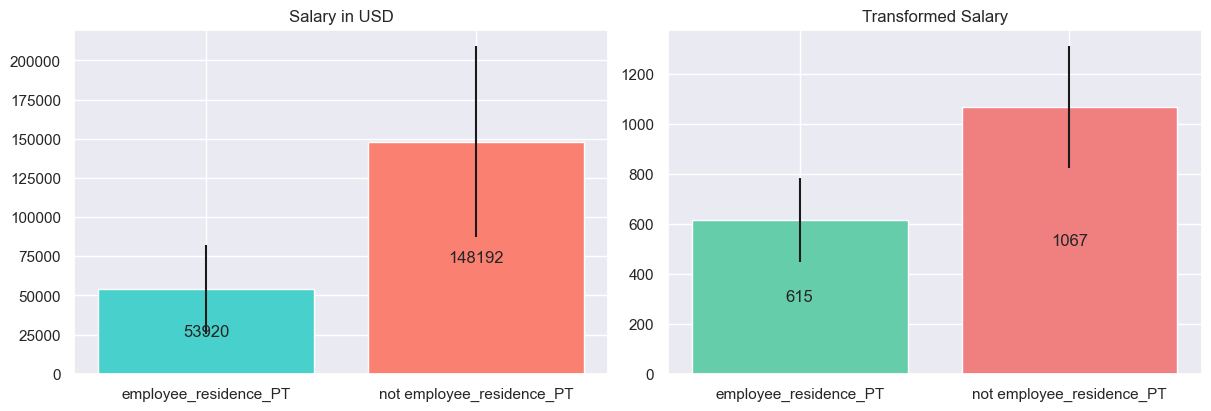

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_SI                                                    
0                            148035  61047  14458               1066  244
1                             56186  28245      6                632  170

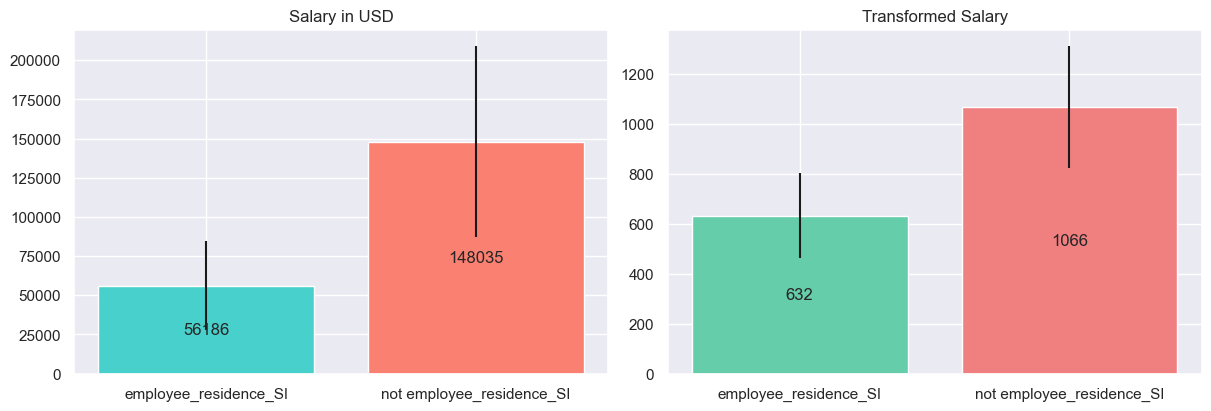

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_UA                                                    
0                            148035  61045  14453               1066  244
1                             98272  71246     11                829  317

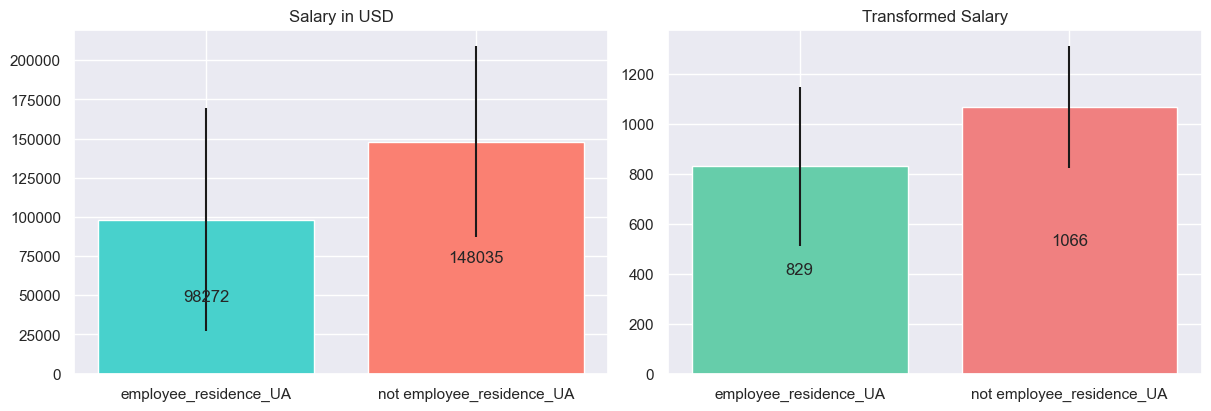

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_US                                                    
0                             97704  59171   1714                836  268
1                            154758  58087  12750               1097  224

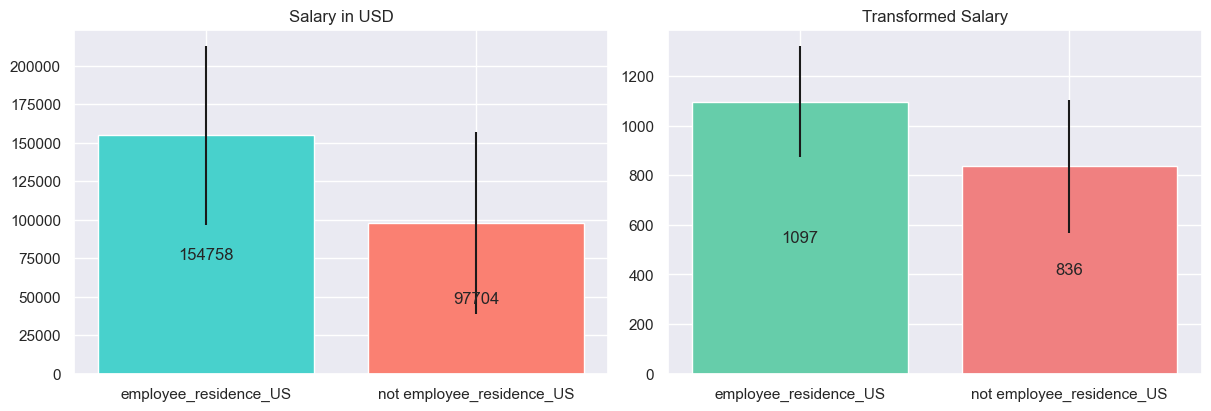

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ZA                                                    
0                            148085  61025  14450               1066  244
1                             57308  24142     14                644  136

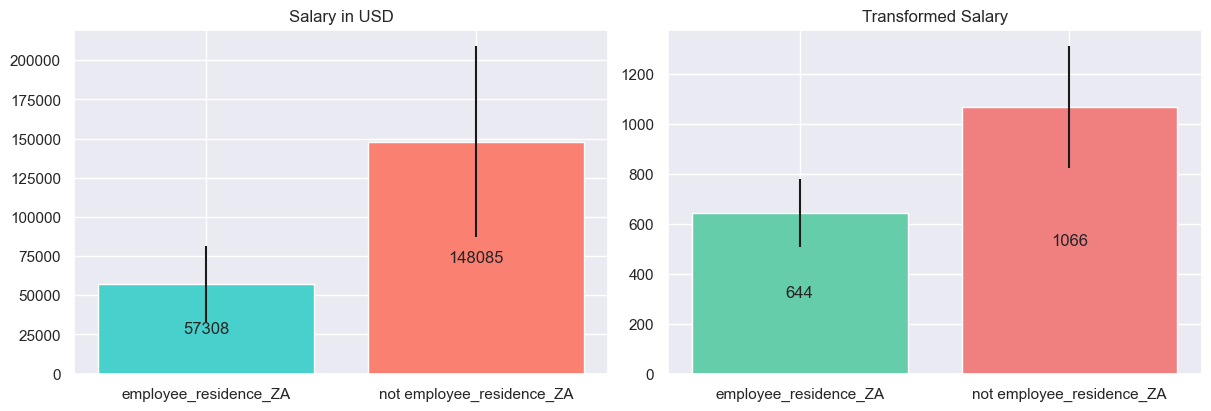

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
remote_ratio_Hybrid                                                    
0                          148884  60676  14272               1070  242
1                           82007  53449    192                757  258

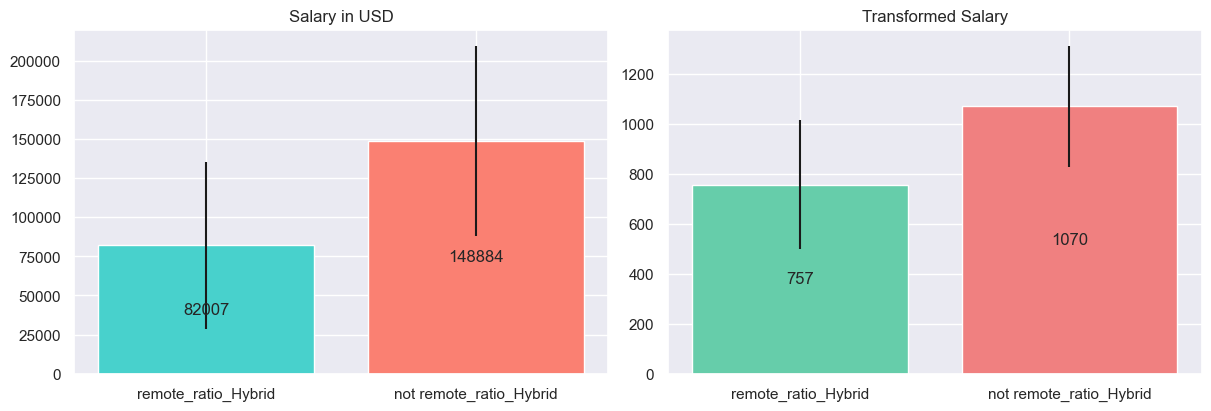

salary_in_usd              transformed_salary     
                              mean    std count               mean  std
remote_ratio_On_Site                                                   
0                           142415  58665  4806               1043  243
1                           150774  62042  9658               1077  244

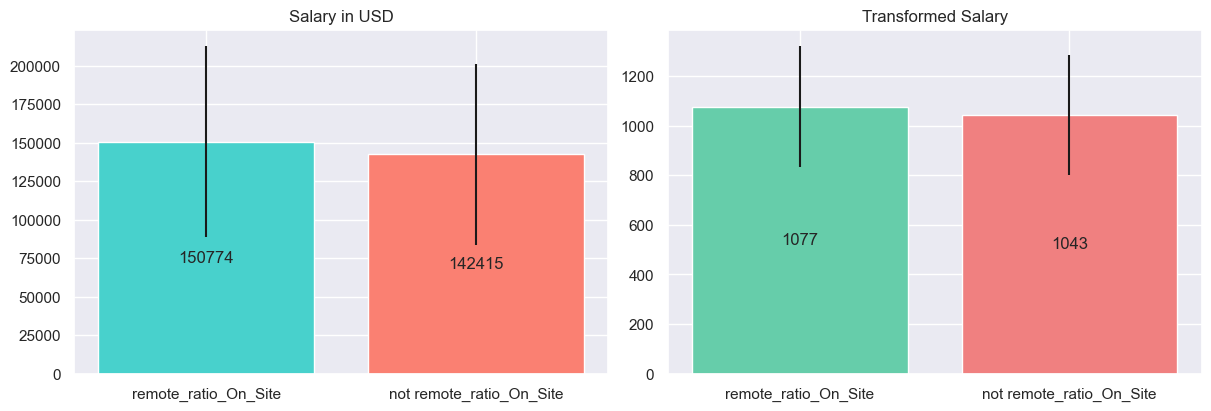

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
remote_ratio_Remote                                                   
0                          149434  62609  9850               1071  249
1                          144929  57518  4614               1055  235

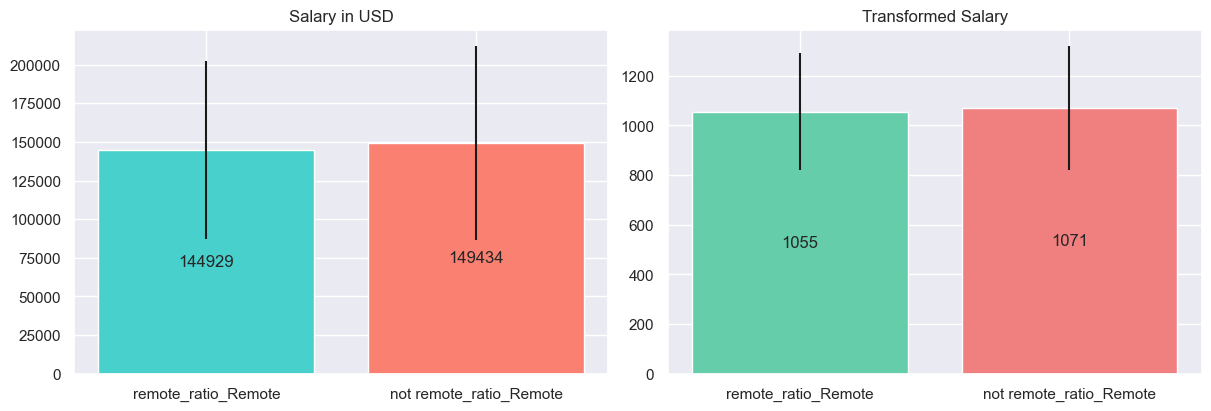

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AR                                                    
0                          148035  61055  14457               1066  244
1                           69571  17299      7                722   98

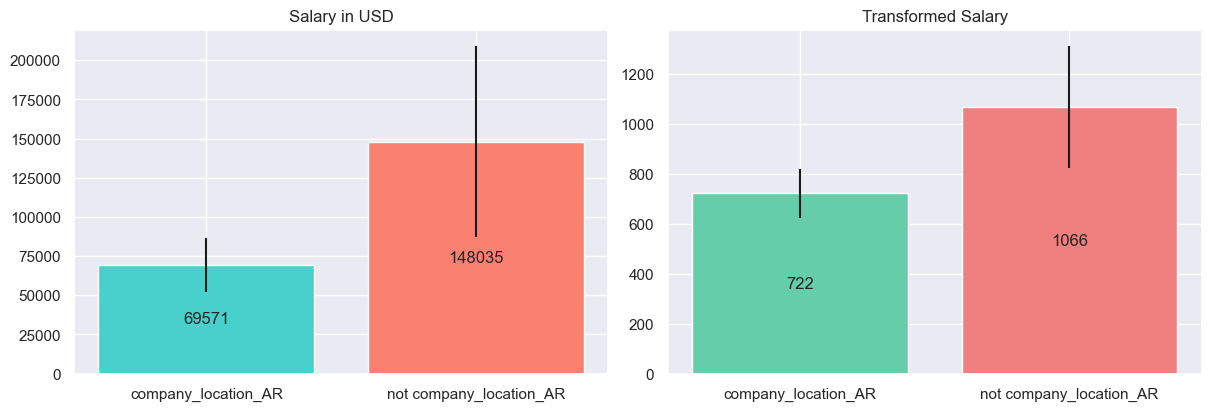

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AT                                                    
0                          148052  61050  14454               1066  244
1                           68479  15045     10                717   85

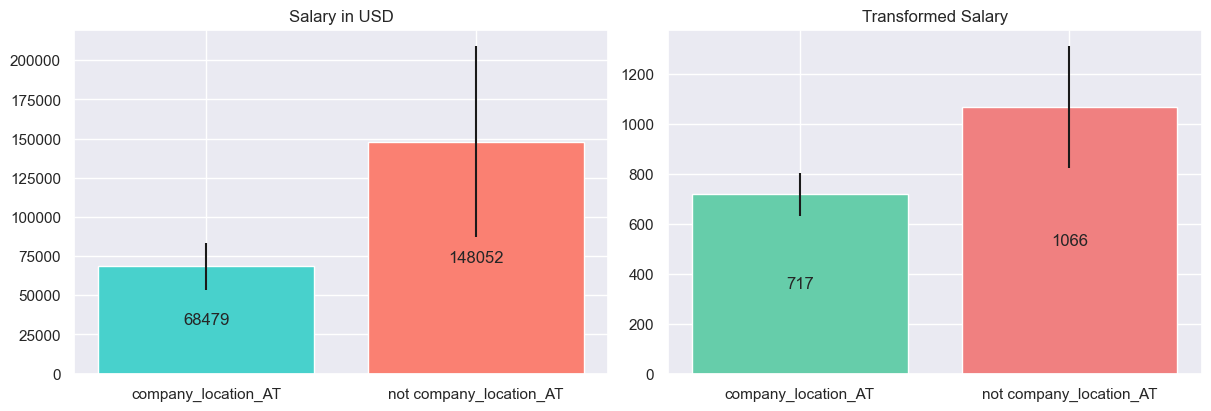

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AU                                                    
0                          148042  61018  14414               1066  244
1                          134934  72972     50               1001  294

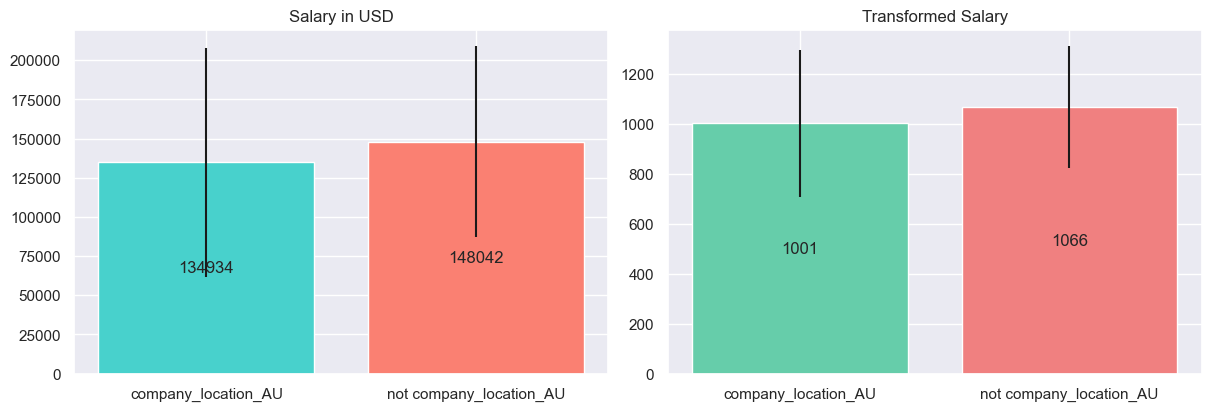

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_BR                                                    
0                          148096  61026  14447               1066  244
1                           63235  25395     17                677  149

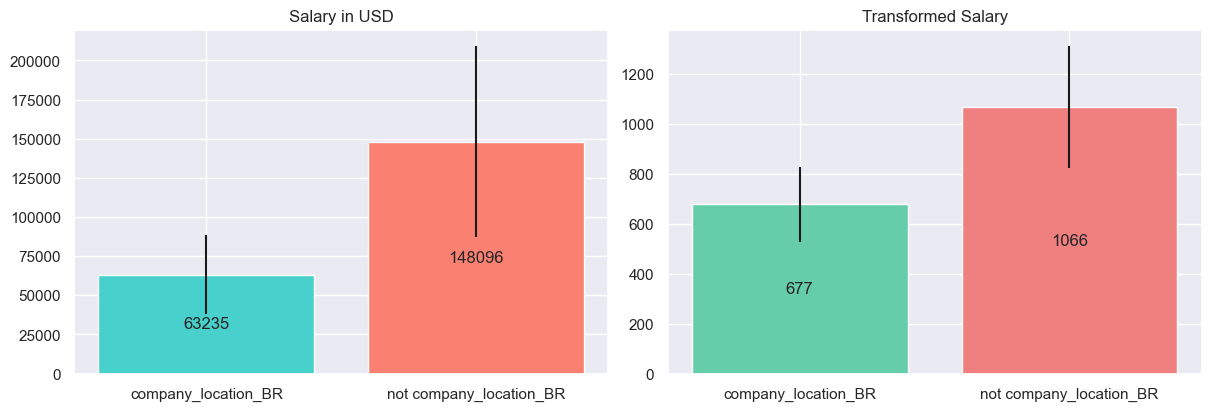

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CA                                                    
0                          148109  61118  14081               1066  245
1                          143867  59049    383               1051  234

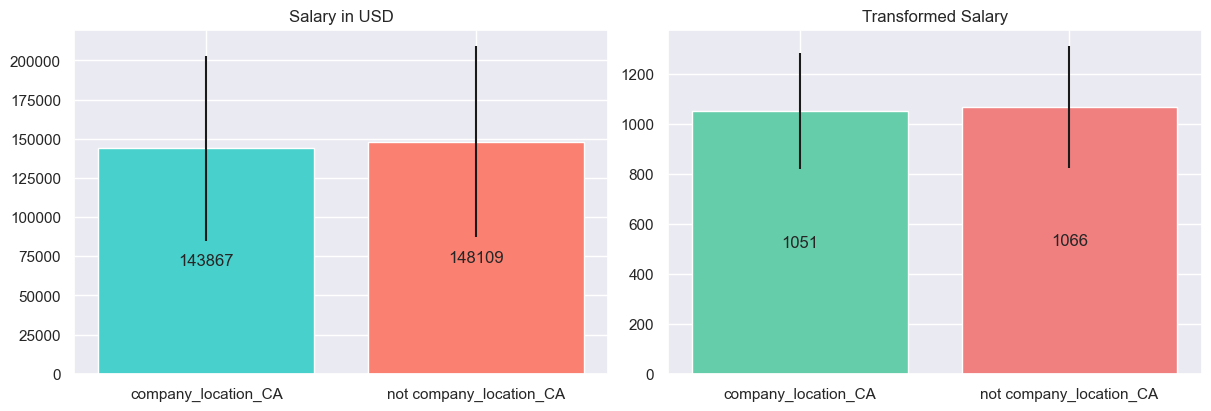

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CH                                                    
0                          148011  61050  14455               1066  244
1                          124646  83045      9                950  334

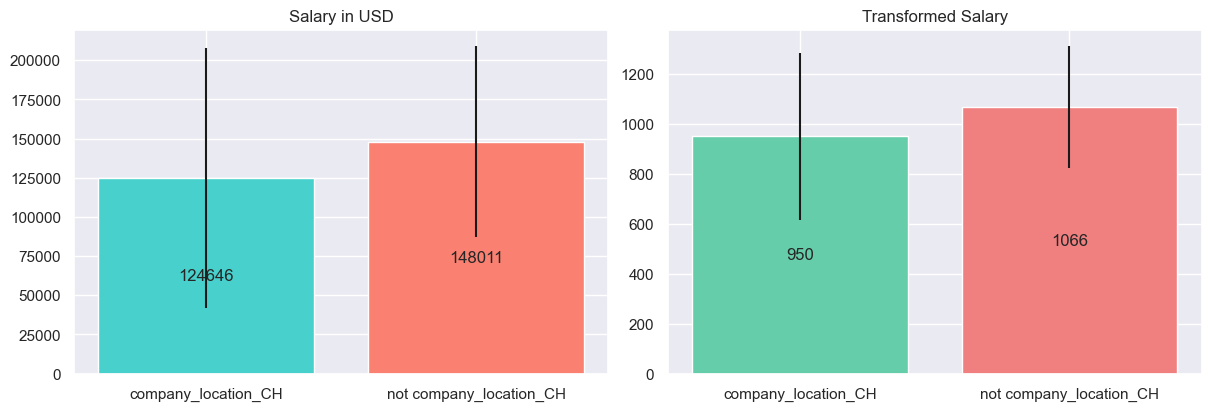

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CO                                                    
0                          148073  61049  14448               1066  244
1                           79115  30019     16                765  163

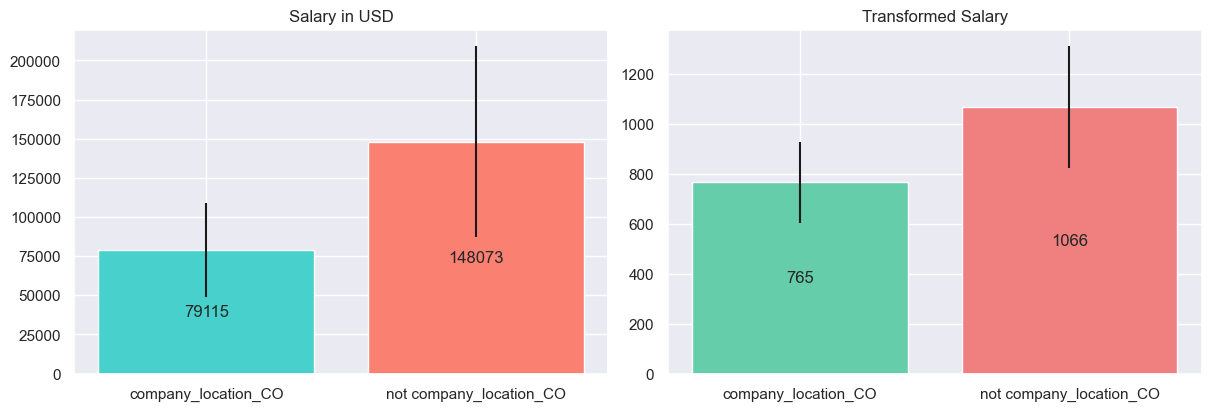

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_DE                                                    
0                          148332  60956  14373               1067  244
1                           95051  55176     91                829  247

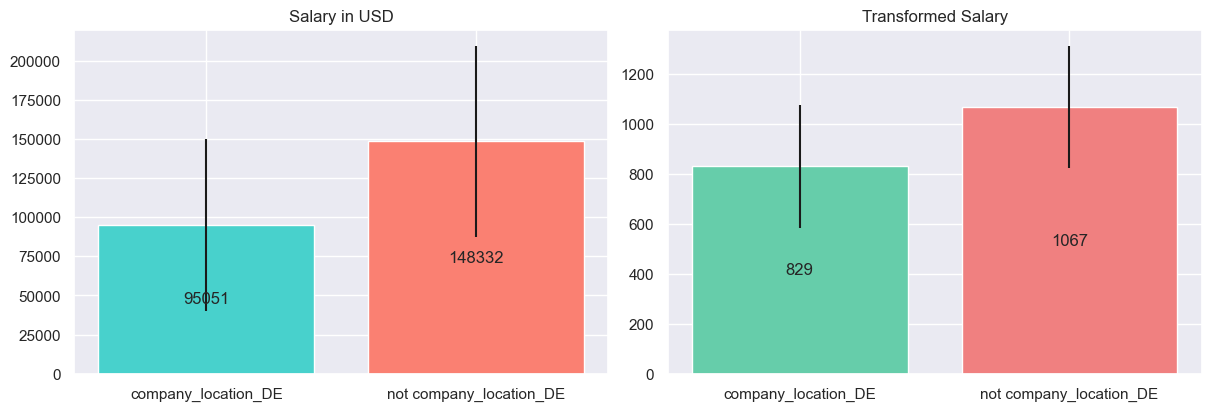

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EE                                                    
0                          148076  61021  14453               1066  244
1                           43941   8749     11                565   60

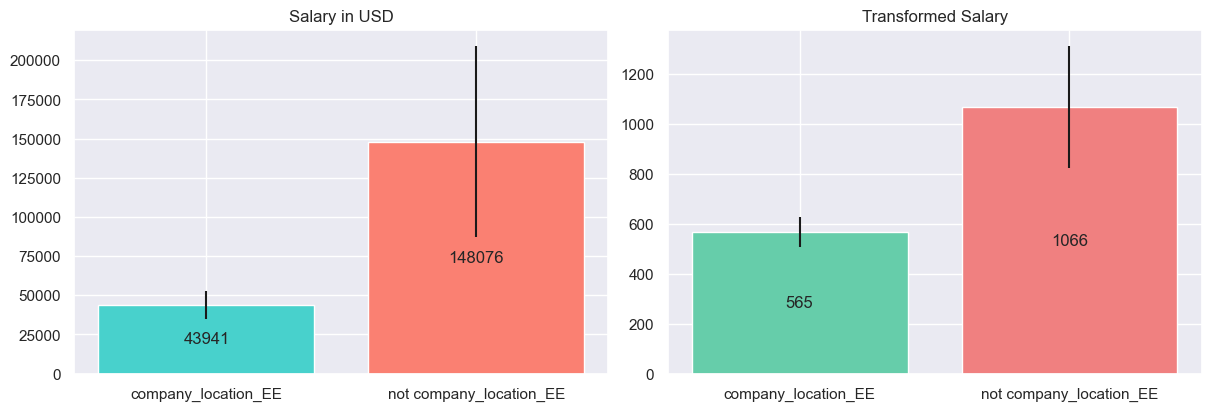

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EG                                                    
0                          148003  61059  14451               1066  244
1                          140869  70642     13               1025  306

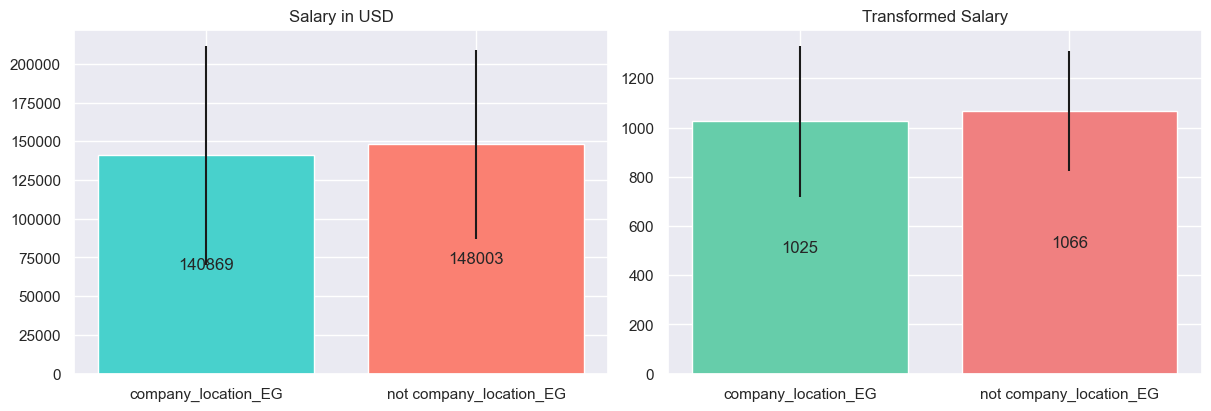

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ES                                                    
0                          148797  60645  14338               1070  242
1                           56932  34523    126                634  167

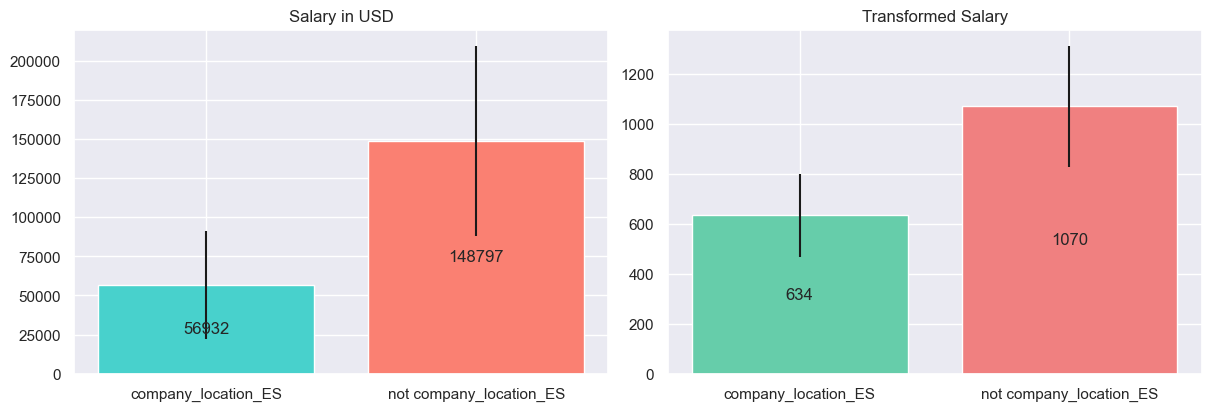

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_FR                                                    
0                          148247  60960  14406               1067  244
1                           85878  55799     58                780  254

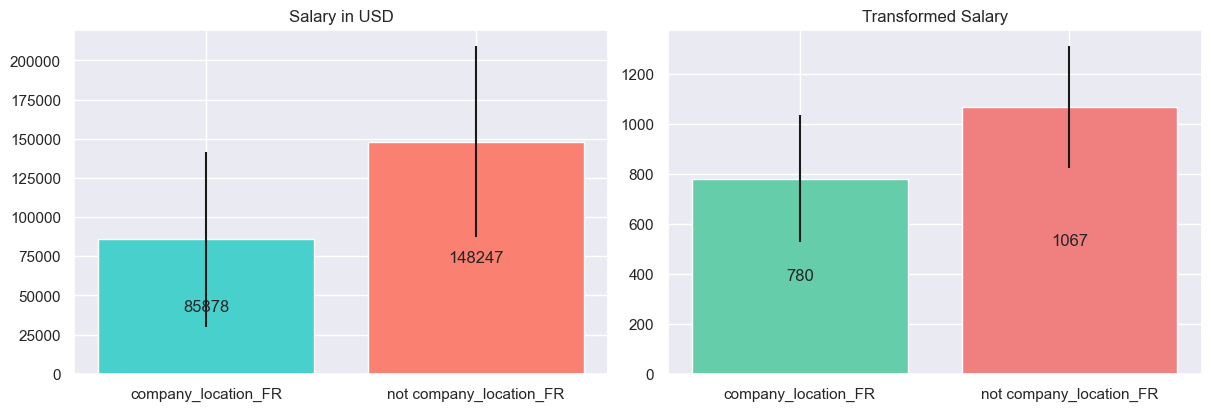

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GB                                                    
0                          150577  60313  13822               1077  239
1                           92451  49702    642                821  225

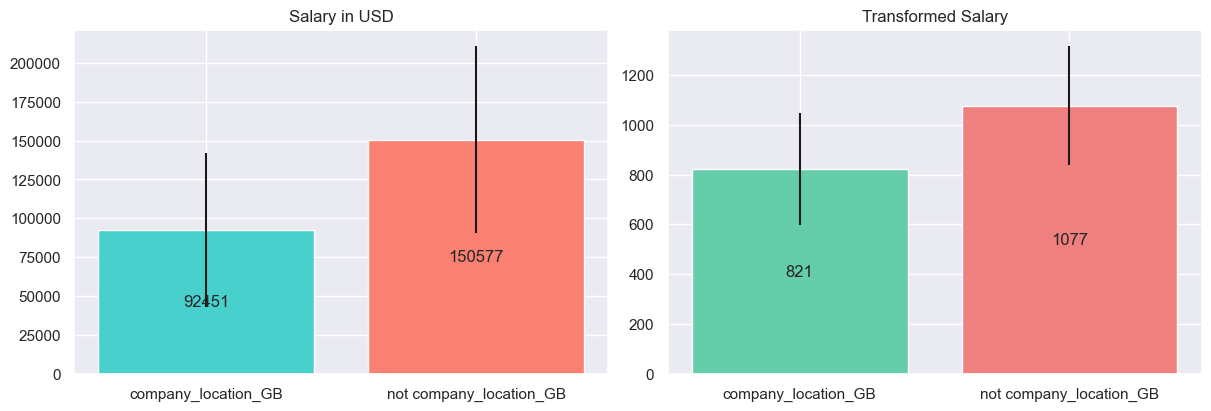

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GR                                                    
0                          148089  61019  14450               1066  244
1                           52260  21279     14                610  142

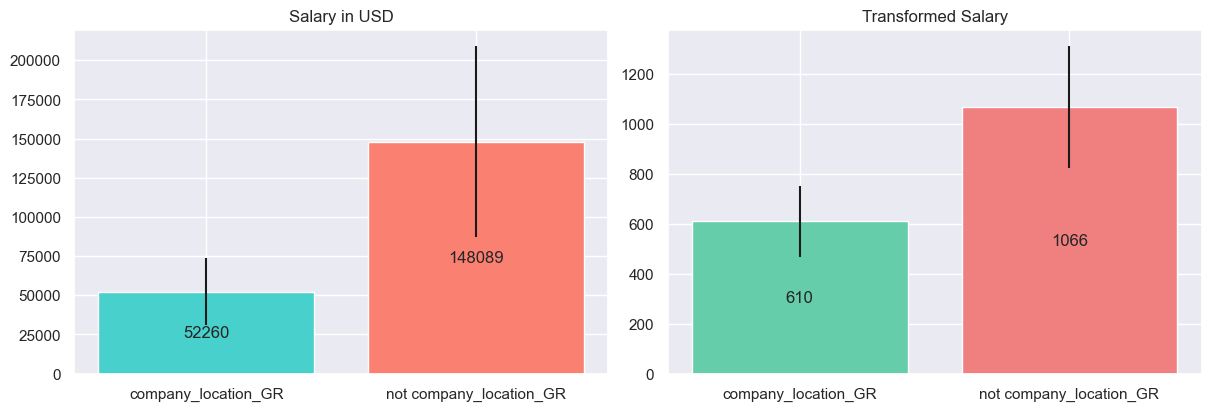

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IE                                                    
0                          148033  61071  14452               1066  245
1                          104694  33896     12                896  147

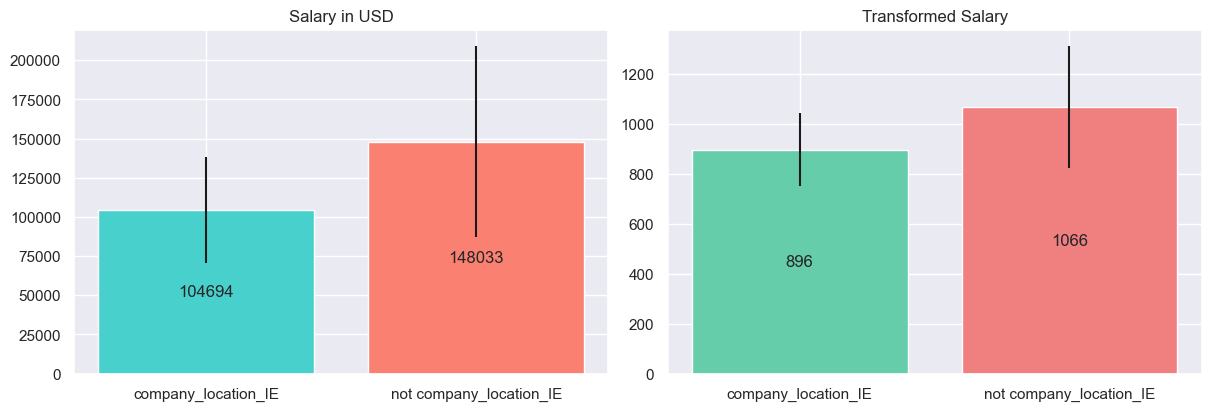

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IN                                                    
0                          148419  60778  14407               1068  242
1                           41360  34229     57                517  204

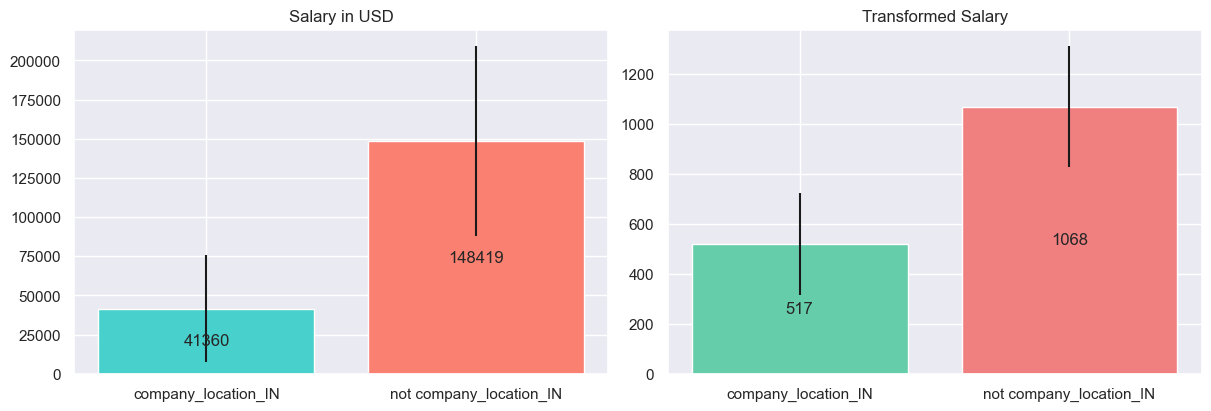

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IT                                                    
0                          148092  61016  14450               1066  244
1                           49600  18169     14                595  126

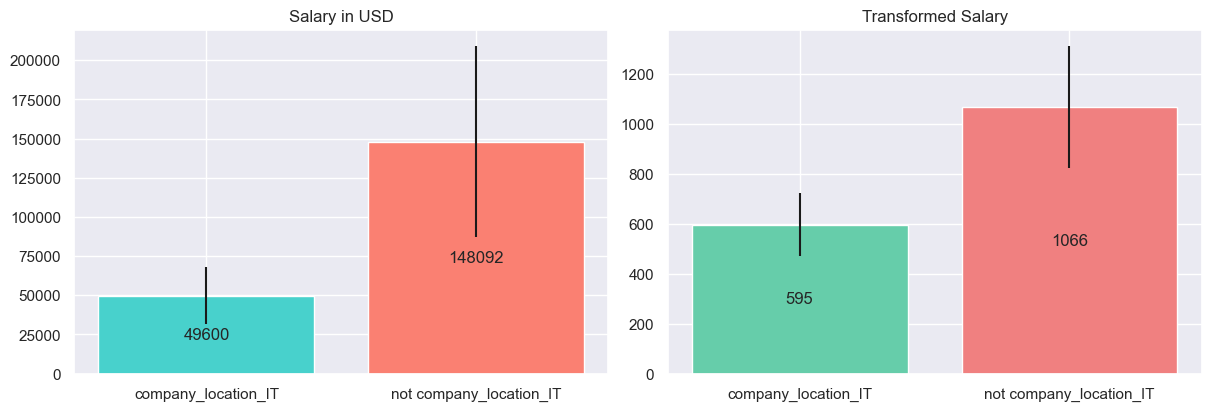

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LT                                                    
0                          148085  61035  14448               1066  244
1                           68553  29287     16                707  160

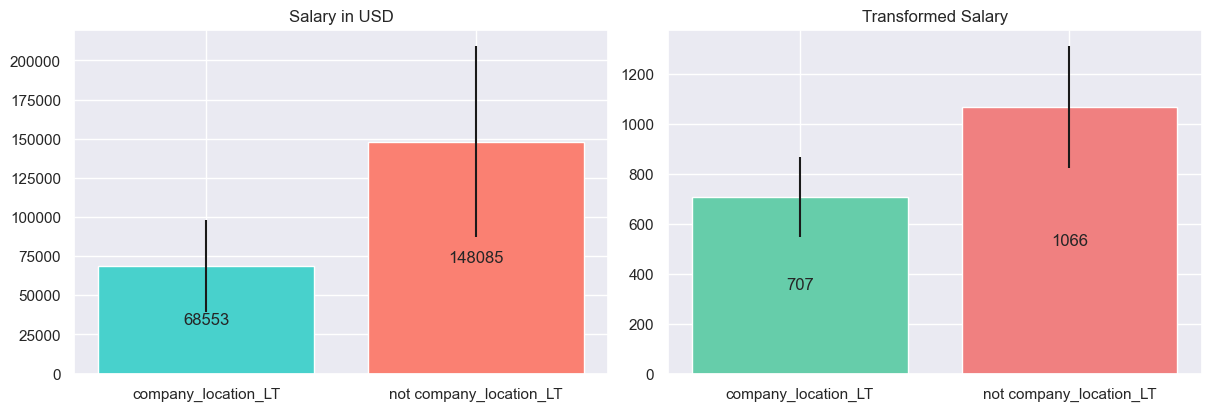

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LV                                                    
0                          148087  61023  14450               1066  244
1                           54734  19875     14                630  121

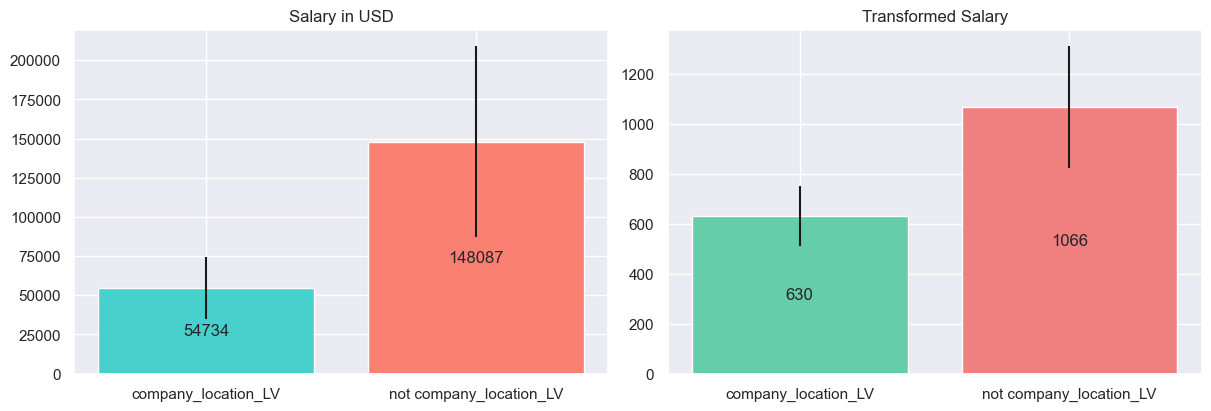

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_MX                                                    
0                          148052  61032  14451               1066  244
1                           87007  70236     13                764  334

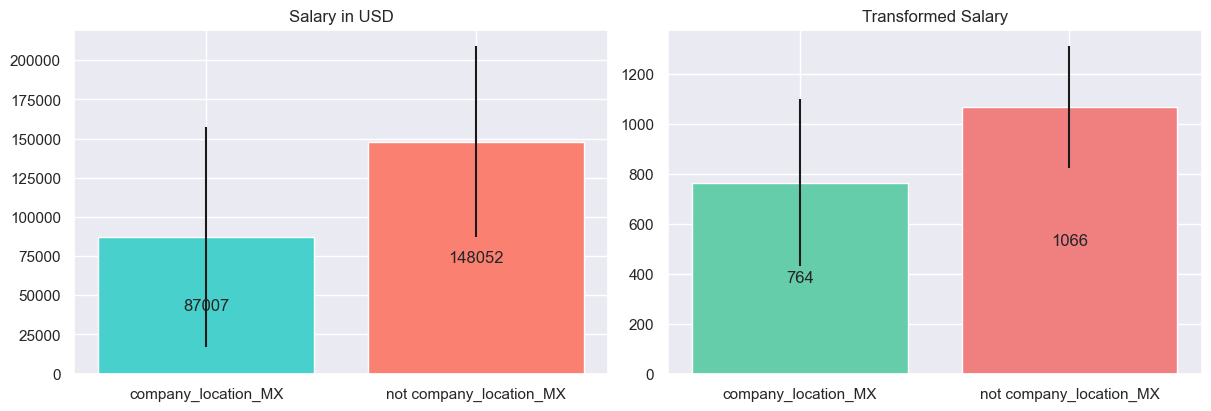

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NG                                                    
0                          148037  61040  14457               1066  244
1                           64857  61066      7                653  295

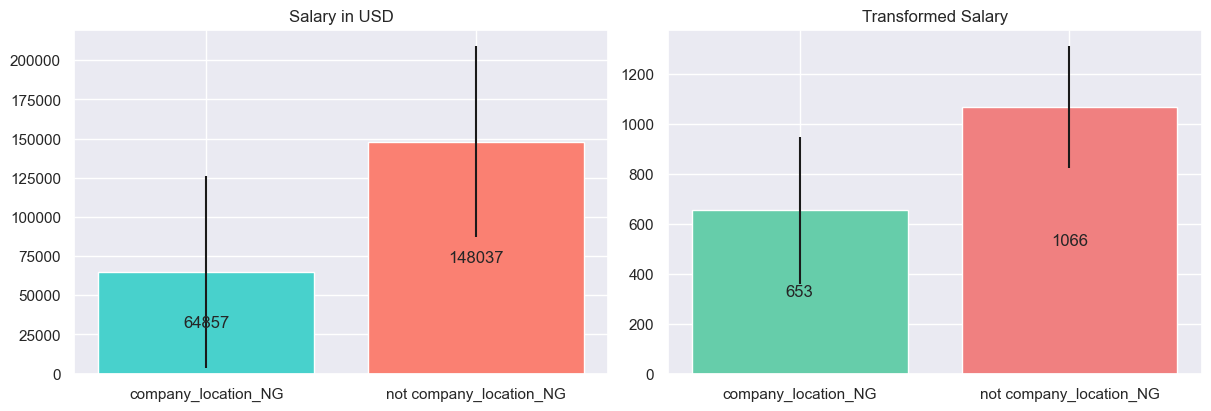

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NL                                                    
0                          148129  61032  14437               1066  244
1                           77218  30223     27                754  164

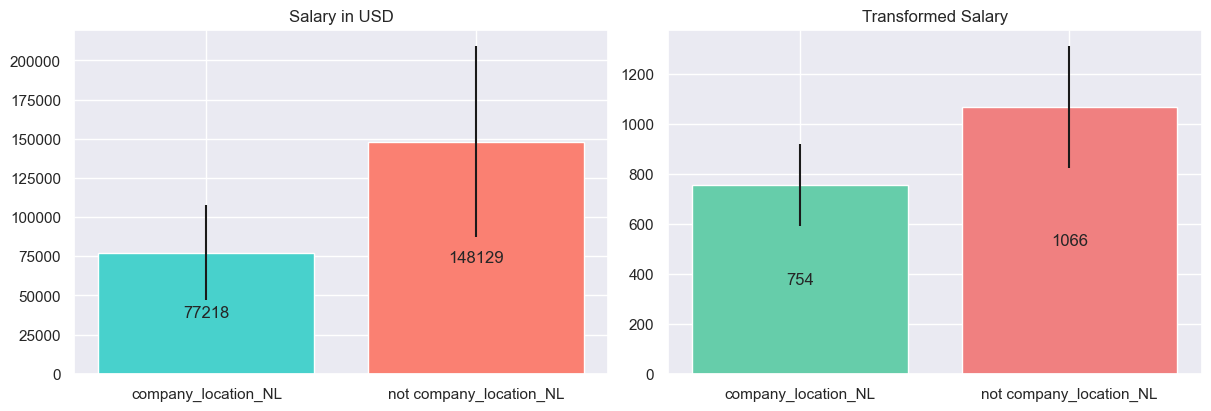

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NZ                                                    
0                          147995  61073  14459               1066  245
1                          152218  35137      5               1101  133

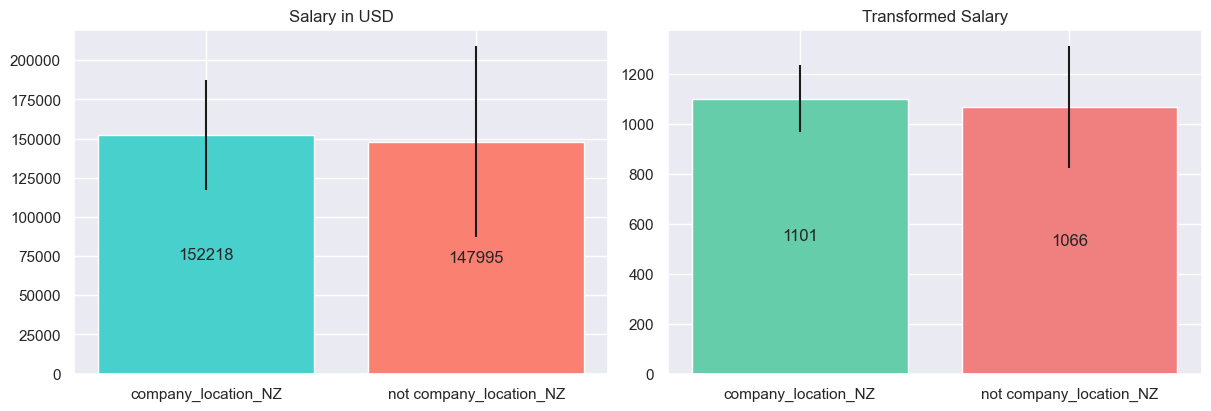

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PH                                                    
0                          148029  61050  14459               1066  244
1                           55720  27981      5                628  178

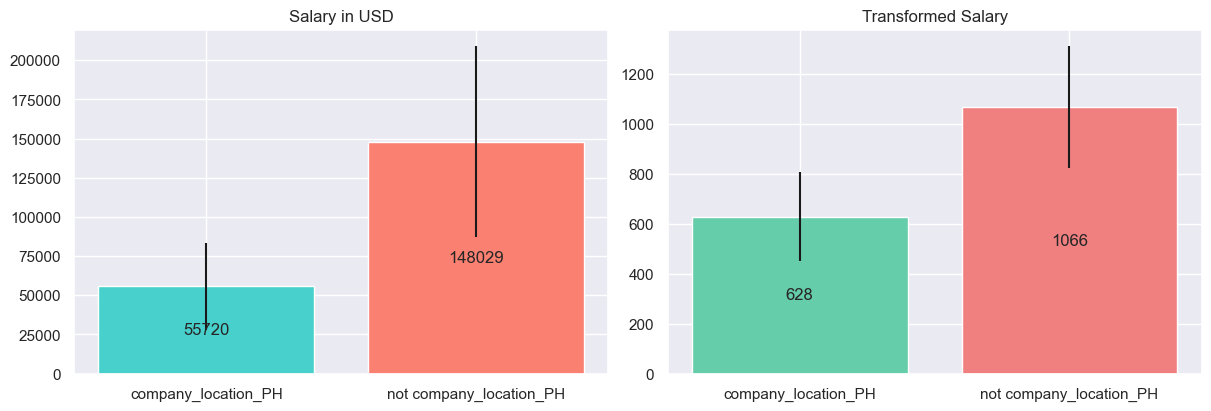

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PL                                                    
0                          148052  61043  14451               1066  244
1                           86787  56866     13                781  276

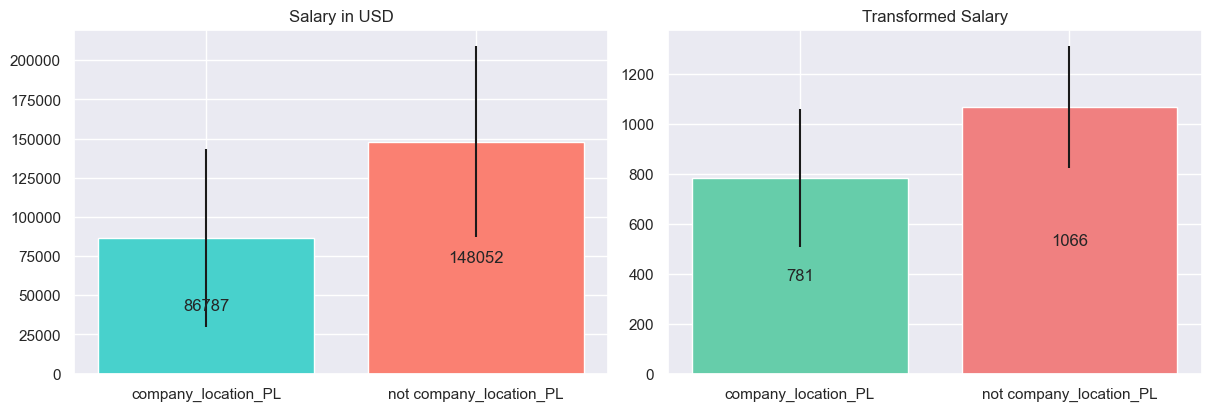

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PT                                                    
0                          148178  60971  14437               1067  244
1                           51115  22826     27                601  147

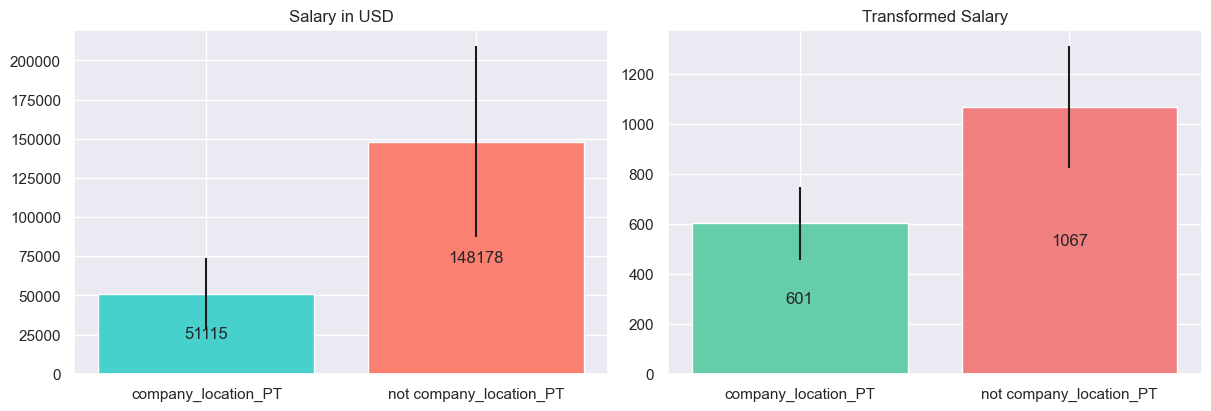

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_SI                                                    
0                          148035  61047  14458               1066  244
1                           56186  28245      6                632  170

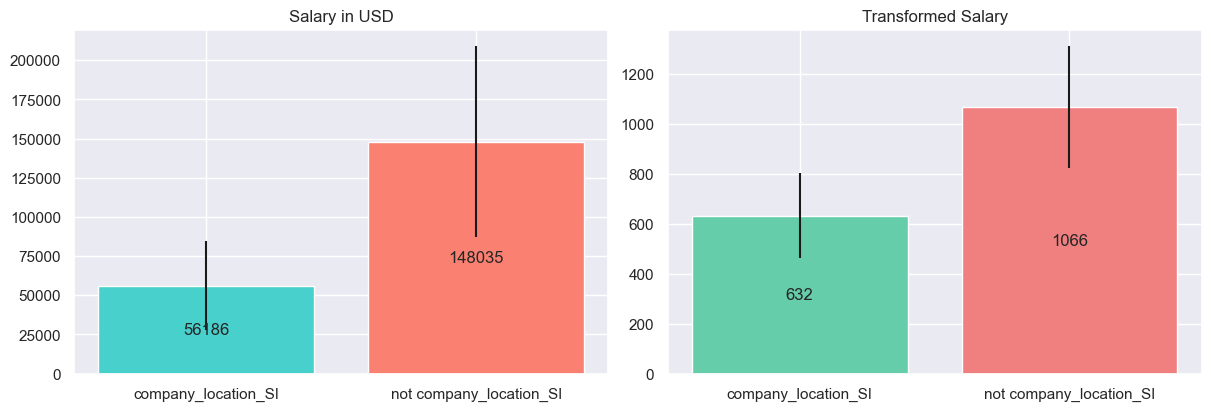

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_UA                                                    
0                          148026  61051  14454               1066  244
1                          105600  70596     10                870  302

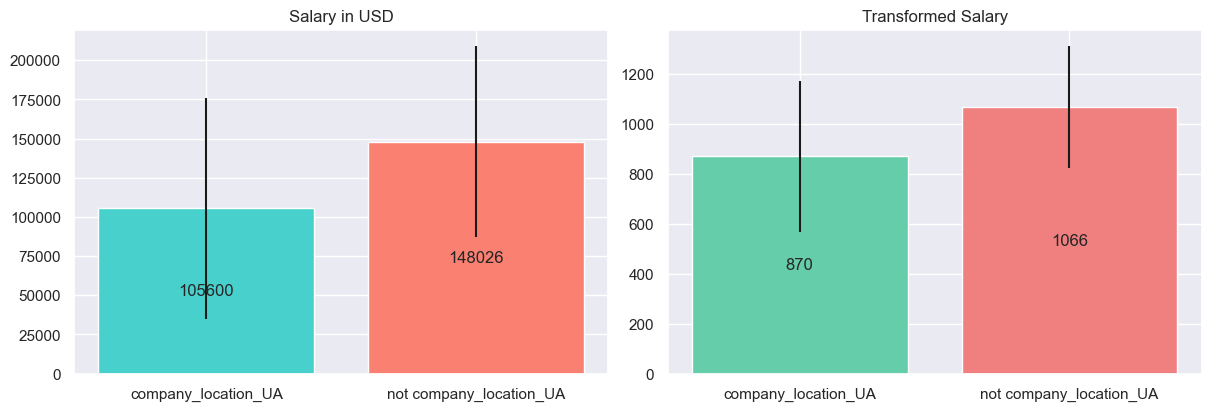

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_US                                                    
0                           97967  59120   1687                837  267
1                          154602  58189  12777               1096  225

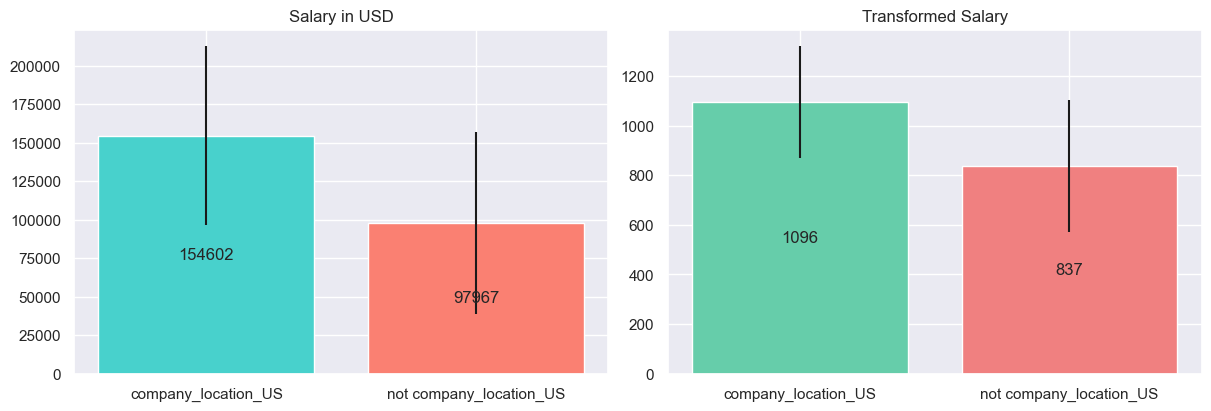

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ZA                                                    
0                          148085  61025  14450               1066  244
1                           57308  24142     14                644  136

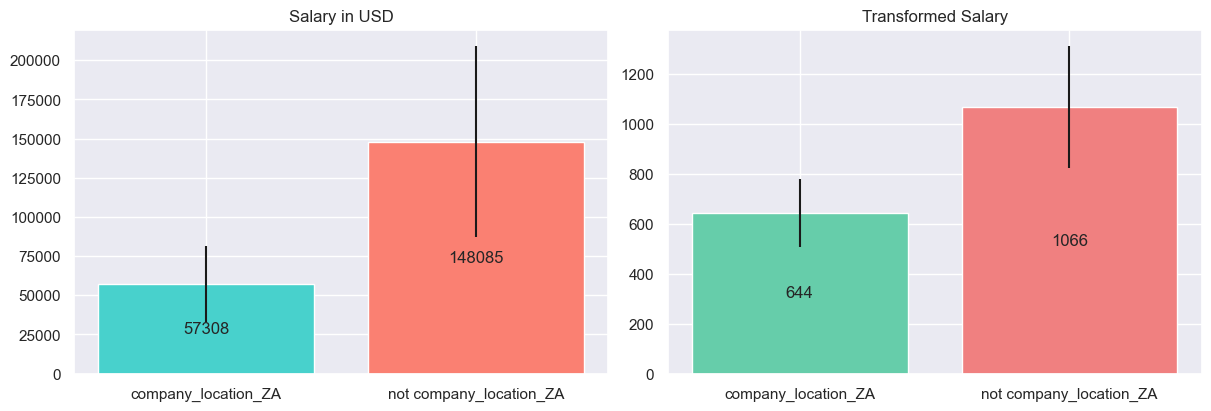

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_L                                                    
0                     148366  60495  13554               1068  241
1                     142497  68814    910               1033  291

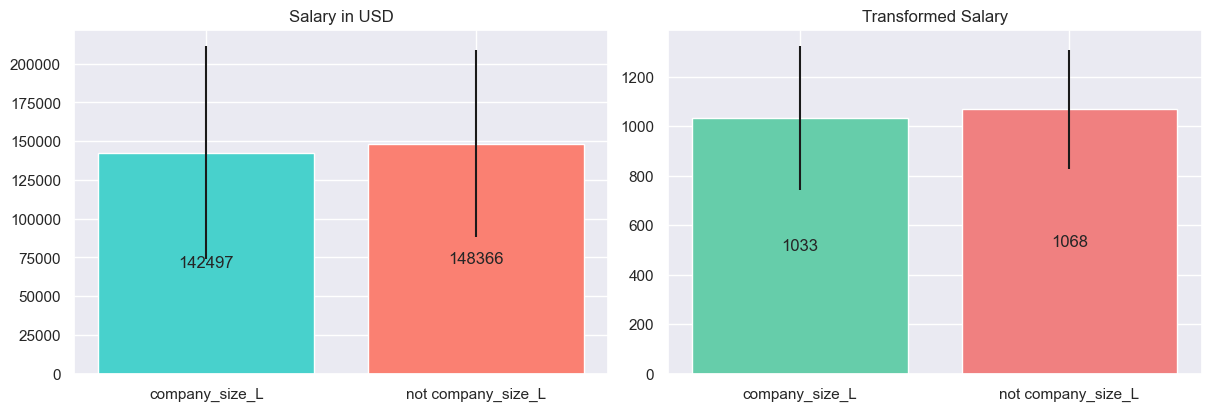

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_M                                                    
0                     136114  69357   1035               1004  298
1                     148913  60285  13429               1071  239

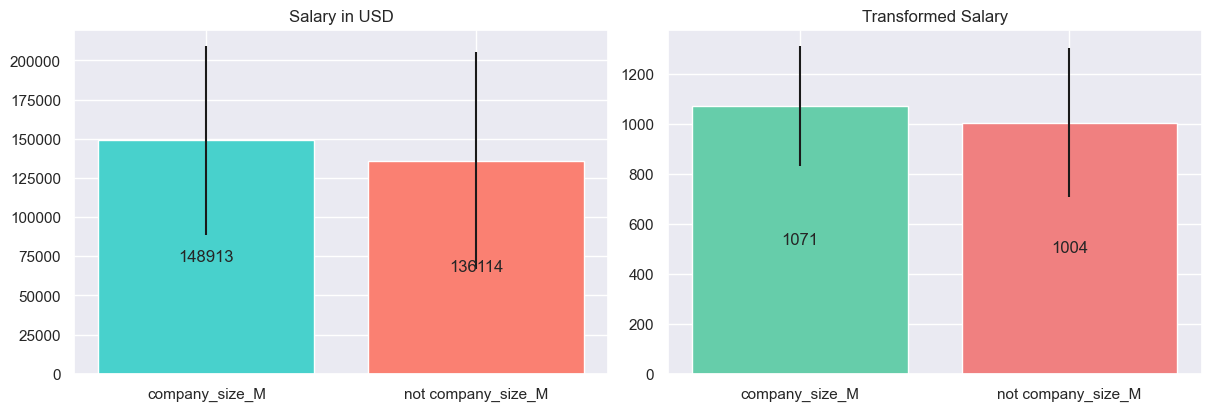

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_S                                                    
0                     148505  60879  14339               1068  243
1                      89642  54066    125                797  261

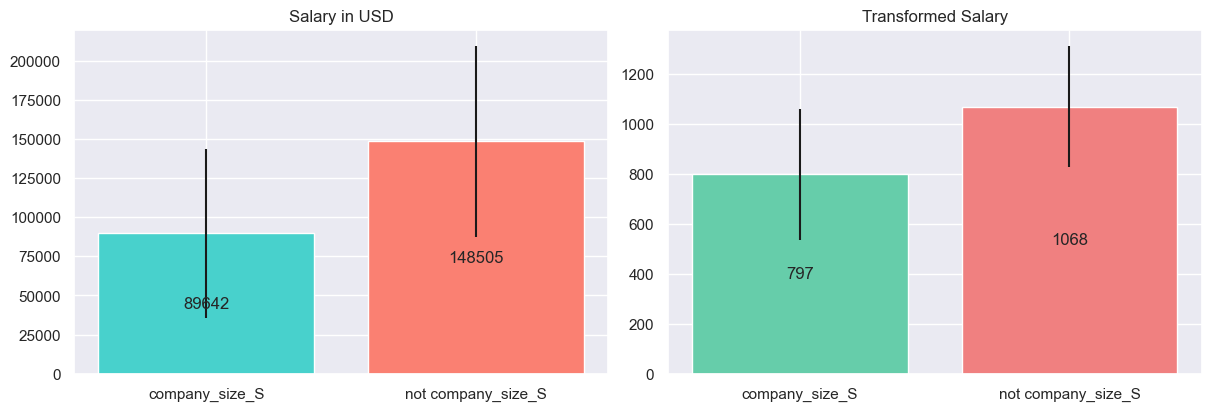

In [33]:
diffs = {}

aux = new_X.groupby('work_year')[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
display(aux)
for year in aux.index:
    diffs['work_year_' + str(year)] = aux.loc[year,('transformed_salary', 'mean')] - avg
    diffs['work_year_' + str(year)] = (diffs['work_year_' + str(year)], 
                                       abs(diffs['work_year_' + str(year)])/aux.loc[year,('transformed_salary', 'std')],
                                       aux.loc[year,('salary_in_usd', 'count')])

for var in new_X.columns[1:-2]:
    aux = new_X.groupby(var)[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
    display(aux)
    diffs[var] = aux.loc[1,('transformed_salary', 'mean')] - avg
    diffs[var] = (diffs[var], 
                  abs(diffs[var])/aux.loc[1,('transformed_salary', 'std')], 
                  aux.loc[1,('salary_in_usd', 'count')])
    plotting(var)

In [34]:
diffs = pd.DataFrame(diffs, index=['differences', 'abs_z_score', 'counts']).transpose()
diffs.sort_values('abs_z_score', ascending=False)

differences  abs_z_score   counts
job_name_Insight         -482.307618     9.646152     12.0
employee_residence_EE    -501.307618     8.355127     11.0
company_location_EE      -501.307618     8.355127     11.0
salary_currency_PLN      -560.307618     6.024813      6.0
salary_currency_INR      -588.307618     4.325791     49.0
employee_residence_AT    -350.307618     4.121266     10.0
company_location_AT      -349.307618     4.109501     10.0
job_name_Associate       -355.307618     4.083996      5.0
company_location_IT      -471.307618     3.740537     14.0
employee_residence_LV    -436.307618     3.605848     14.0
company_location_LV      -436.307618     3.605848     14.0
company_location_AR      -344.307618     3.513343      7.0
employee_residence_AR    -388.307618     3.498267     11.0
employee_residence_GR    -460.307618     3.241603     16.0
company_location_GR      -456.307618     3.213434     14.0
company_location_PT      -465.307618     3.165358     27.0
company_location_ZA      -422.307618     3.105203     14.0
employee_residence_ZA    -422.307618     3.105203     14.0
employee_residence_PH    -463.307618     3.028154      7.0
employment_type_FL       -484.307618     2.865726      7.0
company_location_IN      -549.307618     2.692684     57.0
employee_residence_PT    -451.307618     2.686355     30.0
company_location_BR      -389.307618     2.612803     17.0
company_location_ES      -432.307618     2.588668    126.0
company_location_SI      -434.307618     2.554751      6.0
employee_residence_SI    -434.307618     2.554751      6.0
employee_residence_IT    -446.307618     2.521512     21.0
company_location_PH      -438.307618     2.462402      5.0
employee_residence_ES    -423.307618     2.364847    128.0
salary_currency_EUR      -388.307618     2.284162    392.0
employee_residence_IN    -513.307618     2.261267     66.0
company_location_LT      -359.307618     2.245673     16.0
employee_residence_LT    -359.307618     2.245673     16.0
salary_currency_AUD      -295.307618     2.050747     11.0
employee_residence_NL    -306.307618     2.028527     27.0
employee_residence_BR    -354.307618     1.968376     19.0
company_location_NL      -312.307618     1.904315     27.0
company_location_CO      -301.307618     1.848513     16.0
employee_residence_CO    -301.307618     1.848513     16.0
salary_currency_GBP      -311.307618     1.809928    553.0
employee_residence_NG    -479.307618     1.755706     10.0
company_location_NG      -413.307618     1.401043      7.0
job_name_Quality         -274.307618     1.399529     29.0
employment_type_PT       -383.307618     1.354444     20.0
remote_ratio_Hybrid      -309.307618     1.198867    192.0
employee_residence_PL    -328.307618     1.189520     14.0
work_abroad              -318.307618     1.165962     63.0
employee_residence_IE    -170.307618     1.158555     12.0
company_location_IE      -170.307618     1.158555     12.0
company_location_FR      -286.307618     1.127195     58.0
job_name_Specialist      -218.307618     1.113814    139.0
job_name_Big             -331.307618     1.104359     12.0
company_location_GB      -245.307618     1.090256    642.0
job_name_Consultant      -162.307618     1.089313     87.0
employee_residence_GB    -245.307618     1.085432    637.0
experience_level_EN      -242.307618     1.076923   1079.0
employee_residence_FR    -283.307618     1.065066     63.0
company_location_PL      -285.307618     1.033723     13.0
company_size_S           -269.307618     1.031830    125.0
job_name_Director         212.692382     1.003266     39.0
company_location_DE      -237.307618     0.960760     91.0
company_location_MX      -302.307618     0.905113     13.0
employee_residence_DE    -220.307618     0.899215     87.0
job_name_Strategist      -163.307618     0.892391     28.0
job_name_Analyst         -170.307618     0.877874   2600.0
employee_residence_MX    -295.307618     0.851031     12.0
work_year_2020           -232.307618     0.832644     60.0
job_name_Inte

In [35]:
diffs.sort_values('differences', ascending=False)

differences  abs_z_score   counts
job_name_Director         212.692382     1.003266     39.0
job_name_Head             208.692382     0.756132     62.0
experience_level_EX       159.692382     0.691309    424.0
job_name_Applied          143.692382     0.677794    402.0
job_name_Machine          138.692382     0.600400   1913.0
job_name_Prompt           119.692382     0.529612     14.0
job_name_Deep             118.692382     0.318210     13.0
job_name_Infrastructure    98.692382     0.479089     47.0
job_name_Decision          87.692382     0.736911     38.0
job_name_Software          80.692382     0.274464     29.0
job_name_Research          76.692382     0.289405    844.0
job_name_Robotics          70.692382     0.308700     14.0
job_name_Vision            67.692382     0.207645     32.0
job_name_Architect         67.692382     0.322345    392.0
experience_level_SE        57.692382     0.261052   9524.0
job_name_Scientist         51.692382     0.219036   4510.0
job_name_Engineer          44.692382     0.187783   6076.0
job_name_AI                36.692382     0.124804    162.0
employee_residence_NZ      34.692382     0.260845      5.0
company_location_NZ        34.692382     0.260845      5.0
job_name_Principal         30.692382     0.132867     17.0
employee_residence_US      30.692382     0.137020  12750.0
job_name_Cloud             30.692382     0.159856     19.0
company_location_US        29.692382     0.131966  12777.0
salary_currency_USD        26.692382     0.117588  13397.0
work_year_2023             18.692382     0.077885   8381.0
job_name_Ops               16.692382     0.081825     22.0
job_name_Analytics         10.692382     0.054553    478.0
remote_ratio_On_Site       10.692382     0.043821   9658.0
company_size_M              4.692382     0.019633  13429.0
employment_type_FT          0.692382     0.002838  14417.0
job_name_Product           -2.307618     0.009904     43.0
job_name_Database          -3.307618     0.021478     13.0
work_year_2024             -7.307618     0.029706   4240.0
remote_ratio_Remote       -11.307618     0.048118   4614.0
employee_residence_CA     -13.307618     0.057859    381.0
company_location_CA       -15.307618     0.065417    383.0
job_name_Lead             -27.307618     0.095816     92.0
company_size_L            -33.307618     0.114459    910.0
job_name_Manager          -40.307618     0.168651    446.0
company_location_EG       -41.307618     0.134992     13.0
salary_currency_CHF       -49.307618     0.172404      8.0
employee_residence_CH     -49.307618     0.172404      8.0
job_name_Practitioner     -49.307618     0.258155     16.0
work_year_2022            -53.307618     0.225880   1606.0
employee_residence_AU     -60.307618     0.205828     48.0
employee_residence_EG     -62.307618     0.204287     14.0
company_location_AU       -65.307618     0.222135     50.0
job_name_Modeler          -66.307618     0.383281     50.0
job_name_NLP              -94.307618     0.284917     15.0
job_name_Intelligence     -97.307618     0.444327    648.0
job_name_Business        -102.307618     0.460845    663.0
experience_level_MI      -104.307618     0.457490   3437.0
job_name_Owner           -105.307618     0.293336      6.0
job_name_Visualization   -111.307618     0.592062     18.0
company_location_CH      -116.307618     0.348226      9.0
job_name_ETL             -119.307618     0.481079     31.0
job_name_Operations      -125.307618     0.535503     80.0
job_name_Developer       -156.307618     0.781538    215.0
job_name_Integration     -157.307618     0.782625     45.0
job_name_Consultant      -162.307618     1.089313     87.0
job_name_Strategist      -163.307618     0.892391     28.0
salary_currency_CAD      -168.307618     0.754743     48.0
job_name_Analyst         -170.307618     0.877874   2600.0
company_location_IE      -170.307618     1.158555     12.0
employee_residence_IE    -170.307618     1.158555     12.0
job_name_Finance         -182.307618     0.486154      7.0
employment_ty